<a href="https://colab.research.google.com/github/fridapolanco/AI_Iowa_Retail_2024_Analysis/blob/main/2_IOWA_2021_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IOWA RETAIL ANALYSIS**: 🍺 Retail in AI
#**EDA & ANALYSIS**

**TEAM:**

Frida Nicole Polanco Domínguez,

Nicole Herrera,

Alina Edigareva

Iowa documentation:
1) [sales](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy/about_data)
2) [stores](https://data.iowa.gov/Regulation/Iowa-Liquor-Stores/ykb6-ywnd/about_data)
3) [GitHub for inspo](https://github.com/castorgit/AI_for_retail/blob/main/00_Iowa_Liquor_sales/EDA_IOWA_Dataset_01.ipynb)
4) [Population](https://data.iowa.gov/Community-Demographics/County-Population-in-Iowa-by-Year/qtnr-zsrc/about_data)

Code for EDA & Analysis of Iowa Alcohol consumption from 2021 onwards.



In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from thefuzz import fuzz

# Mount your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


We will proceed to analyze trend in alcohol consumptions

##**Reading CSV & setting df**

In [ ]:
df_2021 = pd.read_csv("/content/drive/MyDrive/IOWA/2021_onwards_clean.csv") #Reading from clean CSV to avoid having to run all cleaning cells.

In [ ]:
df_2021['Date'] = pd.to_datetime(df_2021['Date'])
df_2021 = df_2021.set_index('Date')
df_2021.sort_index(inplace=True)

In [ ]:
df_2021.head()

Store Number           Store Name                Address  \
Date                                                                   
2021-01-04          5636  BIG DISCOUNT LIQUOR  5427  CENTER POINT RD   
2021-01-04          5636  BIG DISCOUNT LIQUOR  5427  CENTER POINT RD   
2021-01-04          5636  BIG DISCOUNT LIQUOR  5427  CENTER POINT RD   
2021-01-04          5636  BIG DISCOUNT LIQUOR  5427  CENTER POINT RD   
2021-01-04          5636  BIG DISCOUNT LIQUOR  5427  CENTER POINT RD   

                    City  Zip Code County      Category Name  \
Date                                                           
2021-01-04  CEDAR RAPIDS   52402.0   LINN  IMPORTED BRANDIES   
2021-01-04  CEDAR RAPIDS   52402.0   LINN  IMPORTED BRANDIES   
2021-01-04  CEDAR RAPIDS   52402.0   LINN  IMPORTED BRANDIES   
2021-01-04  CEDAR RAPIDS   52402.0   LINN  IMPORTED BRANDIES   
2021-01-04  CEDAR RAPIDS   52402.0   LINN  IMPORTED BRANDIES   

                       Vendor Name               Item Description  Pack  ...  \
Date                                                                     ...   
2021-01-04  REMY COINTREAU USA INC               REMY MARTIN VSOP    12  ...   
2021-01-04  REMY COINTREAU USA INC               REMY MARTIN VSOP    24  ...   
2021-01-04  REMY COINTREAU USA INC         REMY MARTIN VSOP FLASK    12  ...   
2021-01-04  REMY COINTREAU USA INC  REMY MARTIN 1738 ACCORD ROYAL    12  ...   
2021-01-04  REMY COINTREAU USA INC  REMY MARTIN 1738 ACCORD ROYAL     6  ...   

            inv_item_number  alcohol_type  quality     store_type  \
Date                                                                
2021-01-04                1        BRANDY  PREMIUM  LIQUEUR STORE   
2021-01-04                2        BRANDY   BUDGET  LIQUEUR STORE   
2021-01-04                3        BRANDY   BUDGET  LIQUEUR STORE   
2021-01-04                4        BRANDY   BUDGET  LIQUEUR STORE   
2021-01-04                5        BRANDY  PREMIUM  LIQUEUR STORE   

            Store Status       Lat       Lon      Vendor Name simple  \
Date                                                                   
2021-01-04             A -91.66808  42.03344  REMY COINTREAU USA INC   
2021-01-04             A -91.66808  42.03344  REMY COINTREAU USA INC   
2021-01-04             A -91.66808  42.03344  REMY COINTREAU USA INC   
2021-01-04             A -91.66808  42.03344  REMY COINTREAU USA INC   
2021-01-04             A -91.66808  42.03344  REMY COINTREAU USA INC   

              Store Name simple nationality  
Date                                         
2021-01-04  BIG DISCOUNT LIQUOR    Imported  
2021-01-04  BIG DISCOUNT LIQUOR    Imported  
2021-01-04  BIG DISCOUNT LIQUOR    Imported  
2021-01-04  BIG DISCOUNT LIQUOR    Imported  
2021-01-04  BIG DISCOUNT LIQUOR    Imported  

[5 rows x 33 columns]

In [ ]:
df_2021.columns


Index(['Store Number', 'Store Name', 'Address', 'City', 'Zip Code', 'County',
       'Category Name', 'Vendor Name', 'Item Description', 'Pack',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'month',
       'year', 'week', 'day_of_week', 'season', 'Standardized Store Name',
       'invoice_number', 'inv_item_number', 'alcohol_type', 'quality',
       'store_type', 'Store Status', 'Lat', 'Lon', 'Vendor Name simple',
       'Store Name simple', 'nationality'],
      dtype='object')

In [ ]:
#Changing columns names for easier handling

df_2021.rename(columns={"Store Name": "store_name",
                        "Store Number": "store_number",
                        "Address": "address",
                        "City":"city",
                        "Zip Code":"zip",
                        "County":"county",
                        "Category Name":"category",
                        "Vendor Name":"vendor_name",
                        "Item Description":"item",
                        "Pack":"pack",
                        "Bottle Volume (ml)":"bottle_ml",
                        "State Bottle Cost":"cost",
                        "State Bottle Retail":"retail",
                        "Bottles Sold": "bottles_sold",
                        "Sale (Dollars)": "sale_usd",
                        "Volume Sold (Liters)": "sale_liters",
                        "Store Status": "store_status",
                        },
               inplace=True)

In [ ]:
df_2021.columns

Index(['store_number', 'store_name', 'address', 'city', 'zip', 'county',
       'category', 'vendor_name', 'item', 'pack', 'bottle_ml', 'cost',
       'retail', 'bottles_sold', 'sale_usd', 'sale_liters', 'month', 'year',
       'week', 'day_of_week', 'season', 'Standardized Store Name',
       'invoice_number', 'inv_item_number', 'alcohol_type', 'quality',
       'store_type', 'store_status', 'Lat', 'Lon', 'Vendor Name simple',
       'Store Name simple', 'nationality'],
      dtype='object')

# **GRAPHS**

In [ ]:
colors = ["#8B4513", "#DAA520"]

##**Consumption trends by time variables & seasonality**
---



**Sales re-sampled monthly**
We can see the same pattern (Seasonality) repeated with lows on January & November. Peaks at March,June, December.

<ipython-input-9-fda0d879c680>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sales = df_2021.resample('M')['sale_usd'].sum()


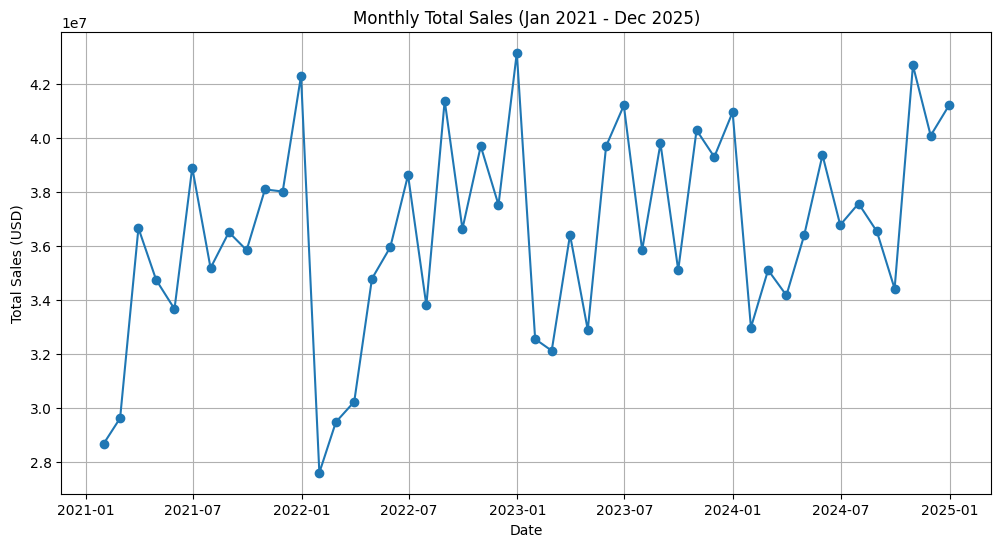

In [ ]:
# Resample by month and sum total sales
df_monthly_sales = df_2021.resample('M')['sale_usd'].sum()

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(df_monthly_sales.index, df_monthly_sales.values, marker='o', linestyle='-')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Total Sales (Jan 2021 - Dec 2025)')
plt.grid(True)

# Show plot
plt.show()

In [ ]:
# Grouping data by year, month, and day of week
sales_summary = df_2021.groupby(["year", "month", "day_of_week"])[["sale_usd", "sale_liters"]].sum().reset_index()

In [ ]:
sales_summary.head()

year  month day_of_week    sale_usd  sale_liters
0  2021      1      Friday  5147660.20    314538.10
1  2021      1      Monday  6324490.55    368145.92
2  2021      1    Thursday  5336242.18    315172.08
3  2021      1     Tuesday  5691577.06    352741.44
4  2021      1   Wednesday  6165689.87    373767.17

In [ ]:
sales_summary[sales_summary["year"] == 2024].sale_usd.sum()

447206955.81999993

<ipython-input-13-1b1a4ffb4f76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="year", y="sale_usd", data=sales_summary, palette="Blues")


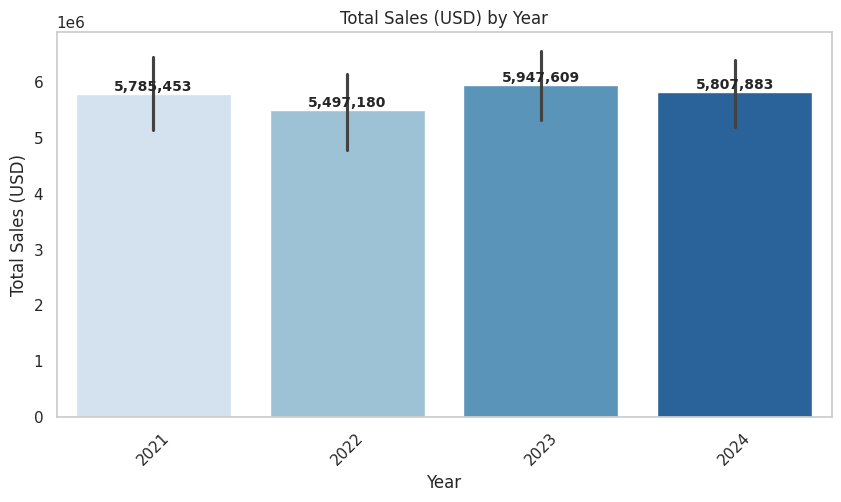

In [ ]:
# Set style
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 5))

# Plot bar chart
ax = sns.barplot(x="year", y="sale_usd", data=sales_summary, palette="Blues")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

# Customize the plot
plt.title("Total Sales (USD) by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid(False)


# Show plot
plt.show()

<ipython-input-14-0186a34a405c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="month", y="sale_usd", data=sales_summary, palette="Greens")


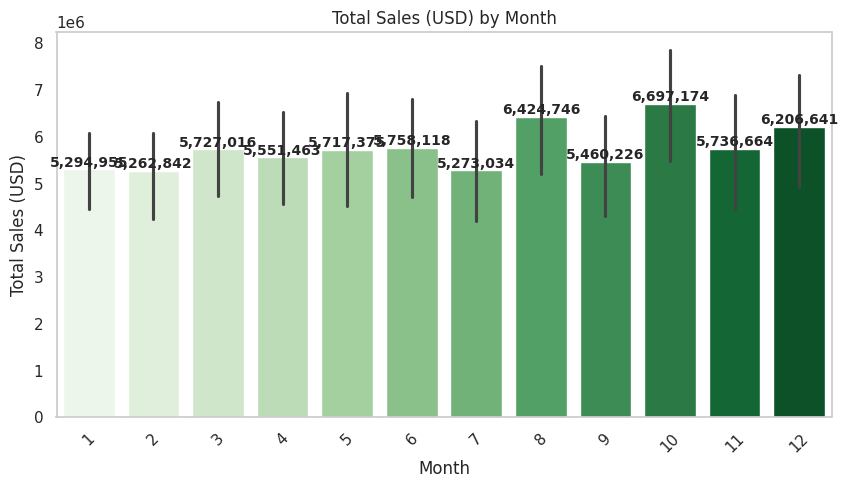

In [ ]:
# Create figure
plt.figure(figsize=(10, 5))

# Plot bar chart
ax = sns.barplot(x="month", y="sale_usd", data=sales_summary, palette="Greens")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

# Customize the plot
plt.title("Total Sales (USD) by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid(False)


# Show plot
plt.show()

<ipython-input-15-e9448e401590>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="day_of_week", y="sale_usd", data=sales_summary, palette="Oranges", order=[


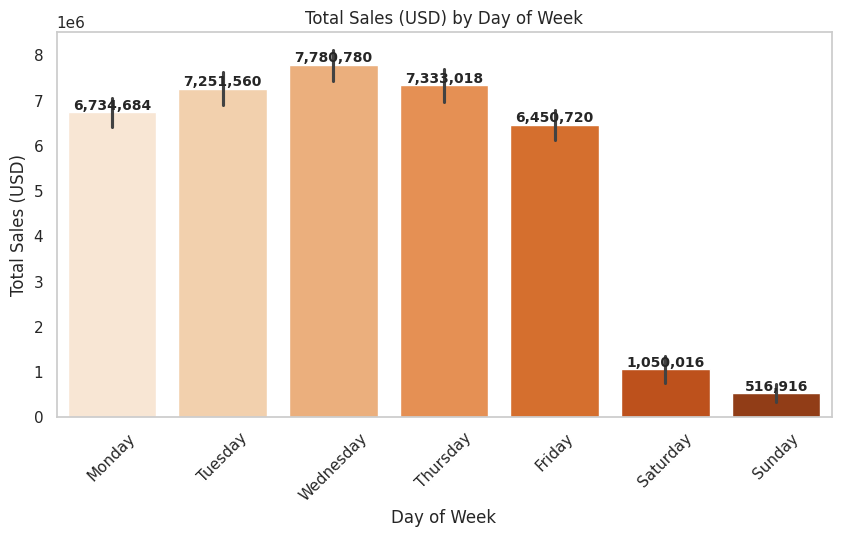

In [ ]:
# Create figure
plt.figure(figsize=(10, 5))

# Plot bar chart
ax = sns.barplot(x="day_of_week", y="sale_usd", data=sales_summary, palette="Oranges", order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

# Customize the plot
plt.title("Total Sales (USD) by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid(False)


# Show plot
plt.show()

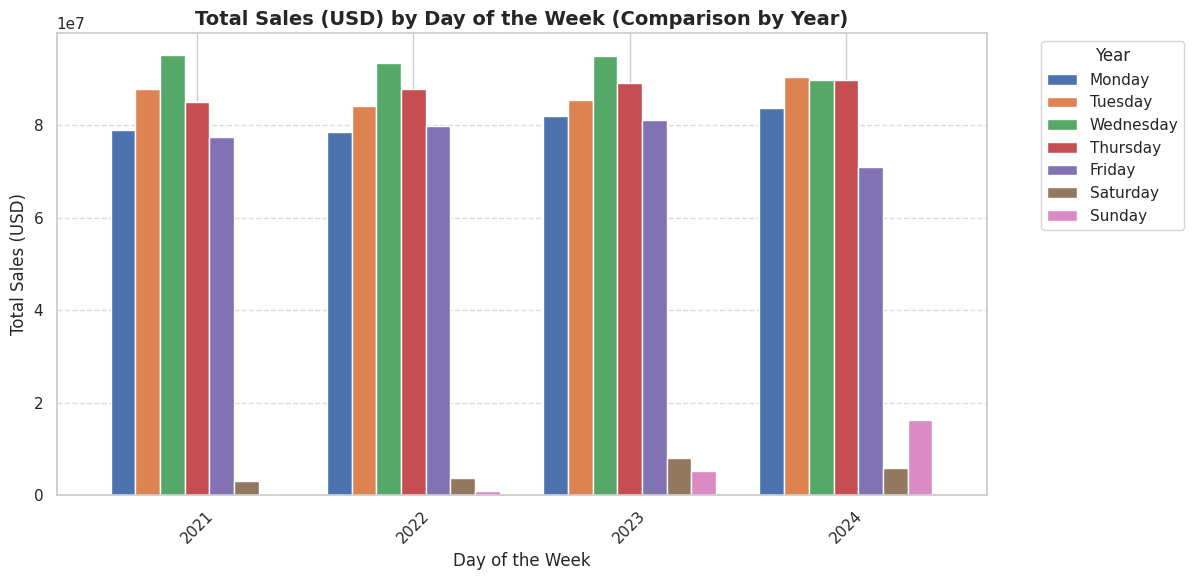

In [ ]:
# Group by year and day_of_week, then sum sales
sales_by_day = df_2021.groupby(["year", "day_of_week"])["sale_usd"].sum().unstack()

# Ensure day_of_week is in desired order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = sales_by_day[days_order]  # Reorder columns

# Plot the grouped bar chart
sales_by_day.plot(kind="bar", figsize=(12, 6), width=0.8) # Remove 'order' argument

# Customize the plot
plt.title("Total Sales (USD) by Day of the Week (Comparison by Year)", fontsize=14, fontweight="bold")
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

<ipython-input-17-45a43328706c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="year", y="sale_liters", data=sales_summary, palette="Blues")


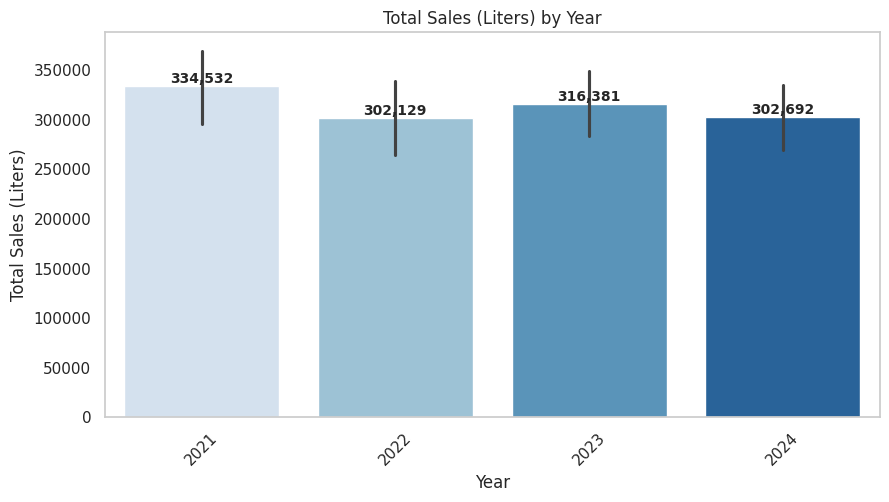

In [ ]:
#Total Sales Liters per year

# Create figure
plt.figure(figsize=(10, 5))

# Plot bar chart
ax = sns.barplot(x="year", y="sale_liters", data=sales_summary, palette="Blues")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

# Customize the plot
plt.title("Total Sales (Liters) by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (Liters)")
plt.xticks(rotation=45)
plt.grid(False)


# Show plot
plt.show()

<ipython-input-18-6dede077618d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="month", y="sale_liters", data=sales_summary, palette="Greens")


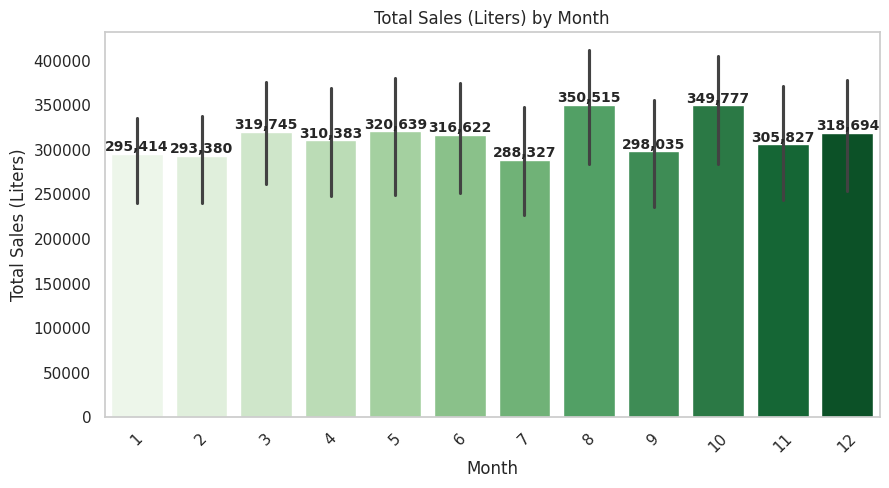

In [ ]:
# Create figure
plt.figure(figsize=(10, 5))

# Plot bar chart
ax = sns.barplot(x="month", y="sale_liters", data=sales_summary, palette="Greens")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

# Customize the plot
plt.title("Total Sales (Liters) by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales (Liters)")
plt.xticks(rotation=45)
plt.grid(False)


# Show plot
plt.show()

<ipython-input-19-4af3b3f8bce3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="day_of_week", y="sale_liters", data=sales_summary, palette="Oranges", order=[


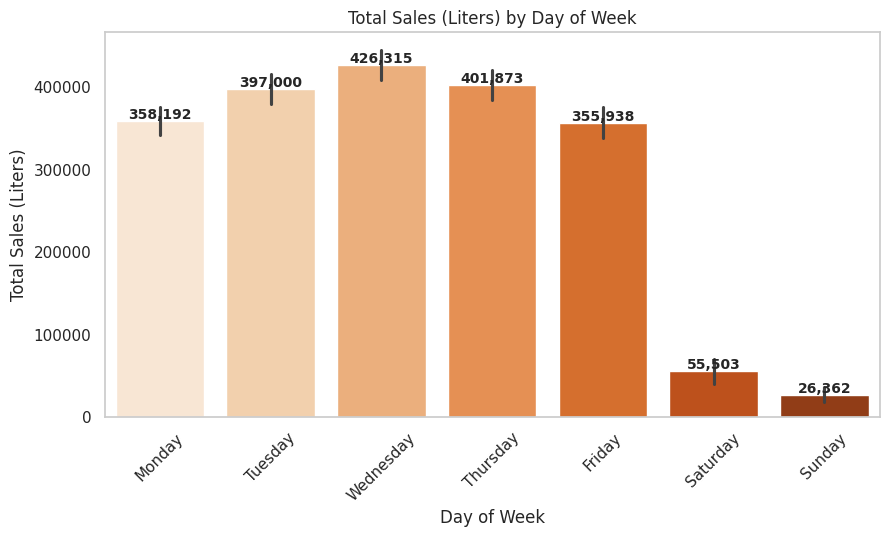

In [ ]:
#Total Sales (Liters) by Day of Week
# Create figure
plt.figure(figsize=(10, 5))

# Plot bar chart
ax = sns.barplot(x="day_of_week", y="sale_liters", data=sales_summary, palette="Oranges", order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

# Customize the plot
plt.title("Total Sales (Liters) by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales (Liters)")
plt.xticks(rotation=45)
plt.grid(False)


# Show plot
plt.show()

##**Consumption trends by type of alcohol - SALES USD**
---

Using total sales (USD). Best selling types of alcohols per USD are Whiskey, Vodka, Tequila


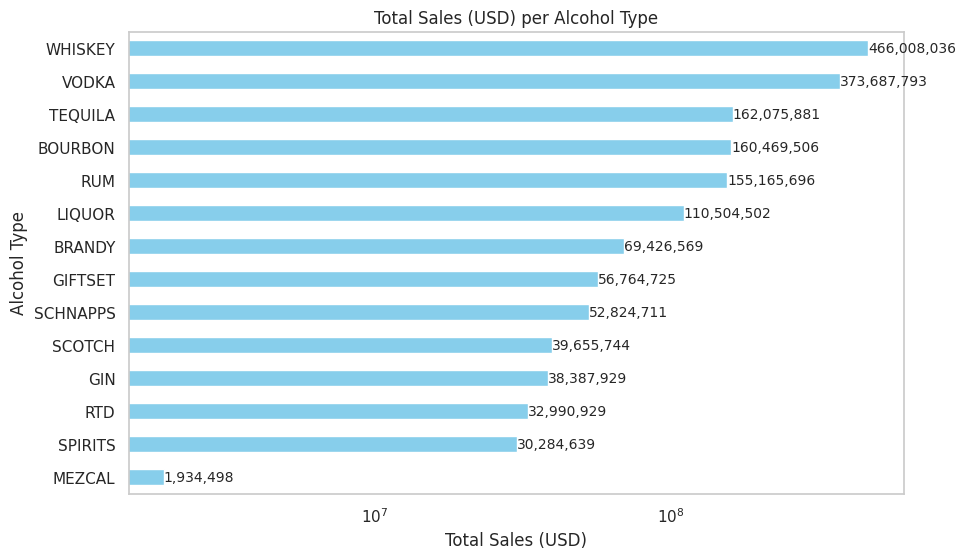

In [ ]:
# Group by alcohol_type and sum the sales
sales_by_alcohol = df_2021.groupby("alcohol_type")["sale_usd"].sum()

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
sales_by_alcohol.sort_values().plot(kind="barh", color="skyblue")  # Horizontal bar chart

# Customize the plot
plt.title("Total Sales (USD) per Alcohol Type")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Alcohol Type")
plt.grid(False)

# Annotate bars with values
for index, value in enumerate(sales_by_alcohol.sort_values()):
    plt.text(value, index, f"{value:,.0f}", va='center', fontsize=10)

# Set log scale for better visibility
plt.xscale("log")

# Show the plot
plt.show()

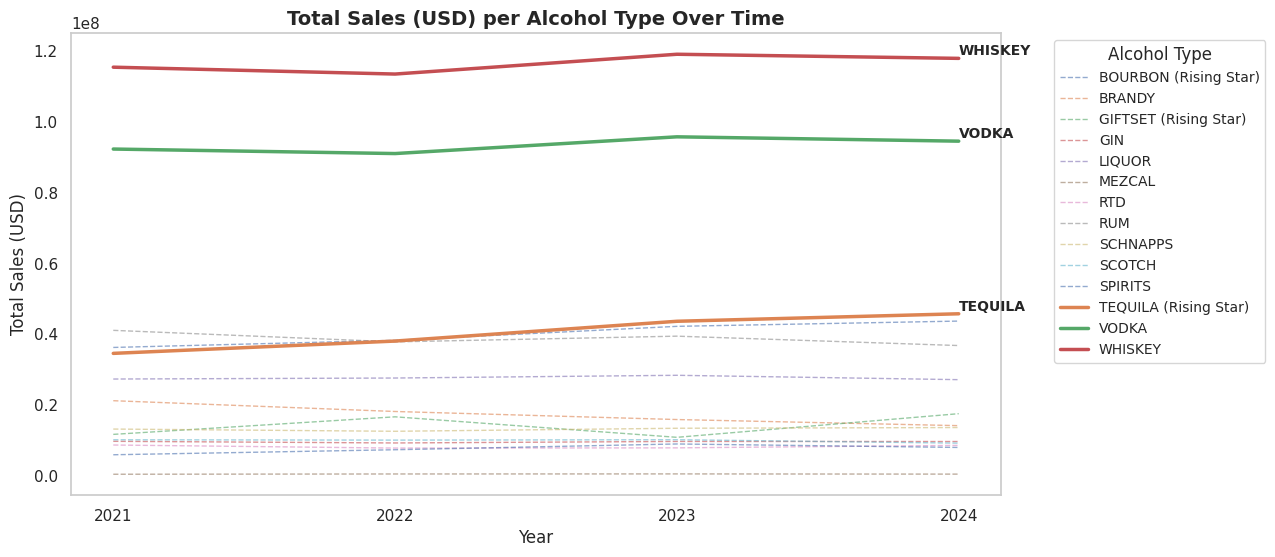

In [ ]:
#YEARLY SALES PER ALCOHOL

# Group by year and alcohol_type, then sum sales
sales_by_year = df_2021.groupby(["year", "alcohol_type"])["sale_usd"].sum().unstack()

# Identify top 3 highest-selling alcohol types
top_alcohols = sales_by_year.max().nlargest(3).index  # Top 3 best-sellers

# Identify top 3 rising stars based on largest sales growth over time
sales_growth = sales_by_year.iloc[-1] - sales_by_year.iloc[0]  # Last year - First year
rising_stars = sales_growth.nlargest(3).index  # Top 3 fastest-growing

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot all alcohol types with light, thin lines
for col in sales_by_year.columns:
    linestyle = "--"
    linewidth = 1
    alpha = 0.6
    label = col

    # Highlight top sellers
    if col in top_alcohols:
        linestyle = "-"
        linewidth = 2.5
        alpha = 1

    # Highlight rising stars and label them
    if col in rising_stars:
        label += " (Rising Star)"

    plt.plot(sales_by_year.index, sales_by_year[col],
             linestyle=linestyle, linewidth=linewidth,
             alpha=alpha, label=label)

# Customize the plot
plt.title("Total Sales (USD) per Alcohol Type Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(sales_by_year.index)
plt.grid(False)

# Label top-selling alcohol types
for col in top_alcohols:
    last_year = sales_by_year.index[-1]
    plt.text(last_year, sales_by_year.loc[last_year, col], col,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Move legend outside
plt.legend(title="Alcohol Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Show the plot
plt.show()

##**Consumption trends by type of alcohol - LITERS**
---

Using total sales (LITERS). Best selling types of alcohols per liters are Vodka, Whiskey, Rum.

This tell us that people prefer Vodka > Whiskey since there are more sales in quantity. Whiskey is likely more expensinve which is why in USD it's leading.

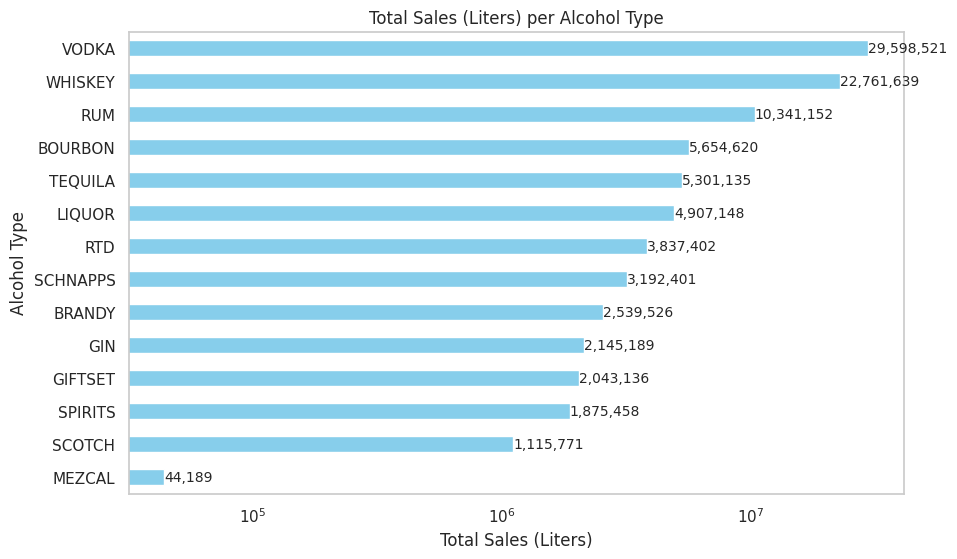

In [ ]:
# Group by alcohol_type and sum the sales in liters
sales_by_alcohol = df_2021.groupby("alcohol_type")["sale_liters"].sum()

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
sales_by_alcohol.sort_values().plot(kind="barh", color="skyblue")  # Horizontal bar chart

# Customize the plot
plt.title("Total Sales (Liters) per Alcohol Type")
plt.xlabel("Total Sales (Liters)")
plt.ylabel("Alcohol Type")
plt.grid(False)

# Annotate bars with values
for index, value in enumerate(sales_by_alcohol.sort_values()):
    plt.text(value, index, f"{value:,.0f}", va='center', fontsize=10)

# Set log scale for better visibility
plt.xscale("log")

# Show the plot
plt.show()

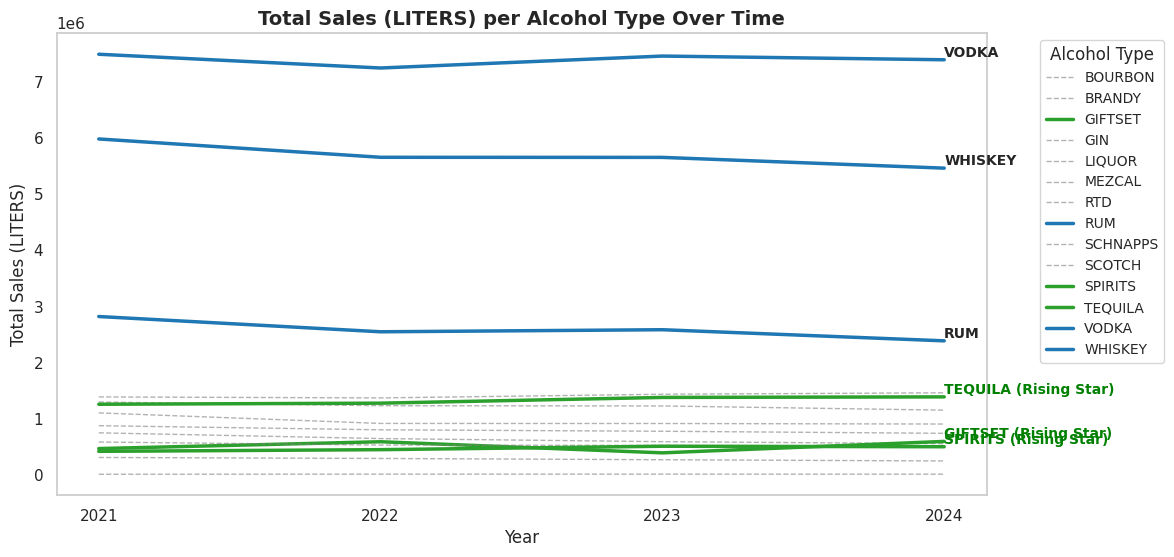

In [ ]:
#YEARLY SALES IN LITERS PER ALCOHOL

# Group by year and alcohol_type, then sum sales
sales_by_year = df_2021.groupby(["year", "alcohol_type"])["sale_liters"].sum().unstack()

# Identify top 3 highest-selling alcohol types
top_alcohols = sales_by_year.max().nlargest(3).index  # Top 3 sellers

# Identify rising stars (highest percentage growth from first to last year)
growth_rates = ((sales_by_year.iloc[-1] - sales_by_year.iloc[0]) / sales_by_year.iloc[0]).fillna(0)
rising_stars = growth_rates.nlargest(3).index  # Top 3 growing alcohols

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot all alcohol types with light, thin lines
for col in sales_by_year.columns:
    linestyle = "--" if col not in top_alcohols and col not in rising_stars else "-"
    linewidth = 1 if col not in top_alcohols and col not in rising_stars else 2.5
    alpha = 0.6 if col not in top_alcohols and col not in rising_stars else 1
    color = "tab:blue" if col in top_alcohols else ("tab:green" if col in rising_stars else "gray")
    plt.plot(sales_by_year.index, sales_by_year[col], linestyle=linestyle, linewidth=linewidth, label=col, alpha=alpha, color=color)

# Customize the plot
plt.title("Total Sales (LITERS) per Alcohol Type Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(sales_by_year.index)
plt.grid(False)

# Label top-selling alcohol types
for col in top_alcohols:
    last_year = sales_by_year.index[-1]
    plt.text(last_year, sales_by_year.loc[last_year, col], col, fontsize=10, fontweight="bold", verticalalignment="bottom")

# Label rising stars with a different color
for col in rising_stars:
    last_year = sales_by_year.index[-1]
    plt.text(last_year, sales_by_year.loc[last_year, col], col + " (Rising Star)", fontsize=10, fontweight="bold", color="green", verticalalignment="bottom")

# Move legend outside
plt.legend(title="Alcohol Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Show the plot
plt.show()


##**Deep-dive by category**
INSIGHTS:
-Per USD: American vodkas, canadian whiskey, straight bourbon
-Per liter: American vodkas, canadian whiskey, spiced rum

### Categories by USD

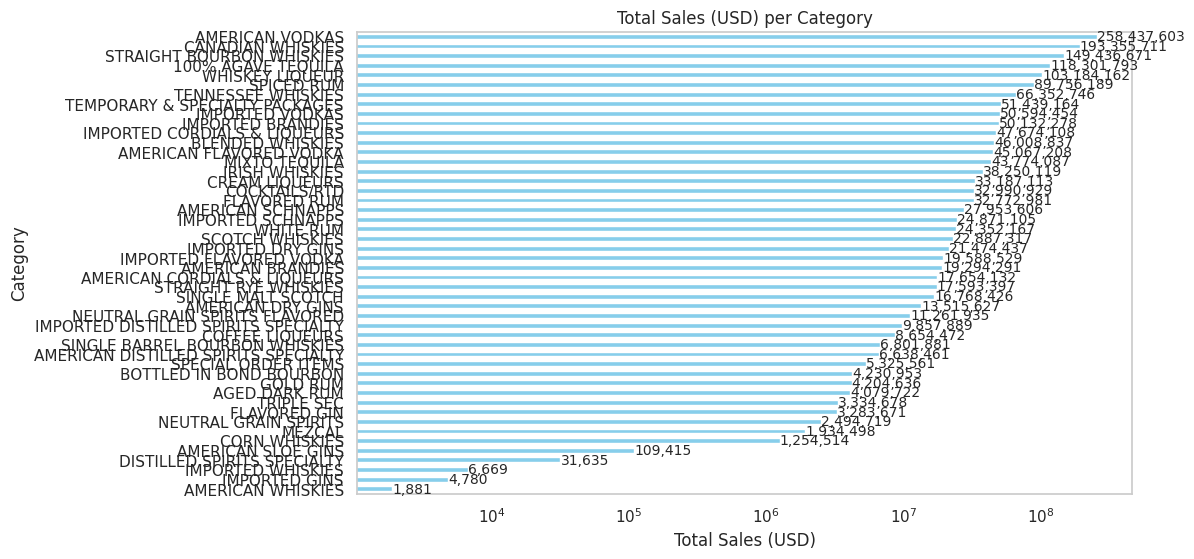

In [ ]:
#TOP 3 CATEGORIES SOLD BY USD

# Group by category and sum the sales
sales_by_alcohol = df_2021.groupby("category")["sale_usd"].sum()

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
sales_by_alcohol.sort_values().plot(kind="barh", color="skyblue")  # Horizontal bar chart

# Customize the plot
plt.title("Total Sales (USD) per Category")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Category")
plt.grid(False)

# Annotate bars with values
for index, value in enumerate(sales_by_alcohol.sort_values()):
    plt.text(value, index, f"{value:,.0f}", va='center', fontsize=10)

# Set log scale for better visibility
plt.xscale("log")

# Show the plot
plt.show()

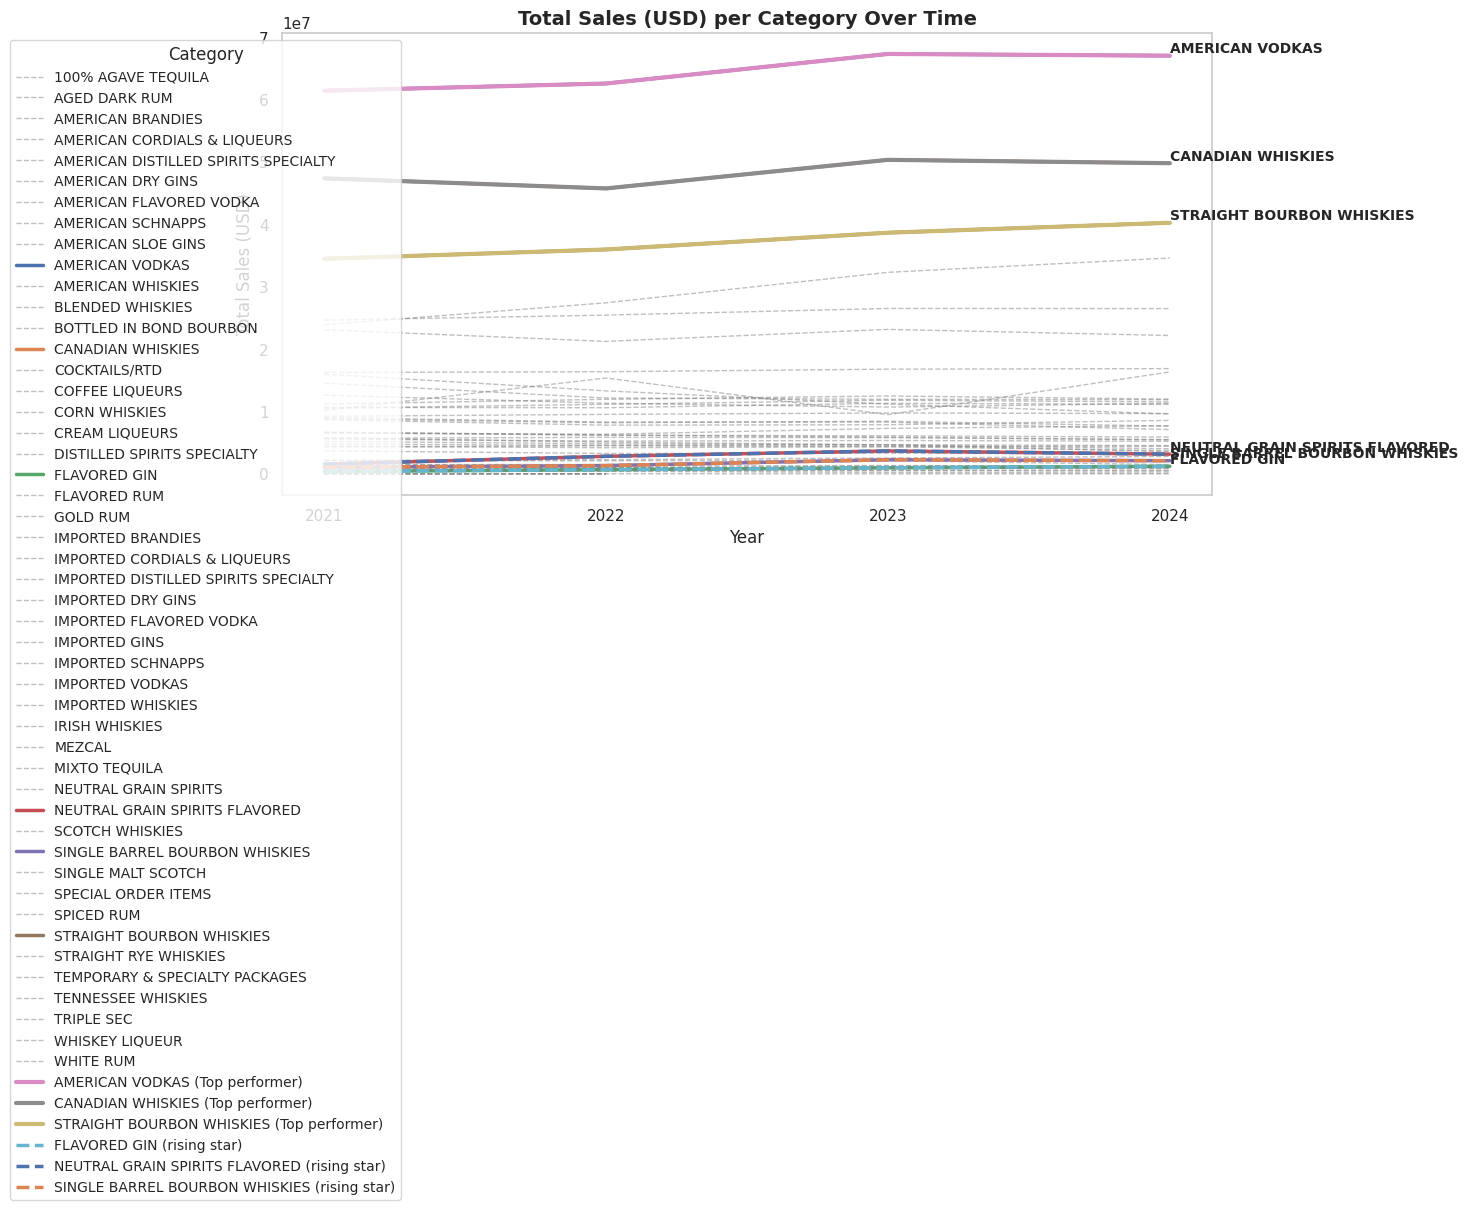

In [ ]:
#YEARLY SALE OF CATEGORY HIGHLITHING TOP 3

# Group by year and category, then sum sales
sales_by_year = df_2021.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Identify Top 3 highest-selling alcohol types (total sales)
top_alcohols = sales_by_year.sum().nlargest(3).index

# Identify Rising Stars (highest % growth from first to last year)
growth_rates = ((sales_by_year.iloc[-1] - sales_by_year.iloc[0]) / sales_by_year.iloc[0]) * 100
rising_stars = growth_rates.nlargest(3).index

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot all category types with light, thin lines
for col in sales_by_year.columns:
    plt.plot(sales_by_year.index, sales_by_year[col],
             linestyle="--" if col not in top_alcohols and col not in rising_stars else "-",
             linewidth=1 if col not in top_alcohols and col not in rising_stars else 2.5,
             color="gray" if col not in top_alcohols and col not in rising_stars else None,  # Gray for others
             alpha=0.5 if col not in top_alcohols and col not in rising_stars else 1,
             label=col)

# Highlight Top 3 best-selling categories in **bold colors**
for col in top_alcohols:
    plt.plot(sales_by_year.index, sales_by_year[col], linewidth=3, label=f"{col} (Top performer)")

# Highlight Rising Stars with a **dashed line and brighter colors**
for col in rising_stars:
    plt.plot(sales_by_year.index, sales_by_year[col], linestyle="dashed", linewidth=2.5, label=f"{col} (rising star)")

# Customize the plot
plt.title("Total Sales (USD) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(sales_by_year.index)
plt.grid(False)

# Label top-selling alcohol types at the last data point
for col in top_alcohols.union(rising_stars):
    last_year = sales_by_year.index[-1]
    plt.text(last_year, sales_by_year.loc[last_year, col], col,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Move legend outside
plt.legend(title="Category", bbox_to_anchor=(-0.3, 1), loc="upper left", fontsize=10)

# Show the plot
plt.show()

### Categories by Liters

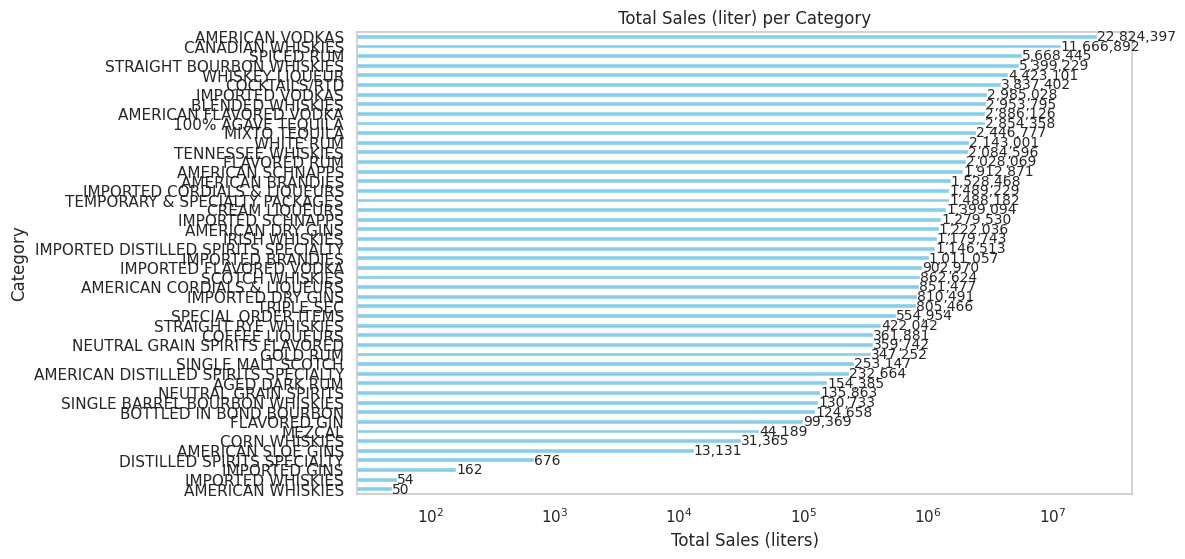

In [ ]:
#TOP 3 CATEGORIES SOLD BY LITERS


# Group by category and sum the liters
sales_by_alcohol = df_2021.groupby("category")["sale_liters"].sum()

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
sales_by_alcohol.sort_values().plot(kind="barh", color="skyblue")  # Horizontal bar chart

# Customize the plot
plt.title("Total Sales (liter) per Category")
plt.xlabel("Total Sales (liters)")
plt.ylabel("Category")
plt.grid(False)

# Annotate bars with values
for index, value in enumerate(sales_by_alcohol.sort_values()):
    plt.text(value, index, f"{value:,.0f}", va='center', fontsize=10)

# Set log scale for better visibility
plt.xscale("log")

# Show the plot
plt.show()

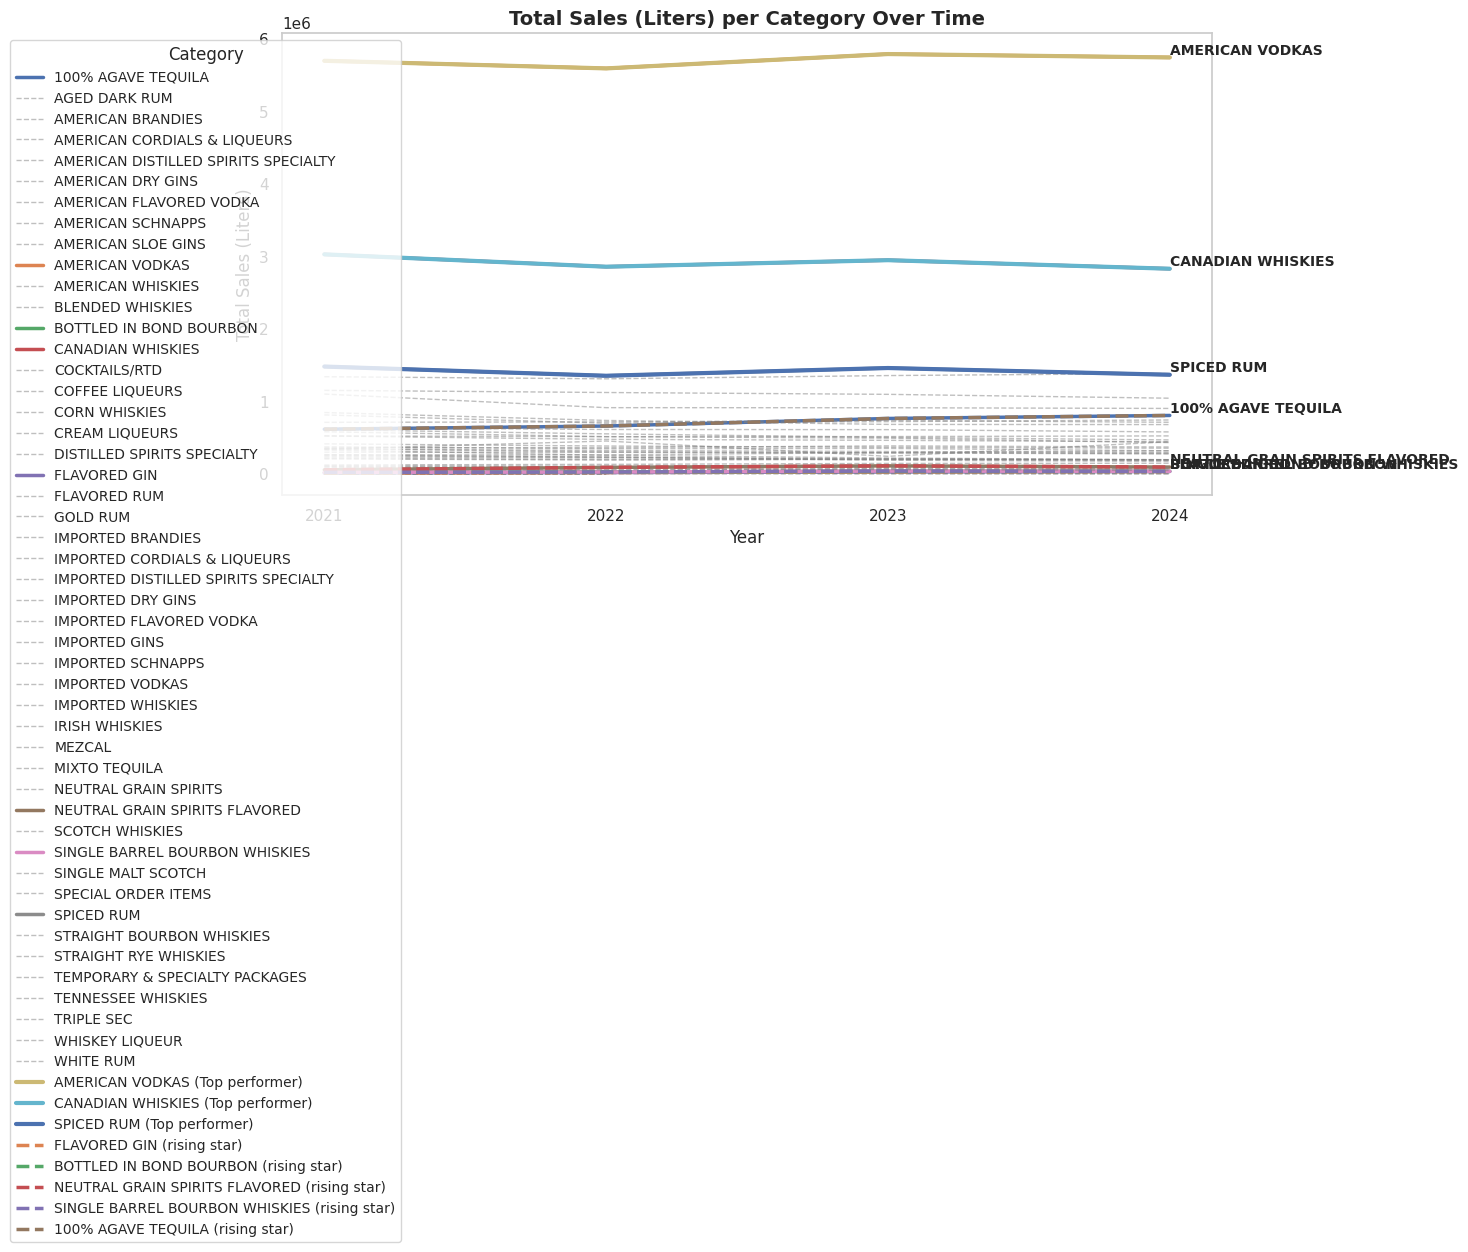

In [ ]:
#YEARLY SALE LITERS OF CATEGORY HIGHLITHING TOP 3

import pandas as pd
import matplotlib.pyplot as plt

# Group by year and category, then sum sales
sales_by_year = df_2021.groupby(["year", "category"])["sale_liters"].sum().unstack()

# Identify Top 3 highest-selling alcohol types (total sales)
top_alcohols = sales_by_year.sum().nlargest(3).index

# Identify Rising Stars (highest % growth from first to last year)
growth_rates = ((sales_by_year.iloc[-1] - sales_by_year.iloc[0]) / sales_by_year.iloc[0]) * 100
rising_stars = growth_rates.nlargest(5).index

# Plot the time series
plt.figure(figsize=(12, 6))

# Plot all category types with light, thin lines
for col in sales_by_year.columns:
    plt.plot(sales_by_year.index, sales_by_year[col],
             linestyle="--" if col not in top_alcohols and col not in rising_stars else "-",
             linewidth=1 if col not in top_alcohols and col not in rising_stars else 2.5,
             color="gray" if col not in top_alcohols and col not in rising_stars else None,  # Gray for others
             alpha=0.5 if col not in top_alcohols and col not in rising_stars else 1,
             label=col)

# Highlight Top 3 best-selling categories in **bold colors**
for col in top_alcohols:
    plt.plot(sales_by_year.index, sales_by_year[col], linewidth=3, label=f"{col} (Top performer)")

# Highlight Rising Stars with a **dashed line and brighter colors**
for col in rising_stars:
    plt.plot(sales_by_year.index, sales_by_year[col], linestyle="dashed", linewidth=2.5, label=f"{col} (rising star)")

# Customize the plot
plt.title("Total Sales (Liters) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (Liters)", fontsize=12)
plt.xticks(sales_by_year.index)
plt.grid(False)

# Label top-selling alcohol types at the last data point
for col in top_alcohols.union(rising_stars):
    last_year = sales_by_year.index[-1]
    plt.text(last_year, sales_by_year.loc[last_year, col], col,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Move legend outside
plt.legend(title="Category", bbox_to_anchor=(-0.3, 1), loc="upper left", fontsize=10)

# Show the plot
plt.show()

##**Analyzing Vodka, Whisky, Rum, Tequila best selling categories**

###**WHISKEY**
-Per USD: canadian whiskey, whiskey liqueur, tennessee whiskey

-Per liter: canadian whiskey, whiskey liqueur, blended whiskeys

<Figure size 1200x600 with 0 Axes>

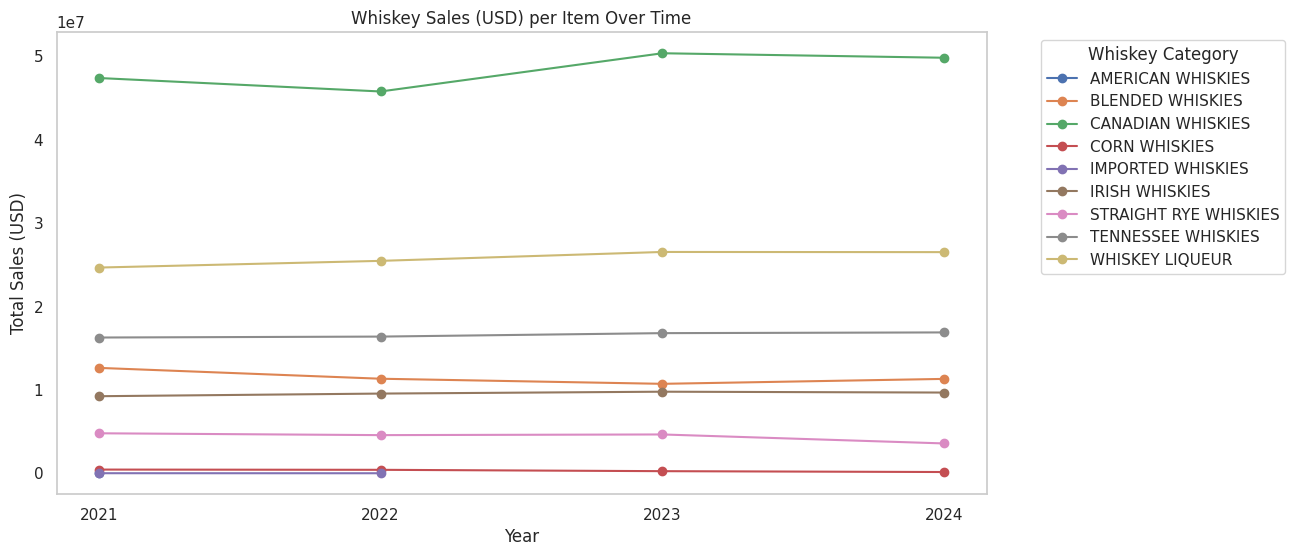

In [ ]:

# Filter data for only WHISKEY
whiskey_sales = df_2021[df_2021["alcohol_type"] == "WHISKEY"]

# Group by year and category, then sum sales
whiskey_sales_by_year = whiskey_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Plot the time series
plt.figure(figsize=(12, 6))
whiskey_sales_by_year.plot(marker="o", linestyle="-", figsize=(12, 6))

# Customize the plot
plt.title("Whiskey Sales (USD) per Item Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.xticks(whiskey_sales_by_year.index)  # Ensure year labels are shown correctly
plt.legend(title="Whiskey Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(False)

# Show the plot
plt.show()


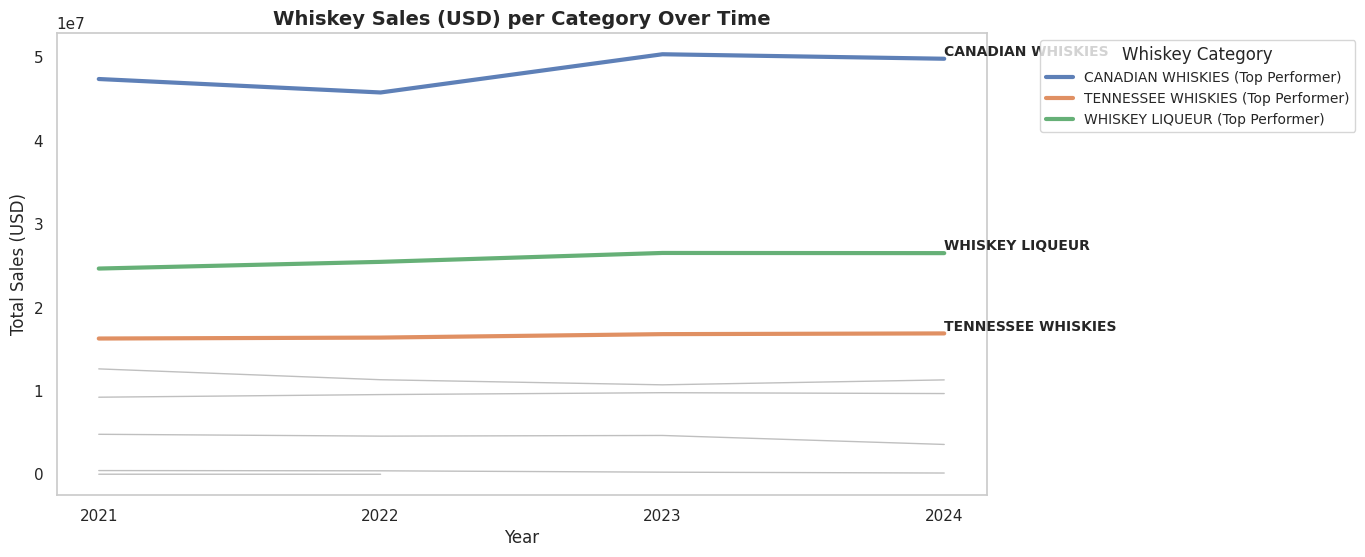

In [ ]:
#Filter for only WHISKEY
whiskey_sales = df_2021[df_2021["alcohol_type"] == "WHISKEY"]

# Group by year and category, then sum sales
whiskey_sales_by_year = whiskey_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = whiskey_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((whiskey_sales_by_year.iloc[-1] - whiskey_sales_by_year.iloc[0]) / whiskey_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in whiskey_sales_by_year.columns:
    if category in top_3:
        plt.plot(whiskey_sales_by_year.index, whiskey_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(whiskey_sales_by_year.index, whiskey_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(whiskey_sales_by_year.index, whiskey_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("Whiskey Sales (USD) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(whiskey_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="Whiskey Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = whiskey_sales_by_year.index[-1]
    plt.text(last_year, whiskey_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

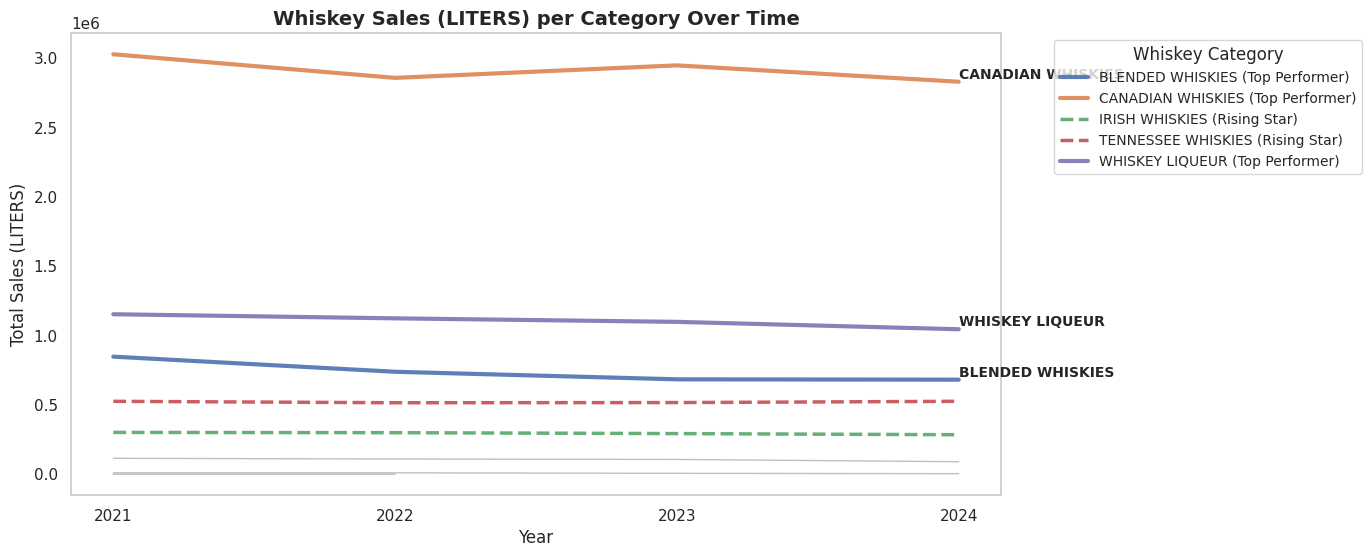

In [ ]:
#Filter for only WHISKEY LITERS
whiskey_sales = df_2021[df_2021["alcohol_type"] == "WHISKEY"]

# Group by year and category, then sum sales
whiskey_sales_by_year = whiskey_sales.groupby(["year", "category"])["sale_liters"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = whiskey_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((whiskey_sales_by_year.iloc[-1] - whiskey_sales_by_year.iloc[0]) / whiskey_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in whiskey_sales_by_year.columns:
    if category in top_3:
        plt.plot(whiskey_sales_by_year.index, whiskey_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(whiskey_sales_by_year.index, whiskey_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(whiskey_sales_by_year.index, whiskey_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("Whiskey Sales (LITERS) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(whiskey_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="Whiskey Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = whiskey_sales_by_year.index[-1]
    plt.text(last_year, whiskey_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

###**VODKA**
-Per USD:American vodkas (only 4 categories, remaining 3 behaved similarly)

-Per Liter: American vodkas (only 4 categories, remaining 3 behaved similarly)

<Figure size 1200x600 with 0 Axes>

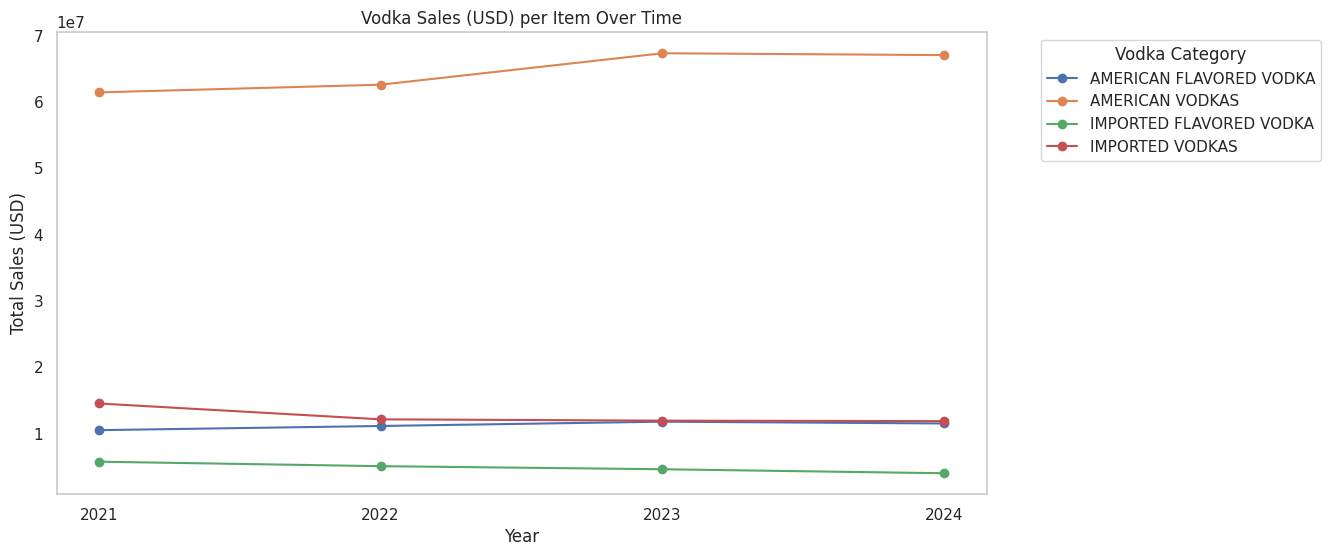

In [ ]:
# Filter data for only VODKA
vodka_sales = df_2021[df_2021["alcohol_type"] == "VODKA"]

# Group by year and item, then sum sales
vodka_sales_by_year = vodka_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Plot the time series
plt.figure(figsize=(12, 6))
vodka_sales_by_year.plot(marker="o", linestyle="-", figsize=(12, 6))

# Customize the plot
plt.title("Vodka Sales (USD) per Item Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.xticks(vodka_sales_by_year.index)  # Ensure year labels are shown correctly
plt.legend(title="Vodka Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(False)

# Show the plot
plt.show()

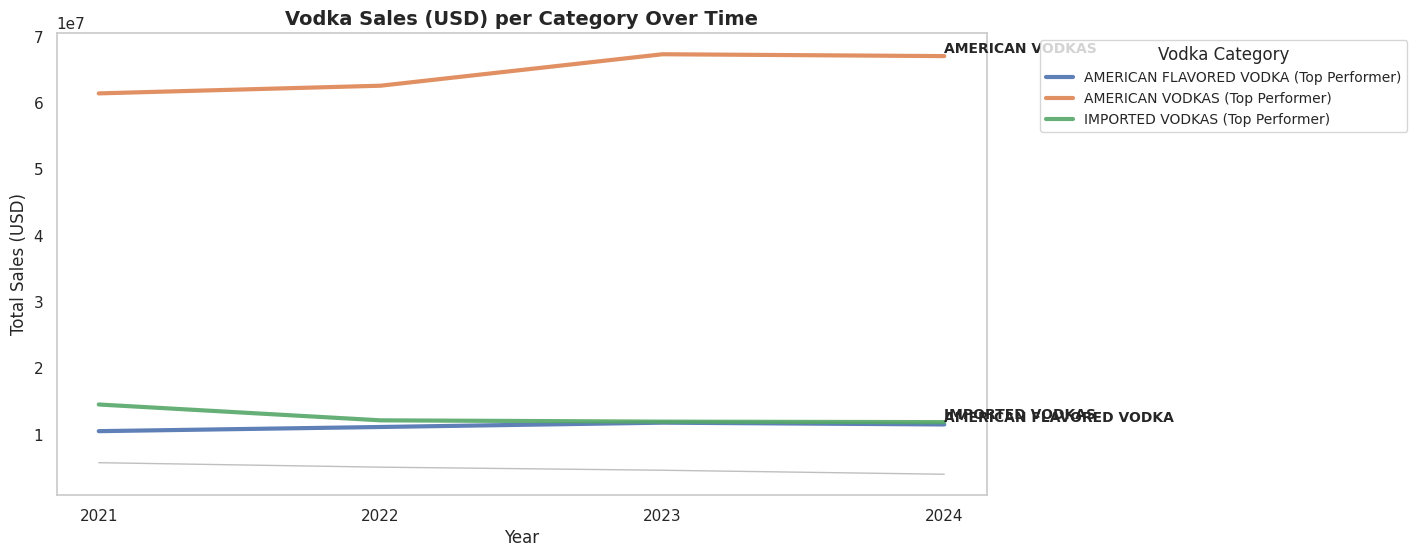

In [ ]:
#Filter for only VOKDA
vodka_sales = df_2021[df_2021["alcohol_type"] == "VODKA"]

# Group by year and category, then sum sales
vodka_sales_by_year = vodka_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = vodka_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((vodka_sales_by_year.iloc[-1] - vodka_sales_by_year.iloc[0]) / vodka_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in vodka_sales_by_year.columns:
    if category in top_3:
        plt.plot(vodka_sales_by_year.index, vodka_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(vodka_sales_by_year.index, vodka_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(vodka_sales_by_year.index, vodka_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("Vodka Sales (USD) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(vodka_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="Vodka Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = vodka_sales_by_year.index[-1]
    plt.text(last_year, vodka_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

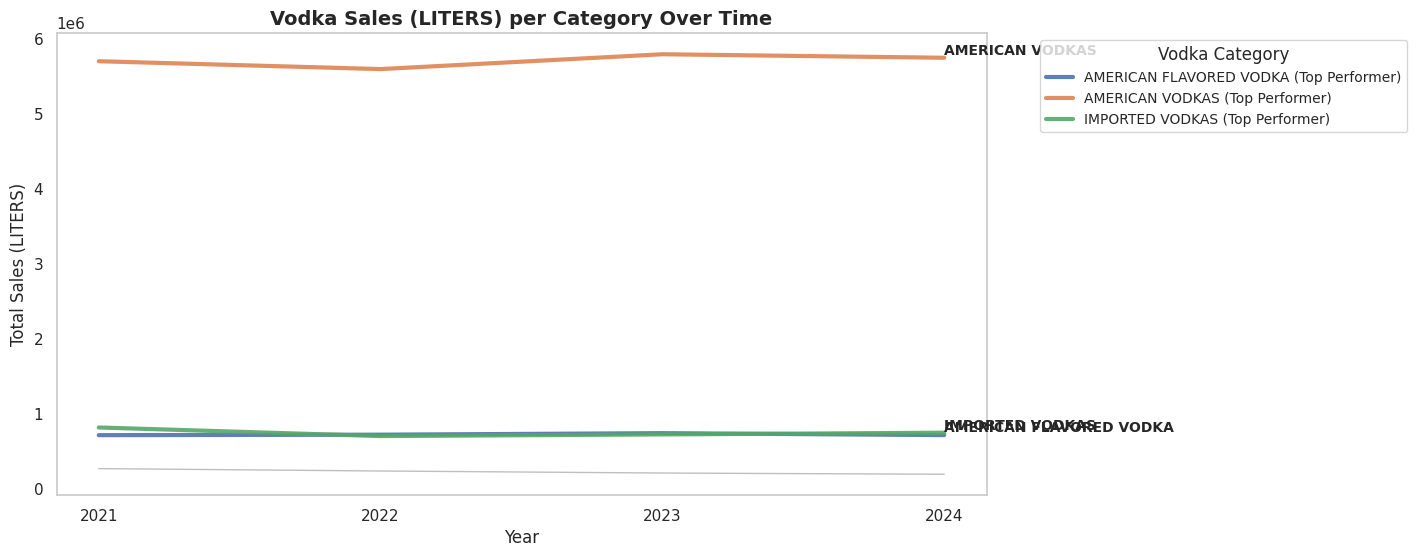

In [ ]:
#Filter for only VOKDA LITERS
vodka_sales = df_2021[df_2021["alcohol_type"] == "VODKA"]

# Group by year and category, then sum sales
vodka_sales_by_year = vodka_sales.groupby(["year", "category"])["sale_liters"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = vodka_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((vodka_sales_by_year.iloc[-1] - vodka_sales_by_year.iloc[0]) / vodka_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in vodka_sales_by_year.columns:
    if category in top_3:
        plt.plot(vodka_sales_by_year.index, vodka_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(vodka_sales_by_year.index, vodka_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(vodka_sales_by_year.index, vodka_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("Vodka Sales (LITERS) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(vodka_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="Vodka Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = vodka_sales_by_year.index[-1]
    plt.text(last_year, vodka_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

###**RUM**
-Per USD: Spiced rum, flavoured rum, white rum

-Per Liter: Spiced rum, flavoured rum, white rum

<Figure size 1200x600 with 0 Axes>

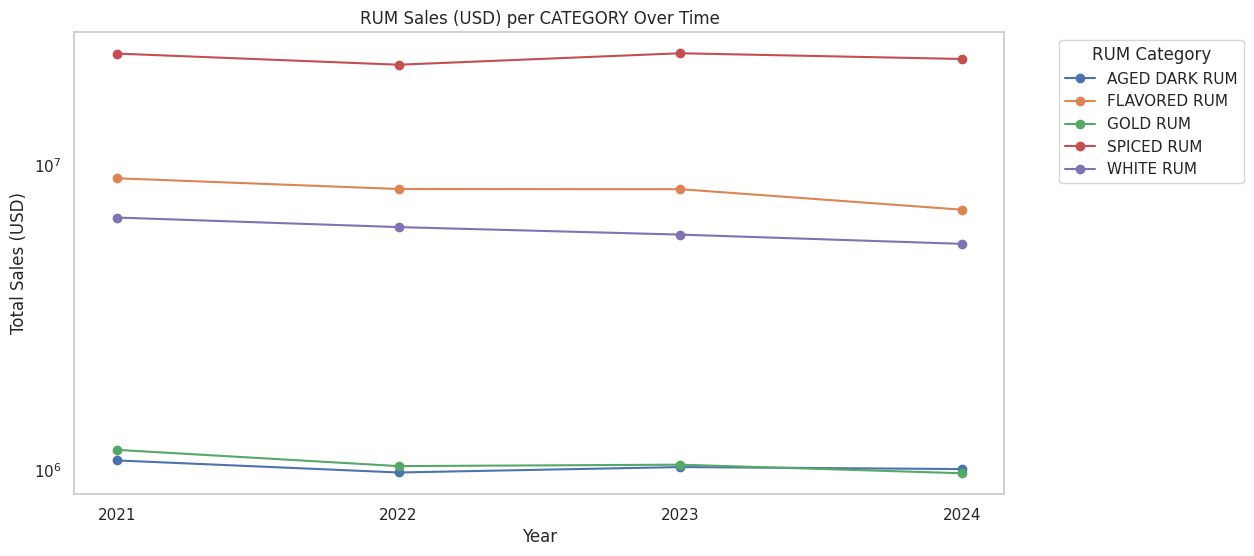

In [ ]:
# Filter data for only RUM
rum_sales = df_2021[df_2021["alcohol_type"] == "RUM"]

# Group by year and item, then sum sales
rum_sales_by_year = rum_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Plot the time series
plt.figure(figsize=(12, 6))
rum_sales_by_year.plot(marker="o", linestyle="-", figsize=(12, 6))

# Customize the plot
plt.title("RUM Sales (USD) per CATEGORY Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.xticks(rum_sales_by_year.index)  # Ensure year labels are shown correctly
plt.legend(title="RUM Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yscale("log")
plt.grid(False)

# Show the plot
plt.show()

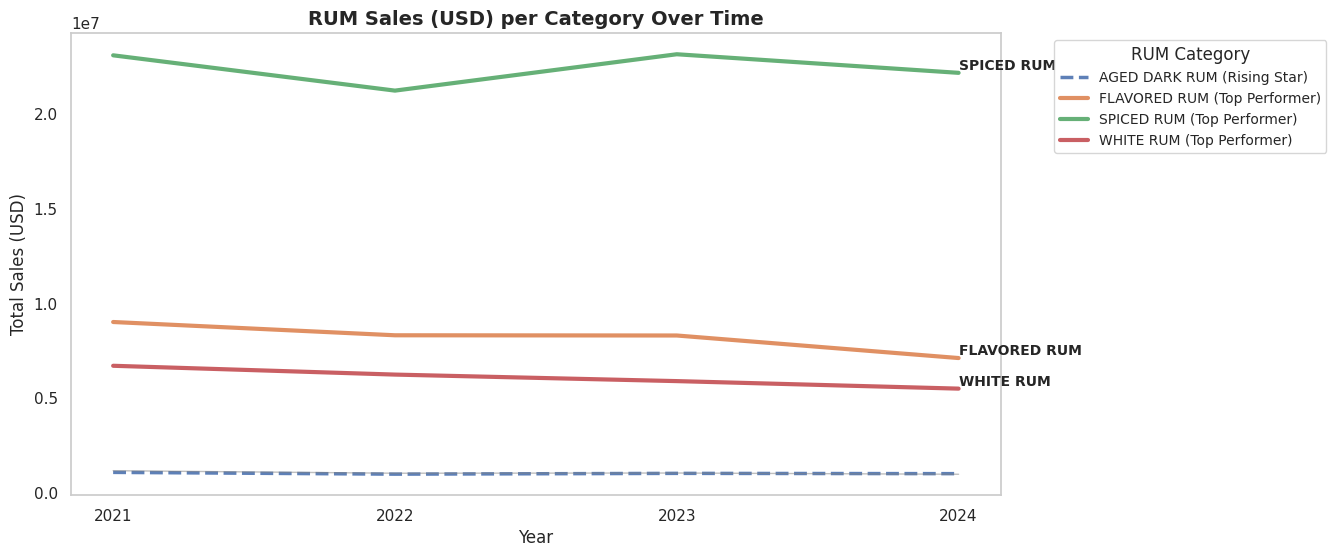

In [ ]:
#Filter for only RUM
rum_sales = df_2021[df_2021["alcohol_type"] == "RUM"]

# Group by year and category, then sum sales
rum_sales_by_year = rum_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = rum_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((rum_sales_by_year.iloc[-1] - rum_sales_by_year.iloc[0]) / rum_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in rum_sales_by_year.columns:
    if category in top_3:
        plt.plot(rum_sales_by_year.index, rum_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(rum_sales_by_year.index, rum_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(rum_sales_by_year.index, rum_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("RUM Sales (USD) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rum_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="RUM Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = rum_sales_by_year.index[-1]
    plt.text(last_year, rum_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

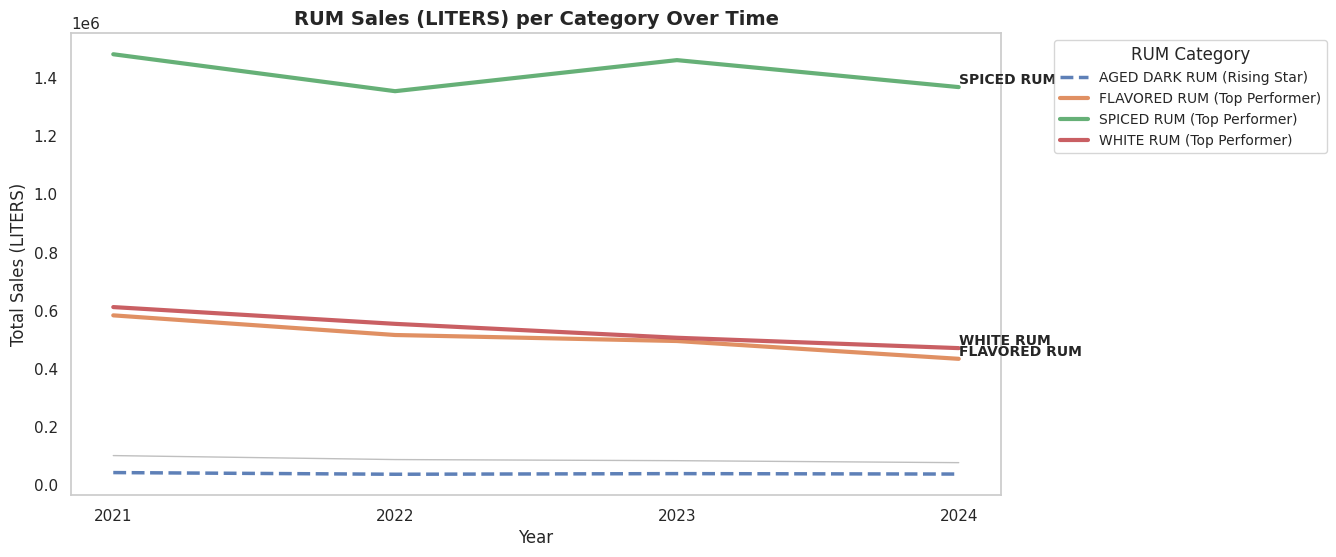

In [ ]:
#Filter for only RUM LITERS
rum_sales = df_2021[df_2021["alcohol_type"] == "RUM"]

# Group by year and category, then sum sales
rum_sales_by_year = rum_sales.groupby(["year", "category"])["sale_liters"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = rum_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((rum_sales_by_year.iloc[-1] - rum_sales_by_year.iloc[0]) / rum_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in rum_sales_by_year.columns:
    if category in top_3:
        plt.plot(rum_sales_by_year.index, rum_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(rum_sales_by_year.index, rum_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(rum_sales_by_year.index, rum_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("RUM Sales (LITERS) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(rum_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="RUM Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = rum_sales_by_year.index[-1]
    plt.text(last_year, rum_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

###**TEQUILA**
-Per USD: agave tequila(only 2 categories, this one highly better performance)

-Per Liter: agave tequila(only 2 categories, this one highly better performance- mixto has been going down meaning higher prices to keep usd sales constant but lower liters sold).

<Figure size 1200x600 with 0 Axes>

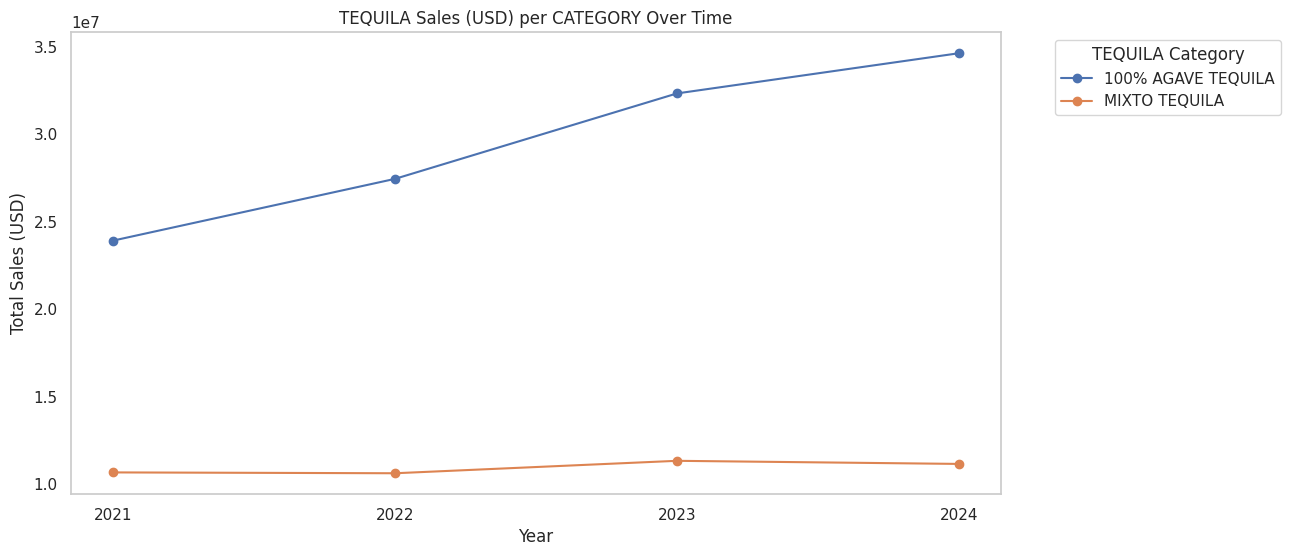

In [ ]:
# Filter data for only TEQUILA
tequila_sales = df_2021[df_2021["alcohol_type"] == "TEQUILA"]

# Group by year and item, then sum sales
tequila_sales_by_year = tequila_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Plot the time series
plt.figure(figsize=(12, 6))
tequila_sales_by_year.plot(marker="o", linestyle="-", figsize=(12, 6))

# Customize the plot
plt.title("TEQUILA Sales (USD) per CATEGORY Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.xticks(tequila_sales_by_year.index)  # Ensure year labels are shown correctly
plt.legend(title="TEQUILA Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(False)

# Show the plot
plt.show()

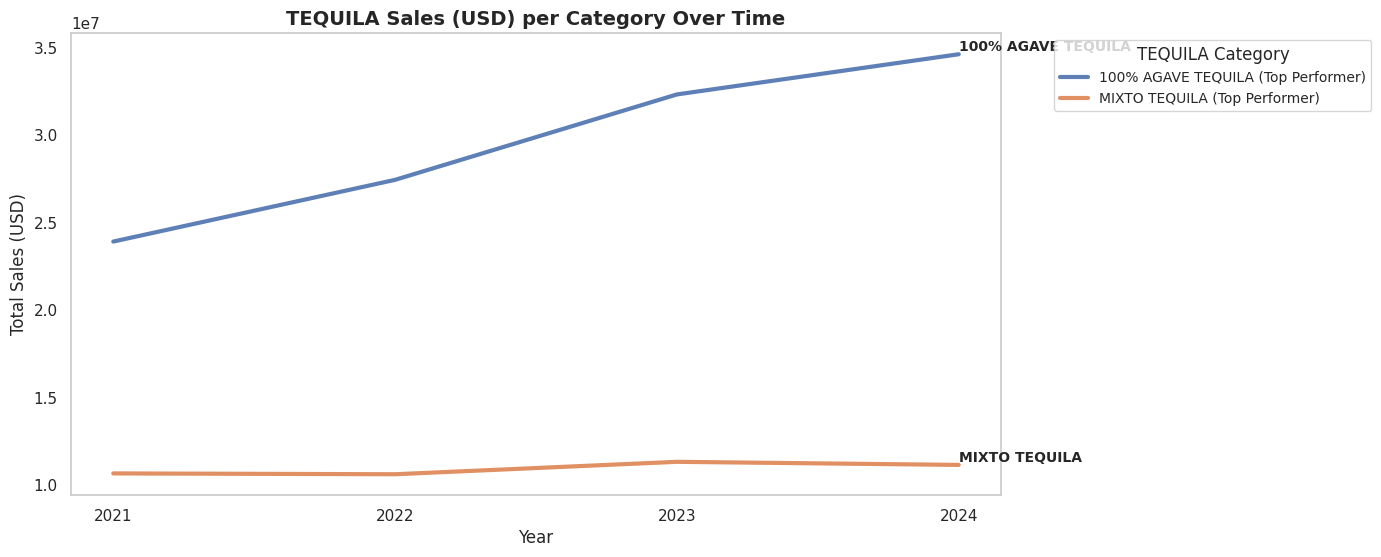

In [ ]:
#Filter for only TEQUILA
tequila_sales = df_2021[df_2021["alcohol_type"] == "TEQUILA"]

# Group by year and category, then sum sales
tequila_sales_by_year = tequila_sales.groupby(["year", "category"])["sale_usd"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = tequila_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((tequila_sales_by_year.iloc[-1] - tequila_sales_by_year.iloc[0]) / tequila_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in tequila_sales_by_year.columns:
    if category in top_3:
        plt.plot(tequila_sales_by_year.index, tequila_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(tequila_sales_by_year.index, tequila_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(tequila_sales_by_year.index, tequila_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("TEQUILA Sales (USD) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(tequila_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="TEQUILA Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = tequila_sales_by_year.index[-1]
    plt.text(last_year, tequila_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

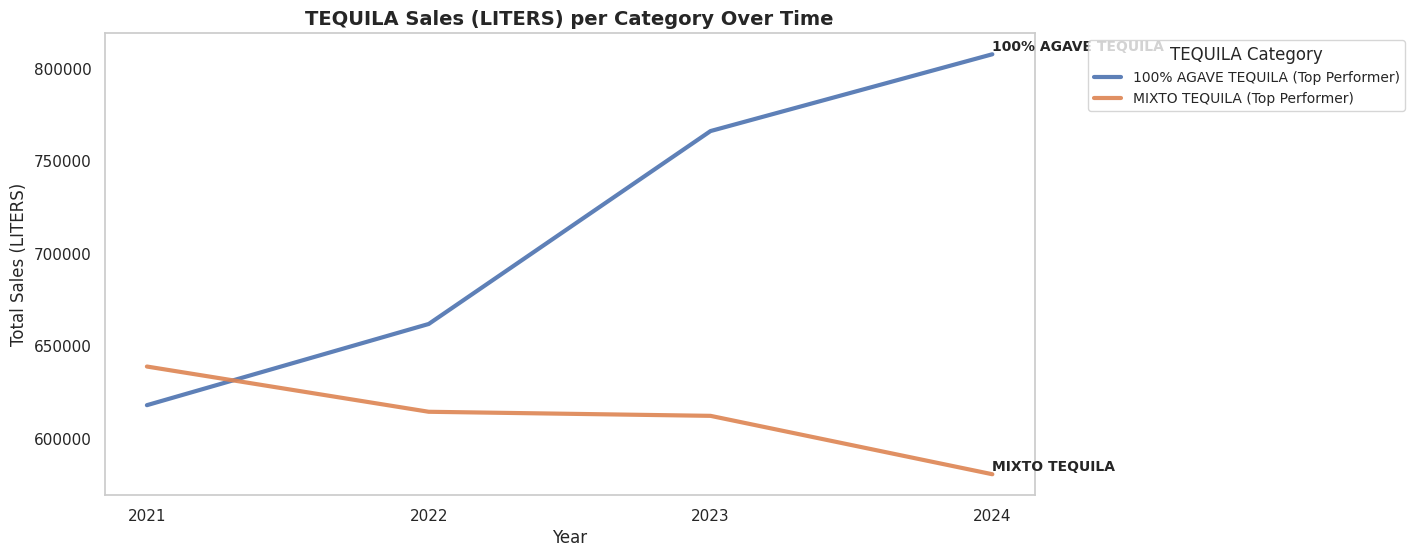

In [ ]:
#Filter for only TEQUILA LITERS
tequila_sales = df_2021[df_2021["alcohol_type"] == "TEQUILA"]

# Group by year and category, then sum sales
tequila_sales_by_year = tequila_sales.groupby(["year", "category"])["sale_liters"].sum().unstack()

# Identify Top 3 Best Performing Categories (Highest Sales)
top_3 = tequila_sales_by_year.max().nlargest(3).index

# Identify "Rising Stars" (Highest % Growth)
growth_rates = ((tequila_sales_by_year.iloc[-1] - tequila_sales_by_year.iloc[0]) / tequila_sales_by_year.iloc[0]).sort_values(ascending=False)
rising_stars = growth_rates.nlargest(2).index

# Plot the time series
plt.figure(figsize=(12, 6))

for category in tequila_sales_by_year.columns:
    if category in top_3:
        plt.plot(tequila_sales_by_year.index, tequila_sales_by_year[category],
                 linewidth=3, label=f"{category} (Top Performer)", alpha=0.9)
    elif category in rising_stars:
        plt.plot(tequila_sales_by_year.index, tequila_sales_by_year[category],
                 linewidth=2.5, linestyle="dashed", label=f"{category} (Rising Star)", alpha=0.9)
    else:
        plt.plot(tequila_sales_by_year.index, tequila_sales_by_year[category],
                 linewidth=1, color="gray", alpha=0.5)

# Customize the plot
plt.title("TEQUILA Sales (LITERS) per Category Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(tequila_sales_by_year.index)
plt.grid(False)  # Removes grid lines

# Move legend outside
plt.legend(title="TEQUILA Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Label Top Performing Categories
for category in top_3:
    last_year = tequila_sales_by_year.index[-1]
    plt.text(last_year, tequila_sales_by_year.loc[last_year, category], category,
             fontsize=10, fontweight="bold", verticalalignment="bottom")

# Show the plot
plt.show()

##**National vs Imported consumption**

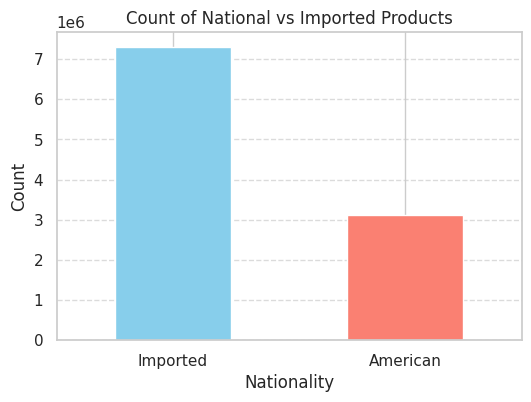

In [ ]:
nationality_counts = df_2021["nationality"].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
nationality_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Count of National vs Imported Products")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##  FALTA AGREGAR LABEL DE ACTUAL COUNT

<Figure size 1000x500 with 0 Axes>

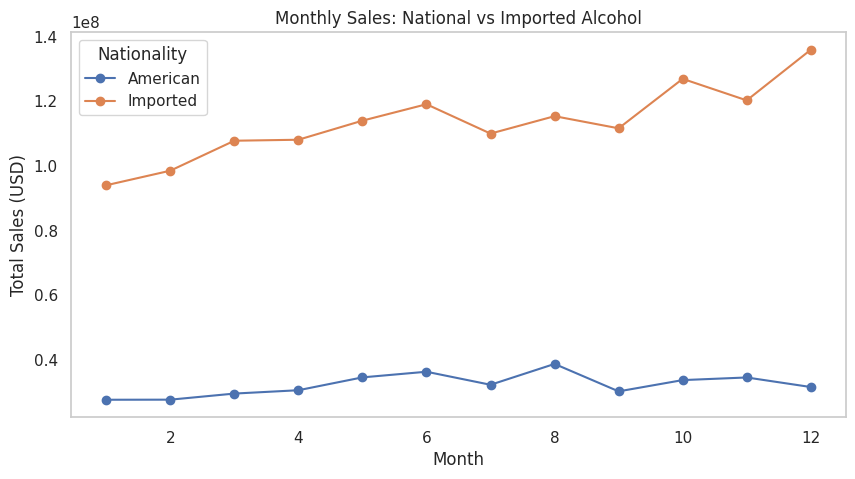

In [ ]:
# Group by month and nationality, then sum sales
monthly_sales = df_2021.groupby(["month", "nationality"])["sale_usd"].sum().unstack()

# Plot time series
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o", linestyle="-", figsize=(10, 5))

# Customize the plot
plt.title("Monthly Sales: National vs Imported Alcohol")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(False)
plt.legend(title="Nationality")

# Show plot
plt.show()

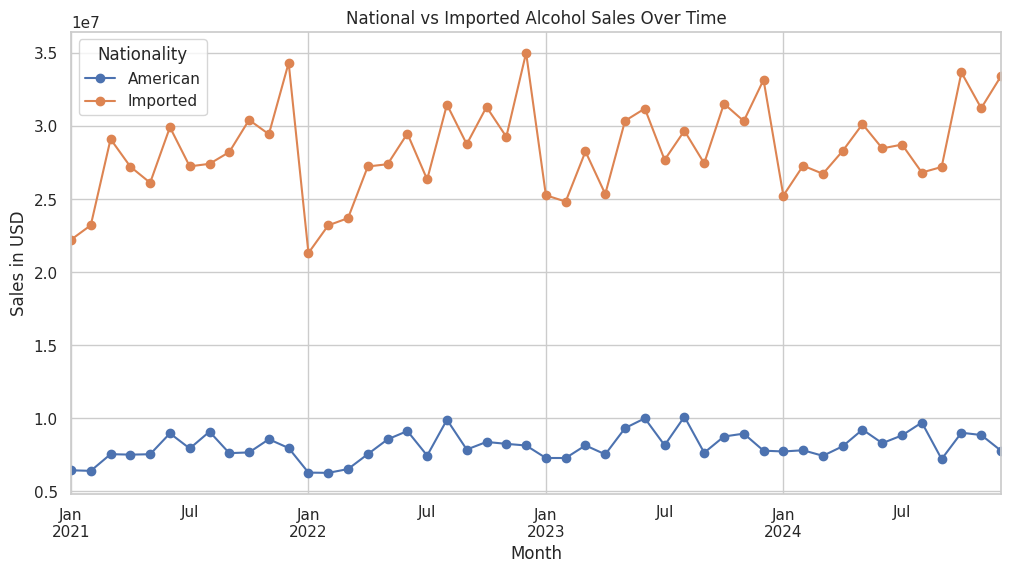

In [ ]:
#Resampling to monthly national vs imported alcohols to see trend of consumption

american_monthly_sales = df_2021[df_2021["nationality"] == "American"].resample('ME')['sale_usd'].sum()
imported_monthly_sales = df_2021[df_2021["nationality"] == "Imported"].resample('ME')['sale_usd'].sum() #ME --> monthly resampling

# Combine into one DataFrame for plotting
monthly_sales = pd.DataFrame({
    "American": american_monthly_sales,
    "Imported": imported_monthly_sales
})

# Plot
monthly_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title("National vs Imported Alcohol Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales in USD")
plt.legend(title="Nationality")
plt.grid(True)
plt.show()

##**Negative Sales**
Most returned alcohol type: Giftset, mezcal, scotch, bourbon

Lest returned alcohol type: rum, vodka, whiskey

In [ ]:
df_2021_negative = df_2021[df_2021["sale_usd"] < 0]
df_2021_negative.head()

store_number                             store_name  \
Date                                                              
2022-07-20          5859  LIQUOR TOBACCO & GROCERY - MASON CITY   
2022-07-21          3456                QUICK SHOP / CLEAR LAKE   
2022-07-22          2523        HY-VEE FOOD STORE / CENTERVILLE   
2022-07-22          6158              HAWKS SMOKE SHOP / MARION   
2022-07-22          2605     HY-VEE DRUGSTORE #5 / CEDAR RAPIDS   

                            address          city      zip       county  \
Date                                                                      
2022-07-20   18 NORTH MONROE AVENUE    MASON CITY  50401.0  CERRO GORDO   
2022-07-21             904 N 8TH ST     CLEARLAKE  50428.0  CERRO GORDO   
2022-07-22               609 N 18TH   CENTERVILLE  52544.0    APPANOOSE   
2022-07-22             1396 7TH AVE        MARION  52302.0         LINN   
2022-07-22  2001 BLAIRS FERRY RD NE  CEDAR RAPIDS  52402.0         LINN   

                     category           vendor_name  \
Date                                                  
2022-07-20    IMPORTED VODKAS     PERNOD RICARD USA   
2022-07-21      MIXTO TEQUILA             LUXCO INC   
2022-07-22    AMERICAN VODKAS  FIFTH GENERATION INC   
2022-07-22  CANADIAN WHISKIES    HEAVEN HILL BRANDS   
2022-07-22    AMERICAN VODKAS     PHILLIPS BEVERAGE   

                                           item  pack  ...  inv_item_number  \
Date                                                   ...                    
2022-07-20     ABSOLUT SWEDISH VODKA 80PRF MINI    10  ...                1   
2022-07-21                        JUAREZ SILVER    12  ...                1   
2022-07-22                 TITOS HANDMADE VODKA     6  ...           100001   
2022-07-22  BLACK VELVET PEACH CANADIAN WHISKEY    12  ...           300001   
2022-07-22                            ROW VODKA    12  ...           400001   

            alcohol_type  quality         store_type  store_status        Lat  \
Date                                                                            
2022-07-20         VODKA   BUDGET      GROCERY STORE             A -93.208614   
2022-07-21       TEQUILA   BUDGET  CONVENIENCE STORE             I -93.378772   
2022-07-22         VODKA  PREMIUM      GROCERY STORE             A -92.867967   
2022-07-22       WHISKEY   BUDGET      LIQUEUR STORE             I -91.594936   
2022-07-22         VODKA   BUDGET        DRUG STORES             A -91.668919   

                  Lon    Vendor Name simple  \
Date                                          
2022-07-20  43.152301     PERNOD RICARD USA   
2022-07-21  43.142868             LUXCO INC   
2022-07-22  40.737577  FIFTH GENERATION INC   
2022-07-22  42.033278    HEAVEN HILL BRANDS   
2022-07-22  42.034799     PHILLIPS BEVERAGE   

                                Store Name simple nationality  
Date                                                           
2022-07-20  LIQUOR TOBACCO & GROCERY - MASON CITY    Imported  
2022-07-21                QUICK SHOP / CLEAR LAKE    Imported  
2022-07-22        HY-VEE FOOD STORE / CENTERVILLE    American  
2022-07-22              HAWKS SMOKE SHOP / MARION    Imported  
2022-07-22     HY-VEE DRUGSTORE #5 / CEDAR RAPIDS    American  

[5 rows x 33 columns]

In [ ]:
len(df_2021_negative)

7744

In [ ]:
df_2021_negative["category"].value_counts()

category
AMERICAN VODKAS                         1111
CANADIAN WHISKIES                        713
STRAIGHT BOURBON WHISKIES                669
WHISKEY LIQUEUR                          596
100% AGAVE TEQUILA                       453
TEMPORARY & SPECIALTY PACKAGES           359
AMERICAN FLAVORED VODKA                  296
BLENDED WHISKIES                         248
AMERICAN SCHNAPPS                        236
SPICED RUM                               233
TENNESSEE WHISKIES                       210
COCKTAILS/RTD                            170
MIXTO TEQUILA                            170
IMPORTED CORDIALS & LIQUEURS             169
AMERICAN CORDIALS & LIQUEURS             166
CREAM LIQUEURS                           141
IMPORTED VODKAS                          141
NEUTRAL GRAIN SPIRITS FLAVORED           130
AMERICAN BRANDIES                        124
IMPORTED BRANDIES                        117
IMPORTED SCHNAPPS                        116
WHITE RUM                                116
FLAVORED RUM                             114
SCOTCH WHISKIES                          106
IRISH WHISKIES                            91
IMPORTED DRY GINS                         79
IMPORTED FLAVORED VODKA                   78
SINGLE MALT SCOTCH                        73
AMERICAN DRY GINS                         72
IMPORTED DISTILLED SPIRITS SPECIALTY      68
TRIPLE SEC                                60
STRAIGHT RYE WHISKIES                     54
AMERICAN DISTILLED SPIRITS SPECIALTY      46
SINGLE BARREL BOURBON WHISKIES            34
COFFEE LIQUEURS                           32
AGED DARK RUM                             31
BOTTLED IN BOND BOURBON                   27
FLAVORED GIN                              23
SPECIAL ORDER ITEMS                       22
NEUTRAL GRAIN SPIRITS                     16
GOLD RUM                                  15
MEZCAL                                    13
CORN WHISKIES                              4
AMERICAN SLOE GINS                         2
Name: count, dtype: int64

In [ ]:
df_2021_negative["alcohol_type"].value_counts()

alcohol_type
WHISKEY     1916
VODKA       1626
BOURBON      730
TEQUILA      623
LIQUOR       568
RUM          509
GIFTSET      381
SCHNAPPS     352
SPIRITS      260
BRANDY       241
SCOTCH       179
GIN          176
RTD          170
MEZCAL        13
Name: count, dtype: int64

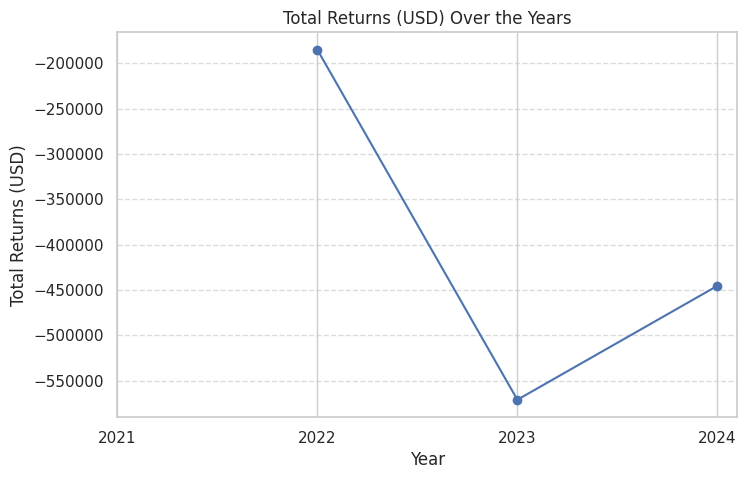

In [ ]:
# Group by year and sum sales
neg_sales_by_year = df_2021_negative.groupby("year")["sale_usd"].sum()

# Plot time series
plt.figure(figsize=(8, 5))
neg_sales_by_year.plot(marker="o", linestyle="-", color="b")

# Customize the plot
plt.title("Total Returns (USD) Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Returns (USD)")
plt.xticks(sales_by_year.index)  # Ensure all years are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

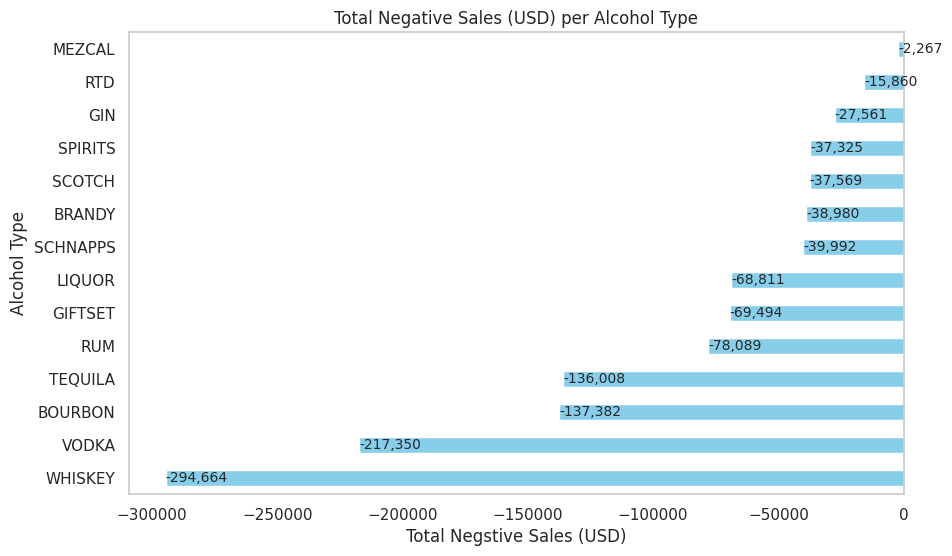

In [ ]:
#TREND OF ALCOHOL RETURNED

# Group by alcohol_type and sum the sales
returns_by_alcohol = df_2021_negative.groupby("alcohol_type")["sale_usd"].sum()

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
returns_by_alcohol.sort_values().plot(kind="barh", color="skyblue")  # Horizontal bar chart

# Customize the plot
plt.title("Total Negative Sales (USD) per Alcohol Type")
plt.xlabel("Total Negstive Sales (USD)")
plt.ylabel("Alcohol Type")
plt.grid(False)

# Annotate bars with values
for index, value in enumerate(returns_by_alcohol.sort_values()):
    plt.text(value, index, f"{value:,.0f}", va='center', fontsize=10)

# Show the plot
plt.show()


In [ ]:
#Percentage of returns by quantity of sales

for alcohol in returns_by_alcohol.index.to_list():
  ratio_of_return = returns_by_alcohol[returns_by_alcohol.index == alcohol].sum() / df_2021[df_2021["alcohol_type"] == alcohol].sale_usd.sum()
  print(f"{alcohol} has a {ratio_of_return} ratio of return")

BOURBON has a -0.0008561268333257199 ratio of return
BRANDY has a -0.0005614503314957723 ratio of return
GIFTSET has a -0.0012242523888495518 ratio of return
GIN has a -0.0007179707420727298 ratio of return
LIQUOR has a -0.0006226987924001872 ratio of return
MEZCAL has a -0.001171931961241603 ratio of return
RTD has a -0.00048074427387964847 ratio of return
RUM has a -0.0005032592383688648 ratio of return
SCHNAPPS has a -0.0007570623503028491 ratio of return
SCOTCH has a -0.0009473903740680938 ratio of return
SPIRITS has a -0.0012324753059308607 ratio of return
TEQUILA has a -0.000839161320330608 ratio of return
VODKA has a -0.0005816364460081305 ratio of return
WHISKEY has a -0.0006323148688864486 ratio of return


<Figure size 1000x500 with 0 Axes>

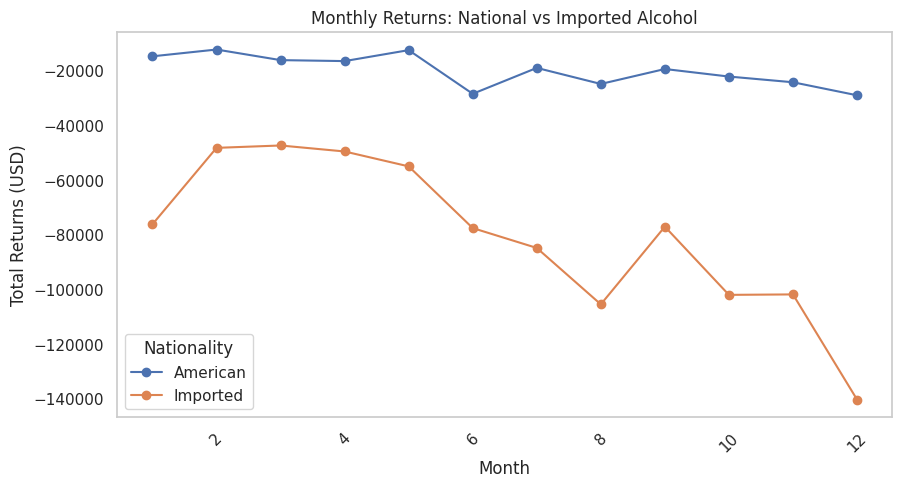

In [ ]:
# Group by month and nationality, then sum sales
monthly_sales_negative = df_2021_negative.groupby(["month", "nationality"])["sale_usd"].sum().unstack()

# Plot time series
plt.figure(figsize=(10, 5))
monthly_sales_negative.plot(marker="o", linestyle="-", figsize=(10, 5))

# Customize the plot
plt.title("Monthly Returns: National vs Imported Alcohol")
plt.xlabel("Month")
plt.ylabel("Total Returns (USD)")
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.grid(False)
plt.legend(title="Nationality")

# Show plot
plt.show()

##**Avg price per alcohol & category**

In [ ]:
#Average price per category

# Calculate price per ml
df_2021['price_per_ml'] = df_2021['sale_usd'] / (df_2021['bottle_ml'] * df_2021['bottles_sold'])

# Group by alcohol_type and category, then calculate the mean
avg_price_df = df_2021.groupby(['alcohol_type', 'category'])['price_per_ml'].mean().reset_index()

# Display the resulting DataFrame
avg_price_df.sort_values(by=['price_per_ml'], ascending=False)

alcohol_type                              category  price_per_ml
12       LIQUOR          AMERICAN CORDIALS & LIQUEURS      0.318901
24     SCHNAPPS                     AMERICAN SCHNAPPS      0.261667
47      WHISKEY                       WHISKEY LIQUEUR      0.196634
6       GIFTSET        TEMPORARY & SPECIALTY PACKAGES      0.151749
43      WHISKEY                     IMPORTED WHISKIES      0.123507
32      SPIRITS        NEUTRAL GRAIN SPIRITS FLAVORED      0.117462
46      WHISKEY                    TENNESSEE WHISKIES      0.101093
27       SCOTCH                    SINGLE MALT SCOTCH      0.075998
33      TEQUILA                    100% AGAVE TEQUILA      0.074490
25     SCHNAPPS                     IMPORTED SCHNAPPS      0.070260
15       LIQUOR          IMPORTED CORDIALS & LIQUEURS      0.068127
4        BRANDY                     IMPORTED BRANDIES      0.066566
14       LIQUOR                        CREAM LIQUEURS      0.065703
45      WHISKEY                 STRAIGHT RYE WHISKIES      0.056340
34      TEQUILA                         MIXTO TEQUILA      0.055874
1       BOURBON        SINGLE BARREL BOURBON WHISKIES      0.054049
38        VODKA                       IMPORTED VODKAS      0.053502
2       BOURBON             STRAIGHT BOURBON WHISKIES      0.052608
26       SCOTCH                       SCOTCH WHISKIES      0.050619
44      WHISKEY                        IRISH WHISKIES      0.049919
35        VODKA               AMERICAN FLAVORED VODKA      0.049380
9           GIN                          FLAVORED GIN      0.049066
29      SPIRITS           DISTILLED SPIRITS SPECIALTY      0.046856
17       MEZCAL                                MEZCAL      0.045387
40      WHISKEY                      BLENDED WHISKIES      0.044670
28      SPIRITS  AMERICAN DISTILLED SPIRITS SPECIALTY      0.044511
41      WHISKEY                     CANADIAN WHISKIES      0.042906
0       BOURBON               BOTTLED IN BOND BOURBON      0.042328
5       GIFTSET                   SPECIAL ORDER ITEMS      0.041801
42      WHISKEY                         CORN WHISKIES      0.038734
39      WHISKEY                     AMERICAN WHISKIES      0.038000
31      SPIRITS                 NEUTRAL GRAIN SPIRITS      0.035910
13       LIQUOR                       COFFEE LIQUEURS      0.035023
22          RUM                            SPICED RUM      0.031309
10          GIN                     IMPORTED DRY GINS      0.030646
36        VODKA                       AMERICAN VODKAS      0.030329
19          RUM                         AGED DARK RUM      0.029698
11          GIN                         IMPORTED GINS      0.029507
37        VODKA               IMPORTED FLAVORED VODKA      0.026401
23          RUM                             WHITE RUM      0.026376
21          RUM                              GOLD RUM      0.024661
20          RUM                          FLAVORED RUM      0.021644
30      SPIRITS  IMPORTED DISTILLED SPIRITS SPECIALTY      0.020054
3        BRANDY                     AMERICAN BRANDIES      0.019882
7           GIN                     AMERICAN DRY GINS      0.017910
18          RTD                         COCKTAILS/RTD      0.013922
8           GIN                    AMERICAN SLOE GINS      0.008326
16       LIQUOR                            TRIPLE SEC      0.004403

In [ ]:
#Average price by alcohol type
avg_price_by_alcohol = avg_price_df.groupby('alcohol_type')['price_per_ml'].mean().reset_index()
avg_price_by_alcohol.sort_values(by=['price_per_ml'], ascending=False)

alcohol_type  price_per_ml
8      SCHNAPPS      0.165963
4        LIQUOR      0.098431
2       GIFTSET      0.096775
13      WHISKEY      0.076867
11      TEQUILA      0.065182
9        SCOTCH      0.063308
10      SPIRITS      0.052959
0       BOURBON      0.049662
5        MEZCAL      0.045387
1        BRANDY      0.043224
12        VODKA      0.039903
3           GIN      0.027091
7           RUM      0.026738
6           RTD      0.013922

##**Population analysis - still brainstorming how to do this**

In [ ]:
populations = pd.read_csv("/content/drive/MyDrive/IOWA/County_Population_in_Iowa20250213.csv")

In [ ]:
populations = populations.sort_values(by=['FIPS','County','Population'], ascending=False)
populations = populations.drop(columns=["FIPS","Primary Point"])

In [ ]:
#Extracting only the county name for it to be easier
populations['County'] = populations['County'].str.extract(r"(\w+) County")
populations['Year'] = populations['Year'].str.extract(r"July 01 (\w+)")


In [ ]:
populations.head()

County  Year  Population
2671  Wright  1996       14674
379   Wright  1997       14662
1043  Wright  1998       14560
1975  Wright  1999       14506
1740  Wright  1995       14470

In [ ]:
pip install geopandas folium pandas

In [ ]:
import geopandas as gpd
import pandas as pd
import folium

In [ ]:
# Load Iowa counties shapefile (replace with correct file path)
iowa_map = gpd.read_file("https://github.com/plotly/datasets/raw/master/geojson-counties-fips.json")

# Merge GeoDataFrame with population data
iowa_map = iowa_map[iowa_map['STATE'] == '19']  # Iowa state FIPS code = 19
merged = iowa_map.merge(populations, left_on="NAME", right_on="County")

# Create Folium map
m = folium.Map(location=[42.1, -93.5], zoom_start=7)  # Centered on Iowa

# Add Choropleth layer
folium.Choropleth(
    geo_data=iowa_map,
    name="choropleth",
    data=merged,
    columns=["County", "Population"],
    key_on= "feature.properties.NAME",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population by County",
).add_to(m)

# Show the map
m.save("iowa_population_map.html")

In [ ]:
from IPython.display import IFrame, display

html_file_path = "/content/iowa_population_map.html"

# Read the HTML file content
with open(html_file_path, "r") as f:
    html_content = f.read()

# Display the HTML content within the notebook
display(IFrame(html_file_path, width=800, height=600))
# Create a folium map to show it is working properly
m = folium.Map(location=[42.1, -93.5], zoom_start=7)

##**Top Counties & cities sales**


**County in sales usd**

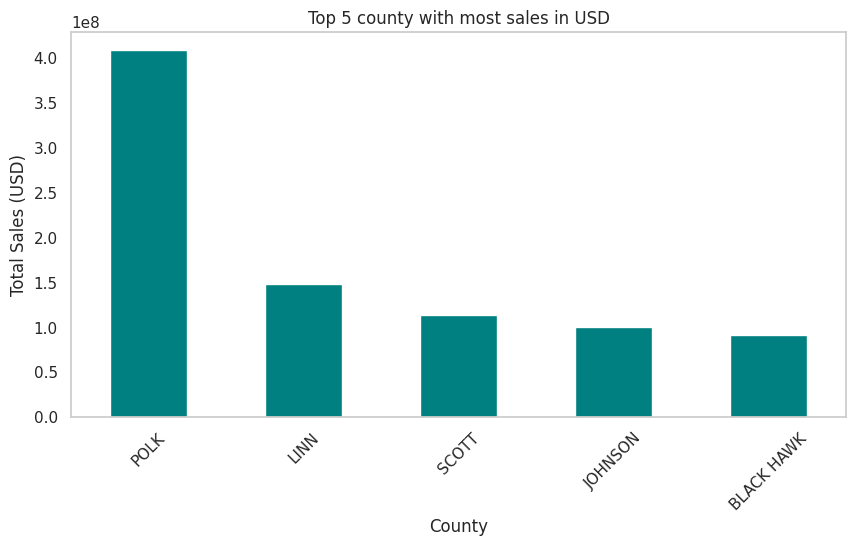

In [ ]:
# Group data and get top 5 counties by sales IN USD
top_counties_general = df_2021.groupby('county')['sale_usd'].sum()  #DF that groups county & sales usd
top_counties_general5 = df_2021.groupby('county')['sale_usd'].sum().nlargest(5) #to plot only top 5 counties


# Plot top salees counties
plt.figure(figsize=(10, 5))
top_counties_general5.plot(kind='bar', color='teal', title='Top 5 county with most sales in USD')
plt.xlabel('County')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()



**County in sales liters**

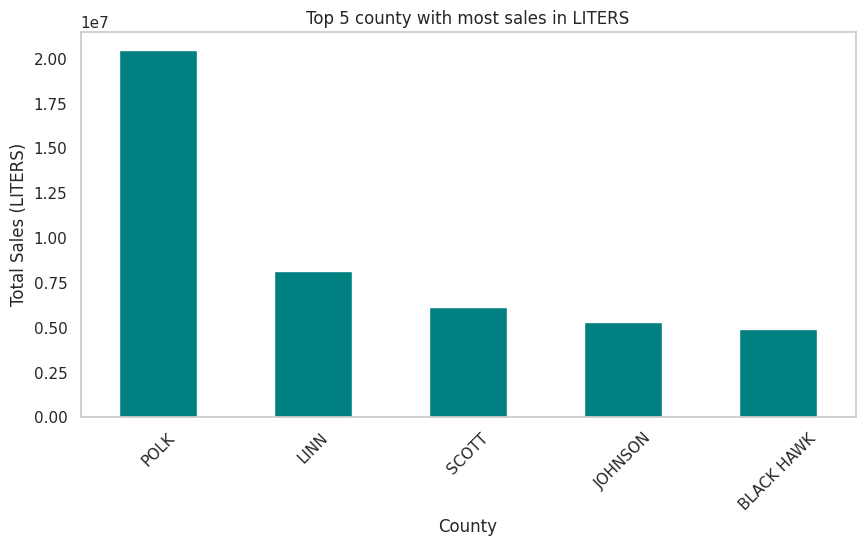

In [ ]:
# Group data and get top 5 counties by sales IN LITERS
top_counties_general = df_2021.groupby('county')['sale_liters'].sum()  #DF that groups county & sales usd
top_counties_general5 = df_2021.groupby('county')['sale_liters'].sum().nlargest(5) #to plot only top 5 counties


# Plot top salees counties
plt.figure(figsize=(10, 5))
top_counties_general5.plot(kind='bar', color='teal', title='Top 5 county with most sales in LITERS')
plt.xlabel('County')
plt.ylabel('Total Sales (LITERS)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

**City in sales usd**

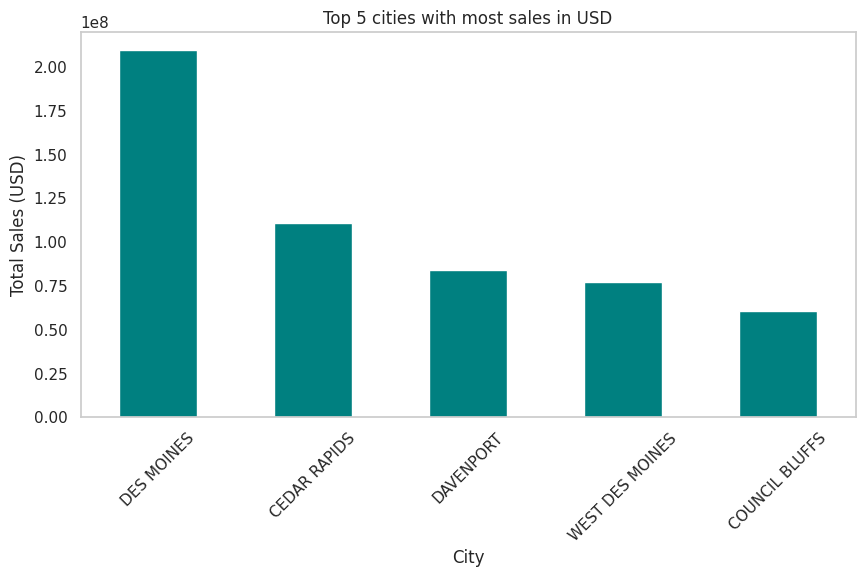

In [ ]:
# Group data and get top 5 counties by sales IN USD
top_cities_general = df_2021.groupby('city')['sale_usd'].sum()  #DF that groups cities & sales usd
top_citiess_general5 = df_2021.groupby('city')['sale_usd'].sum().nlargest(5) #to plot only top 5 cities


# Plot top salees counties
plt.figure(figsize=(10, 5))
top_citiess_general5.plot(kind='bar', color='teal', title='Top 5 cities with most sales in USD')
plt.xlabel('City')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


**County in sales liters**

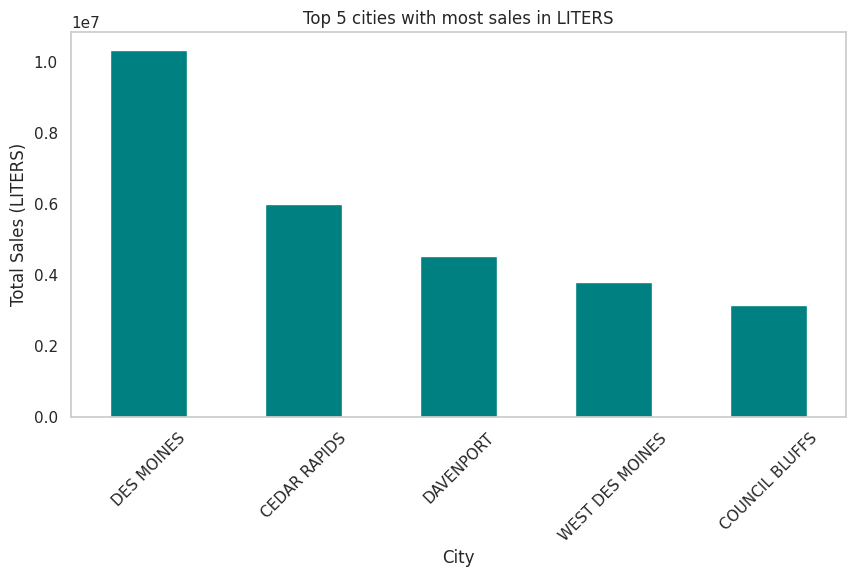

In [ ]:
# Group data and get top 5 counties by sales IN LITERS
top_cities_general = df_2021.groupby('city')['sale_liters'].sum()  #DF that groups cities & sales usd
top_citiess_general5 = df_2021.groupby('city')['sale_liters'].sum().nlargest(5) #to plot only top 5 cities


# Plot top salees counties
plt.figure(figsize=(10, 5))
top_citiess_general5.plot(kind='bar', color='teal', title='Top 5 cities with most sales in LITERS')
plt.xlabel('City')
plt.ylabel('Total Sales (LITERS)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


##**Price preferences: budget, premium, prestige**

Most of our products are budget.

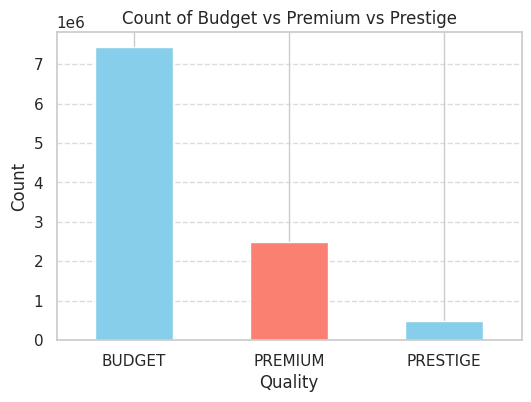

In [ ]:
qualities_counts = df_2021["quality"].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
qualities_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Count of Budget vs Premium vs Prestige")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

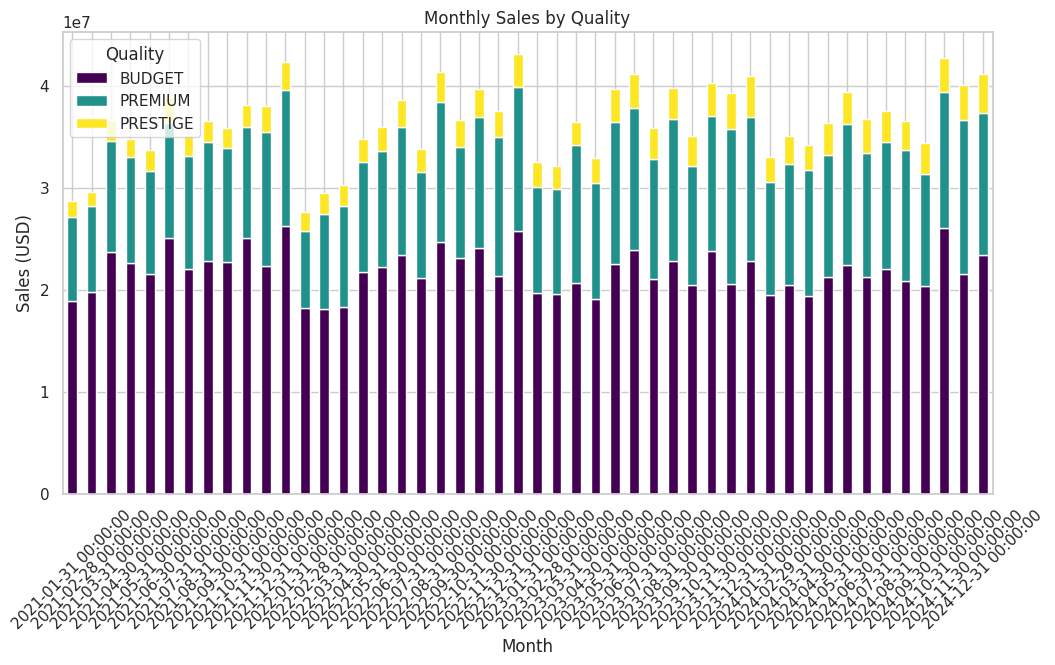

In [ ]:
# Group by 'quality' first, then resample by month
monthly_sales_by_quality = (
    df_2021.groupby('quality')
           .resample('ME')
           .sum(numeric_only=True)['sale_usd']
           .unstack()
)

# Plot stacked bar chart
monthly_sales_by_quality.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.title('Monthly Sales by Quality')
plt.legend(title='Quality')
plt.xticks(rotation=45)
plt.show()

##**TOP STORES - TYPE OF STORE & STORE NAME**

**TYPE OF STORE**

Most sales: grocery store

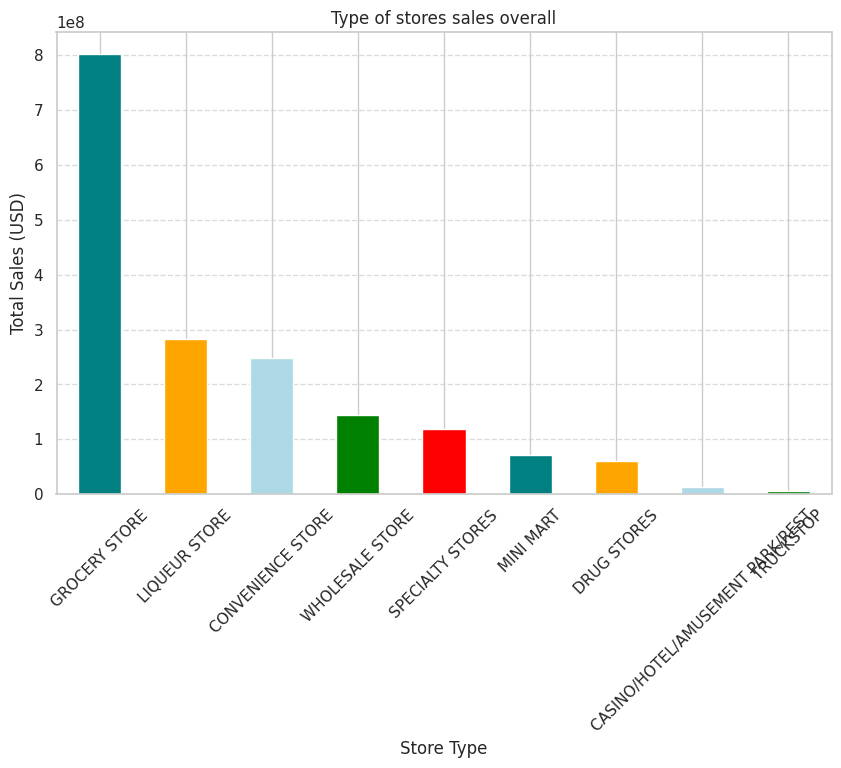

In [ ]:
top_type_stores_2021 = df_2021.groupby('store_type')['sale_usd'].sum()

# Plot as a vertical bar graph
plt.figure(figsize=(10, 6))
top_type_stores_2021.sort_values(ascending=False).plot(kind='bar', color=['teal', 'orange', 'lightblue', 'green', 'red'])

# Labels and title
plt.xlabel('Store Type')
plt.ylabel('Total Sales (USD)')
plt.title('Type of stores sales overall')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

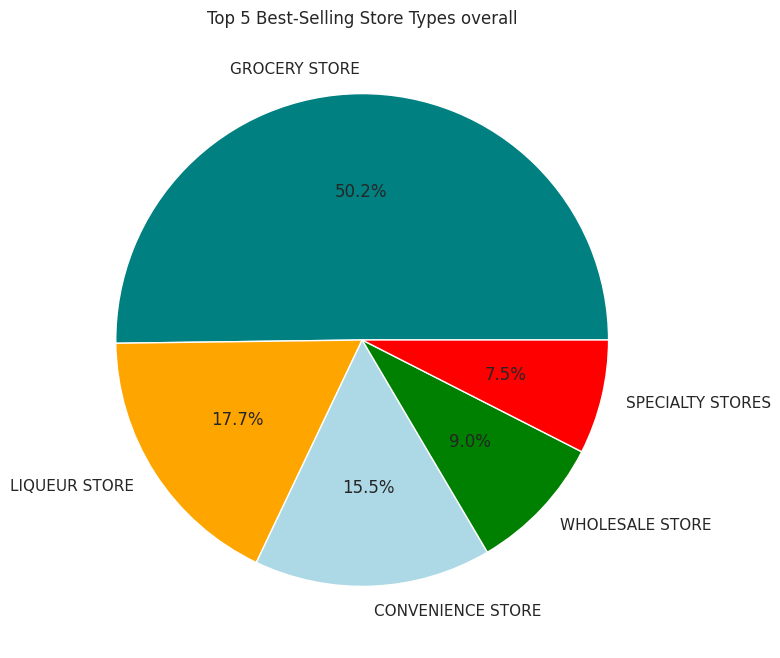

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores_2021 = df_2021.groupby('store_type')['sale_usd'].sum().nlargest(5)
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores_2021.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Types overall')
plt.show()

**NAME OF STORE**

Most sales: grocery store

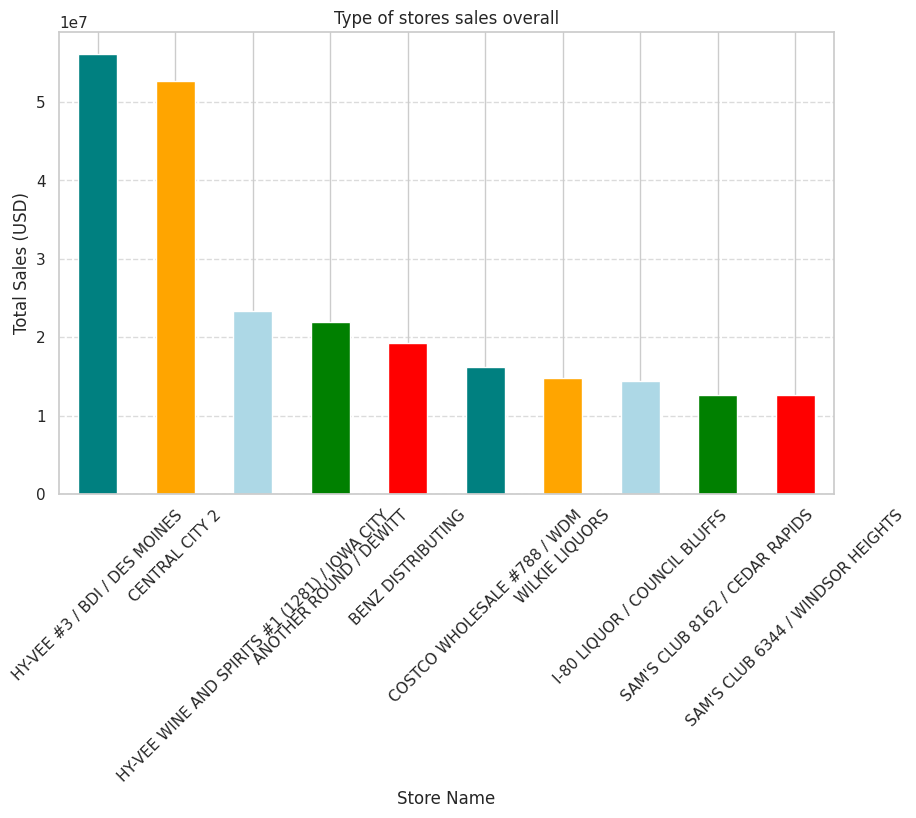

In [ ]:
top_type_stores_2021 = df_2021.groupby('Standardized Store Name')['sale_usd'].sum().nlargest(10)

# Plot as a vertical bar graph
plt.figure(figsize=(10, 6))
top_type_stores_2021.sort_values(ascending=False).plot(kind='bar', color=['teal', 'orange', 'lightblue', 'green', 'red'])

# Labels and title
plt.xlabel('Store Name')
plt.ylabel('Total Sales (USD)')
plt.title('Type of stores sales overall')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

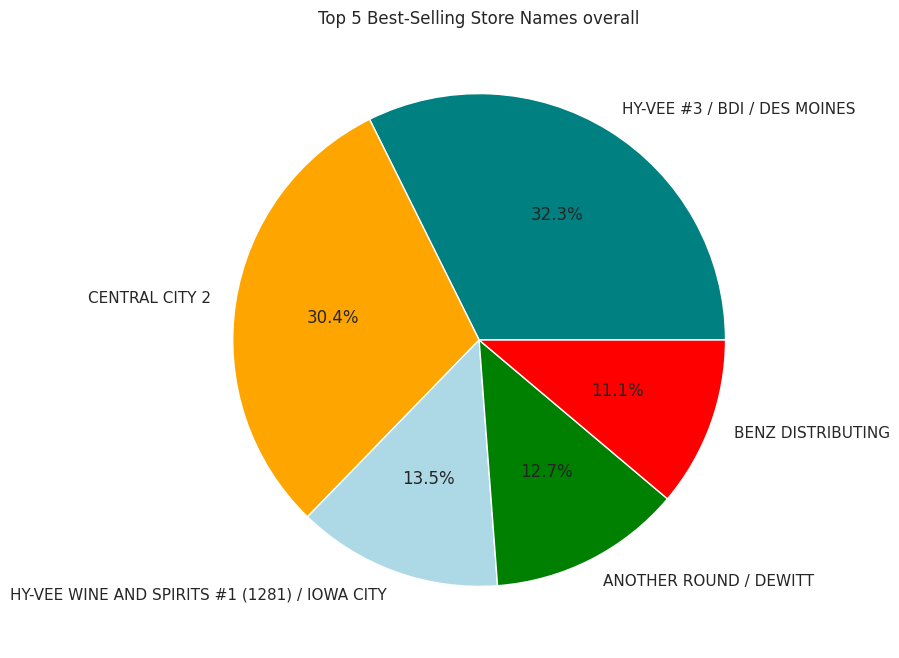

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores_2021 = df_2021.groupby('Standardized Store Name')['sale_usd'].sum().nlargest(5)
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores_2021.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Names overall')
plt.show()

##**TEQUILA - - DEEP DIVE**


In [ ]:
#Alcohol type has only 2 categories: 100% agave & mixto tequila

df_2021[df_2021["alcohol_type"] == "TEQUILA"]["category"].value_counts()

category
100% AGAVE TEQUILA    461606
MIXTO TEQUILA         225013
Name: count, dtype: int64

We can see an upwards trend in Agave Tequila while Mixto remains still.

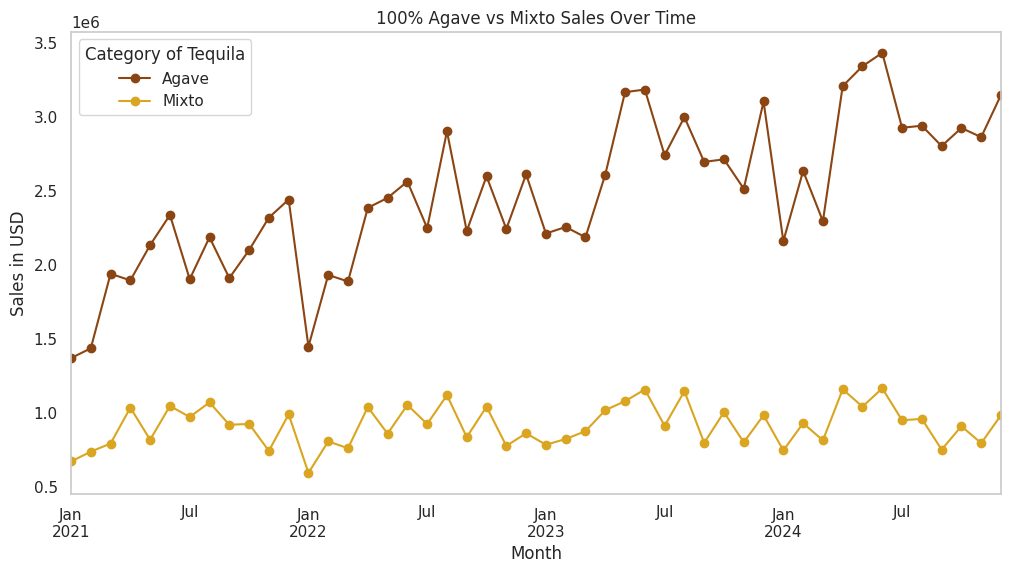

In [ ]:
#Comparing monthly sales of both categories

agavetequila_monthly_sales = df_2021[(df_2021["alcohol_type"] == "TEQUILA") & (df_2021["category"] == "100% AGAVE TEQUILA")].resample('ME')['sale_usd'].sum()
mixtotequila_monthly_sales = df_2021[(df_2021["alcohol_type"] == "TEQUILA") & (df_2021["category"] == "MIXTO TEQUILA")].resample('ME')['sale_usd'].sum()

# Combine into one DataFrame for plotting
tequila_sales = pd.DataFrame({
    "Agave": agavetequila_monthly_sales,
    "Mixto": mixtotequila_monthly_sales
})

# Plot
tequila_sales.plot(kind='line', figsize=(12,6), marker='o', color=colors)
plt.title("100% Agave vs Mixto Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales in USD")
plt.legend(title="Category of Tequila", )
plt.grid(False)
plt.show()

In [ ]:
tequila_df = df_2021[df_2021["alcohol_type"] == "TEQUILA"].copy()

In [ ]:
#Replacing misspelling of Añejo & Silver
tequila_df['item'] = tequila_df['item'].str.replace(r"A�EJO|AÑEJO", "ANEJO", regex=True)
tequila_df['item'] = tequila_df['item'].str.replace(r"ANJEO", "ANEJO", regex=True)
tequila_df['item'] = tequila_df['item'].str.replace(r"SLIVER", "SILVER", regex=True)

In [ ]:
#We can see there are some Mezcales mixed in the items. Let's count how many rows include Mezcales
mezcal_counts_in_tequilas= tequila_df[tequila_df['item'].str.contains(r'\b(MEZCAL|ESPADIN|TOBALA)\b', case=False, na=False)].shape[0]

print(f"There are {mezcal_counts_in_tequilas} rows with Mezcales")
print(f"There are {len(tequila_df)} rows of which are not Mezcales")
print(f"Since the ratio of mezcales is very low {mezcal_counts_in_tequilas/(len(tequila_df))} we will go ahead and delete them")

<ipython-input-75-f90662d927a6>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mezcal_counts_in_tequilas= tequila_df[tequila_df['item'].str.contains(r'\b(MEZCAL|ESPADIN|TOBALA)\b', case=False, na=False)].shape[0]


There are 291 rows with Mezcales
There are 686619 rows of which are not Mezcales
Since the ratio of mezcales is very low 0.00042381582799194315 we will go ahead and delete them


###**Seasonality of tequila**

<ipython-input-212-d406f1a205b0>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tequiladf_monthly_sales = tequila_df.resample('M')['sale_usd'].sum()


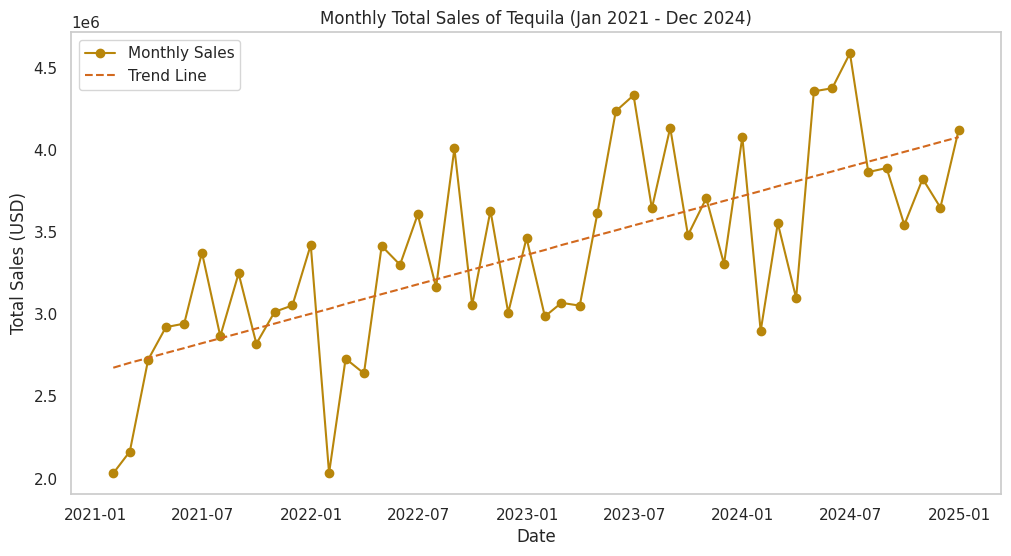

In [ ]:
import numpy as np

# Resample by month and sum total sales - IN USD
tequiladf_monthly_sales = tequila_df.resample('M')['sale_usd'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(tequiladf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, tequiladf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(tequiladf_monthly_sales.index, tequiladf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color="darkgoldenrod")
plt.plot(tequiladf_monthly_sales.index, trend_line, linestyle='--', color='chocolate', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Total Sales of Tequila (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()


<ipython-input-206-7c14eca2fcfc>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tequiladf_monthly_sales = tequila_df.resample('M')['sale_liters'].sum()


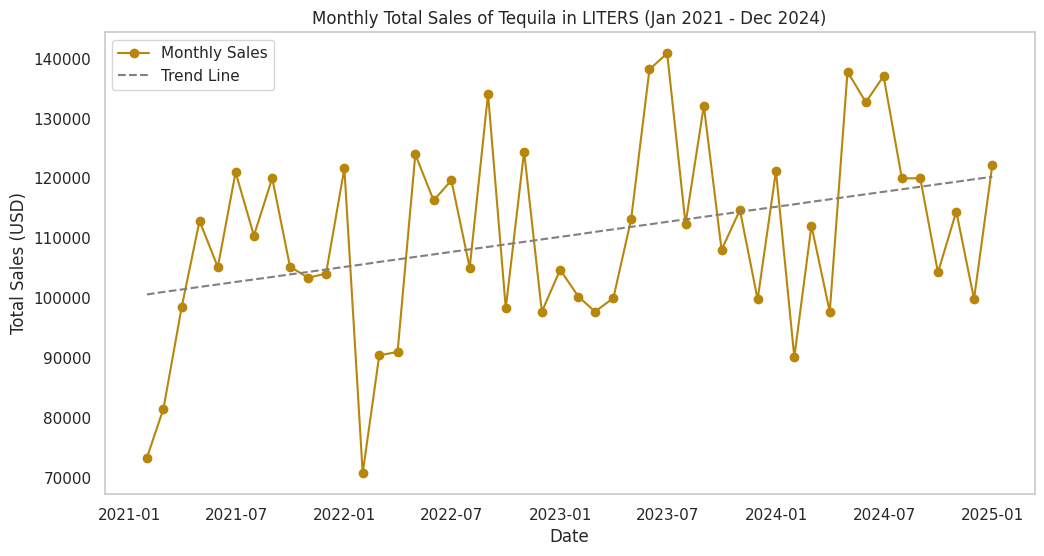

In [ ]:
# Resample by month and sum total sales - IN LITERS
tequiladf_monthly_sales = tequila_df.resample('M')['sale_liters'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(tequiladf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, tequiladf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(tequiladf_monthly_sales.index, tequiladf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color="darkgoldenrod")
plt.plot(tequiladf_monthly_sales.index, trend_line, linestyle='--', color='grey', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Total Sales of Tequila in LITERS (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()


In [ ]:
tequila_sales_summary = tequila_df.groupby(["year", "month", "day_of_week"])[["sale_usd", "sale_liters"]].sum().reset_index()

In [ ]:
tequila_sales_summary.columns

Index(['year', 'month', 'day_of_week', 'sale_usd', 'sale_liters'], dtype='object')

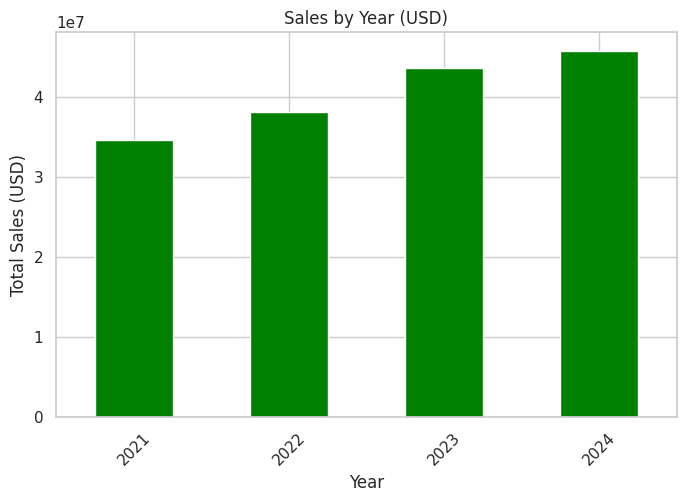

In [ ]:
# Sales by Year
yearly_sales = tequila_sales_summary.groupby('year')['sale_usd'].sum()
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='bar', color='green', title='Sales by Year (USD)')
plt.xlabel('Year')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

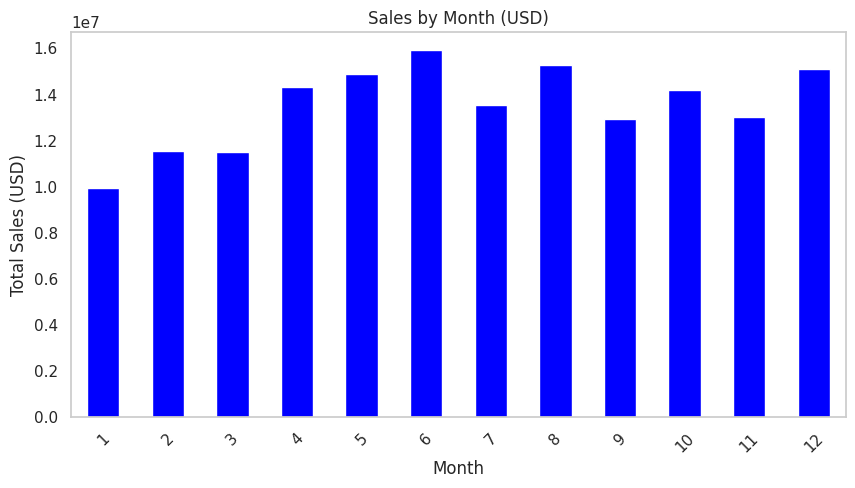

In [ ]:
# Sales by Month
monthly_sales = tequila_sales_summary.groupby('month')['sale_usd'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='blue', title='Sales by Month (USD)')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

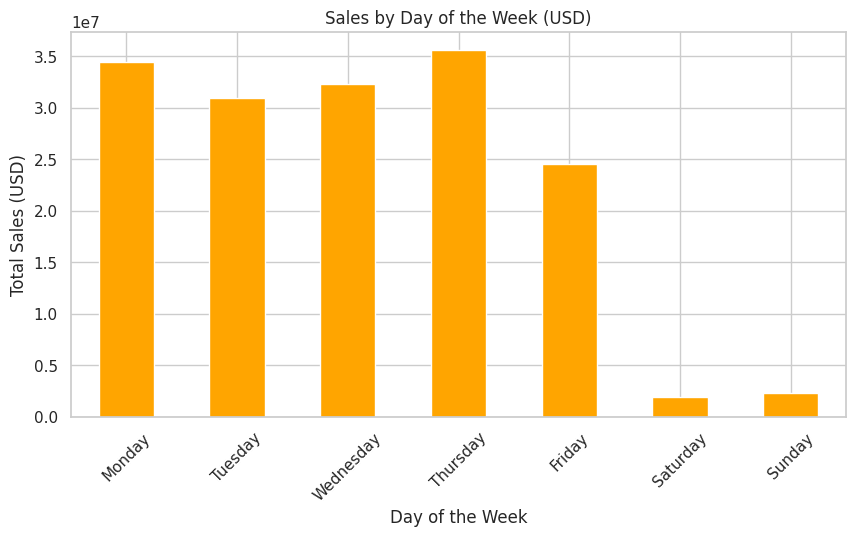

In [ ]:
# Sales by Day of the Week
daily_sales = tequila_sales_summary.groupby('day_of_week')['sale_usd'].sum()
# Reorder the index before plotting
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sales = daily_sales.reindex(days_order)
plt.figure(figsize=(10, 5))
daily_sales.plot(kind='bar', color='orange', title='Sales by Day of the Week (USD)') # Remove 'order' from here
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Deleting rows with mezcals
tequila_df = tequila_df[~tequila_df['item'].str.contains(r'\b(MEZCAL|ESPADIN|TOBALA)\b', case=False, na=False)]

<ipython-input-83-84d19b51ad17>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tequila_df = tequila_df[~tequila_df['item'].str.contains(r'\b(MEZCAL|ESPADIN|TOBALA)\b', case=False, na=False)]


In [ ]:
tequila_df.item.unique().tolist()

['HUSSONGS PLATINUM ANEJO',
 'OLMECA ALTOS PLATA',
 'MARGARITAVILLE GOLD TEQUILA',
 'HORNITOS LIME SHOT',
 'HORNITOS PLATA',
 'JOSE CUERVO ESPECIAL SILVER',
 '1800 SILVER',
 'JOSE CUERVO ESPECIAL REPOSADO',
 'JOSE CUERVO ESPECIAL REPOSADO SQUARE',
 'EL JIMADOR SILVER',
 'JUAREZ SILVER',
 'LUNAZUL BLANCO',
 'MILAGRO SILVER',
 'CAZADORES REPOSADO',
 'CASAMIGOS ANEJO',
 'TEREMANA BLANCO TEQUILA',
 'TORADA GOLD',
 'SAUZA CONMEMORATIVO',
 'LA PRIMA GOLD',
 'PATRON SILVER',
 'DON JULIO BLANCO',
 'CASA NOBLE CRYSTAL',
 'HERRADURA SILVER',
 'EL JIMADOR REPOSADO',
 'EL MAYOR ANEJO',
 'JOSE CUERVO ESPECIAL REPOSADO MINI',
 'CORRALEJO REPOSADO',
 'SAUZA GOLD',
 'HORNITOS REPOSADO',
 'OLMECA ALTOS REPOSADO',
 'DON JULIO REPOSADO',
 'EL MAYOR REPOSADO',
 'CASAMIGOS REPOSADO',
 'SAUZA BLANCO SILVER',
 'MARGARITAVILLE SILVER TEQUILA',
 '1800 REPOSADO',
 'PATRON REPOSADO',
 'PATRON ANEJO',
 'MILAGRO REPOSADO',
 'DULCE VIDA BLANCO',
 'EL MAYOR BLANCO',
 'ESPOLON BLANCO',
 'TORTILLA WHITE',
 'EL TESORO 

###**Adding new column: type of tequila**

In [ ]:
#Creating a column with Tequila type - BLANCO, REPOSADO, AÑEJO, ROSADO, DORADO, FLAVORED

def tequila_type(item_column):
    item_column = str(item_column).lower()  # Handle potential NaN values and normalize case
    if any(keyword in item_column for keyword in["anejo","tears of llorona","sauza conmemorativo","black barrel","real","selection suprema","partida elegante",
                                                 "tres generaciones legacy edition","burdeos","piedra","extra aged","reserva 44","herradura legend","guerrero","eight reserve","marques de tequila",
                                                 "sol del sur tequila"]):
        return 'ANEJO'
    elif any(keyword in item_column for keyword in["reposado","1942","reposada","don julio 3x375ml","patron el alto","astral tequila"]):
        return 'REPOSADO'
    elif any(keyword in item_column for keyword in["rosa","rosado"]):
        return 'ROSADO'
    elif any(keyword in item_column for keyword in["blanco","silver","white","plateado","plata","cristalino","platinum","crystal","platino","70","70th",
                                                   "ghost tequila","cielo","diamante","diamond","codigo 1530 combo mini","padrecito","blue dream","siete leguas decadas","santo puro mezquila",
                                                   "astral tequila"]):
        return 'BLANCO'
    elif any(keyword in item_column for keyword in["gold","dorado","joven","libelula"]):
        return 'DORADO/JOVEN'
    elif any(keyword in item_column for keyword in["jalapeno","habanero","coconut","grapefruit","orange","infused","flavored","mango","strawberry","lime","berry","citrus",
                                                   "salted chocolate","vanilla","alma miel","cream","devils"]):
        return 'FLAVORED'
    else:
       return 'UNKNOWN'

tequila_df['tequila_type'] = tequila_df['item'].apply(tequila_type)

In [ ]:
tequila_df['tequila_type'].value_counts()

tequila_type
BLANCO          343373
REPOSADO        249923
ANEJO            45693
DORADO/JOVEN     33665
FLAVORED         12525
ROSADO            1149
Name: count, dtype: int64

In [ ]:
tequila_df[tequila_df['tequila_type'] == 'UNKNOWN'].item.unique().tolist()

[]

###**ONLY AGAVE**

In [ ]:
#FIILTERING BY ONLY 100% AGAVES

agave_df = tequila_df[tequila_df.category == "100% AGAVE TEQUILA"].copy()

In [ ]:
agave_df.head()

store_number                 store_name       address        city  \
Date                                                                            
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   

                zip county            category               vendor_name  \
Date                                                                       
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA  MCCORMICK DISTILLING CO.   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA         PERNOD RICARD USA   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA            GEMINI SPIRITS   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA           JIM BEAM BRANDS   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA           JIM BEAM BRANDS   

                                   item  pack  ...  quality     store_type  \
Date                                           ...                           
2021-01-04      HUSSONGS PLATINUM ANEJO     6  ...  PREMIUM  LIQUEUR STORE   
2021-01-04           OLMECA ALTOS PLATA     6  ...  PREMIUM  LIQUEUR STORE   
2021-01-04  MARGARITAVILLE GOLD TEQUILA    12  ...   BUDGET  LIQUEUR STORE   
2021-01-04           HORNITOS LIME SHOT    12  ...  PREMIUM  LIQUEUR STORE   
2021-01-04               HORNITOS PLATA    12  ...  PREMIUM  LIQUEUR STORE   

            store_status        Lat       Lon        Vendor Name simple  \
Date                                                                      
2021-01-04             A -93.619787  41.60566  MCCORMICK DISTILLING CO.   
2021-01-04             A -93.619787  41.60566         PERNOD RICARD USA   
2021-01-04             A -93.619787  41.60566            GEMINI SPIRITS   
2021-01-04             A -93.619787  41.60566           JIM BEAM BRANDS   
2021-01-04             A -93.619787  41.60566           JIM BEAM BRANDS   

                    Store Name simple  nationality  price_per_ml  tequila_type  
Date                                                                            
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.052000         ANEJO  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.021411        BLANCO  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.011160  DORADO/JOVEN  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.027000      FLAVORED  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.027000        BLANCO  

[5 rows x 35 columns]

In [ ]:
agave_df.category.value_counts()

category
100% AGAVE TEQUILA    461315
Name: count, dtype: int64

In [ ]:
agave_df.nationality.value_counts()

nationality
Imported    461315
Name: count, dtype: int64

In [ ]:
agave_df.quality.value_counts().sort_values(ascending=False)

quality
PREMIUM     274579
PRESTIGE    147338
BUDGET       39398
Name: count, dtype: int64

In [ ]:
agave_df.tequila_type.value_counts().sort_values(ascending=False)

tequila_type
BLANCO          262313
REPOSADO        131675
ANEJO            45108
DORADO/JOVEN     12137
FLAVORED          8933
ROSADO            1149
Name: count, dtype: int64

#### **Time series sold by type of tequila**



In [ ]:
blanco_df = agave_df[(agave_df["tequila_type"] == "BLANCO")].resample('ME')['sale_usd'].sum()
reposado_df = agave_df[(agave_df["tequila_type"] == "REPOSADO")].resample('ME')['sale_usd'].sum()
anejo_df = agave_df[(agave_df["tequila_type"] == "ANEJO")].resample('ME')['sale_usd'].sum()
dorado_df = agave_df[(agave_df["tequila_type"] == "DORADO")].resample('ME')['sale_usd'].sum()
flavored_df = agave_df[(agave_df["tequila_type"] == "FLAVORED")].resample('ME')['sale_usd'].sum()
rosado_df = agave_df[(agave_df["tequila_type"] == "ROSADO")].resample('ME')['sale_usd'].sum()

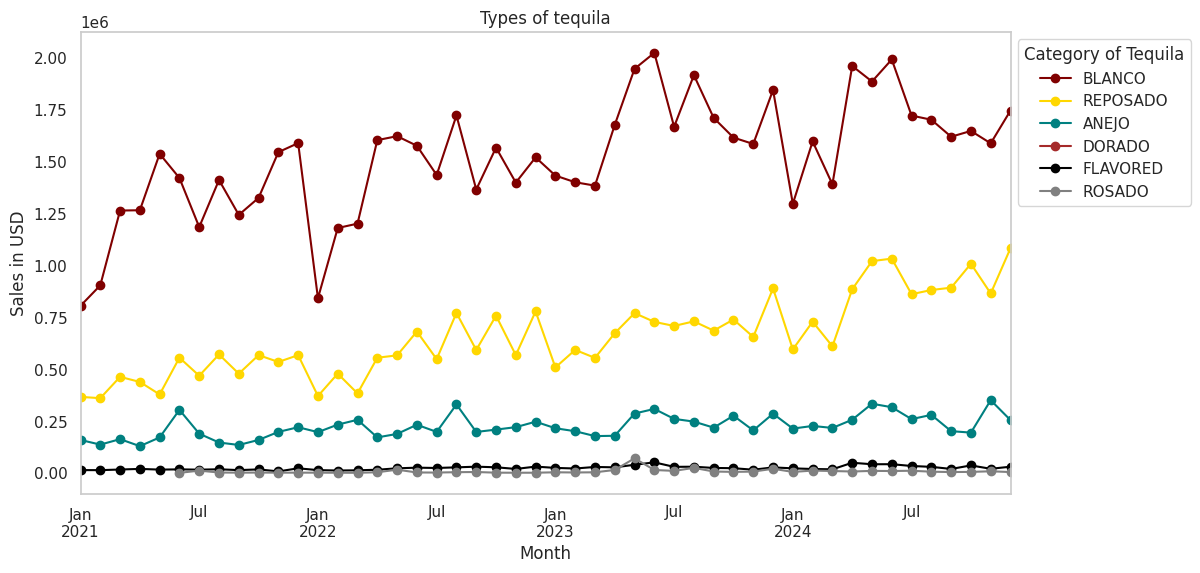

In [ ]:
# Combine into one DataFrame for plotting
colores = ['maroon', 'gold', 'teal', 'brown', 'black','grey']
agaves_by_type_sales = pd.DataFrame({
    "BLANCO": blanco_df,
    "REPOSADO": reposado_df,
    "ANEJO": anejo_df,
    "DORADO": dorado_df,
    "FLAVORED": flavored_df,
    "ROSADO": rosado_df
})

# Plot
agaves_by_type_sales.plot(kind='line', figsize=(12,6), marker='o', color=colores)
plt.title("Types of tequila")
plt.xlabel("Month")
plt.ylabel("Sales in USD")
plt.legend(title="Category of Tequila", loc='best', bbox_to_anchor=(1, 1))
plt.grid(False)
plt.show()

In [ ]:
#BY LITERS

blanco_df = agave_df[(agave_df["tequila_type"] == "BLANCO")].resample('ME')['sale_liters'].sum()
reposado_df = agave_df[(agave_df["tequila_type"] == "REPOSADO")].resample('ME')['sale_liters'].sum()
anejo_df = agave_df[(agave_df["tequila_type"] == "ANEJO")].resample('ME')['sale_liters'].sum()
dorado_df = agave_df[(agave_df["tequila_type"] == "DORADO")].resample('ME')['sale_liters'].sum()
flavored_df = agave_df[(agave_df["tequila_type"] == "FLAVORED")].resample('ME')['sale_liters'].sum()
rosado_df = agave_df[(agave_df["tequila_type"] == "ROSADO")].resample('ME')['sale_liters'].sum()

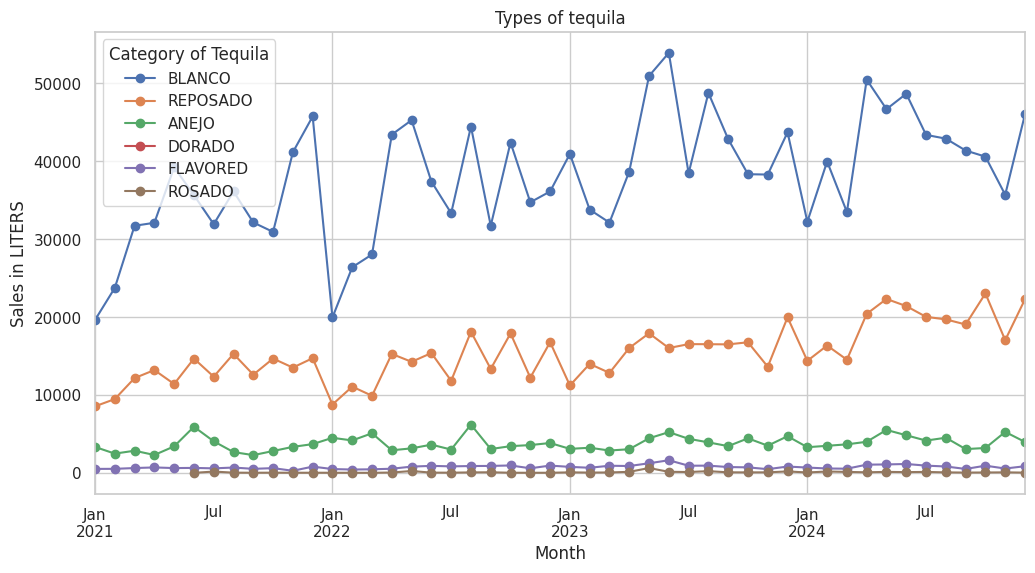

In [ ]:
# Combine into one DataFrame for plotting
agaves_by_type_sales = pd.DataFrame({
    "BLANCO": blanco_df,
    "REPOSADO": reposado_df,
    "ANEJO": anejo_df,
    "DORADO": dorado_df,
    "FLAVORED": flavored_df,
    "ROSADO": rosado_df
})

# Plot
agaves_by_type_sales.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Types of tequila")
plt.xlabel("Month")
plt.ylabel("Sales in LITERS")
plt.legend(title="Category of Tequila")
plt.grid(True)
plt.show()

####**Top sold items**

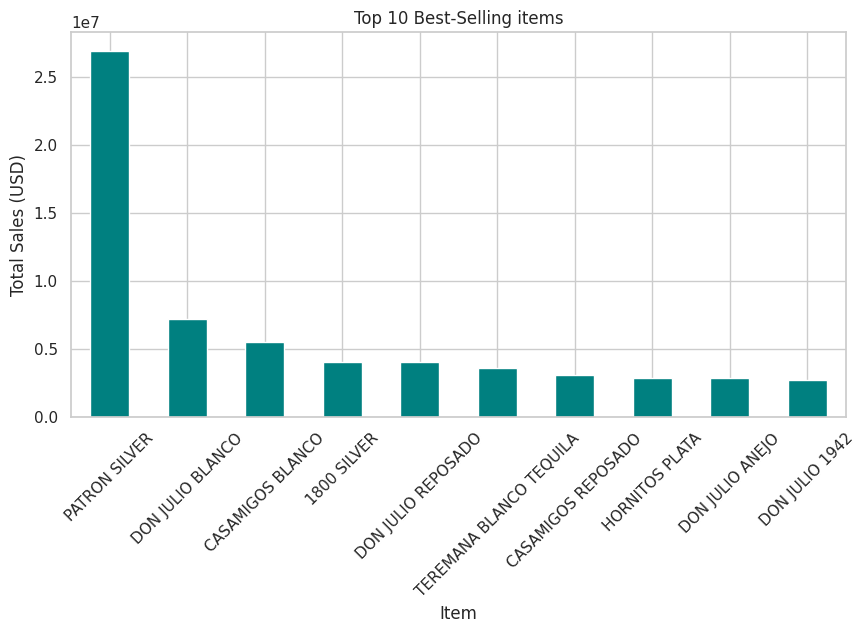

In [ ]:
# @title
# Find best-selling items
top_items = agave_df.groupby('item')['sale_usd'].sum().nlargest(10)

# Plot top vendors
plt.figure(figsize=(10, 5))
top_items.plot(kind='bar', color='teal', title='Top 10 Best-Selling items')
plt.xlabel('Item')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


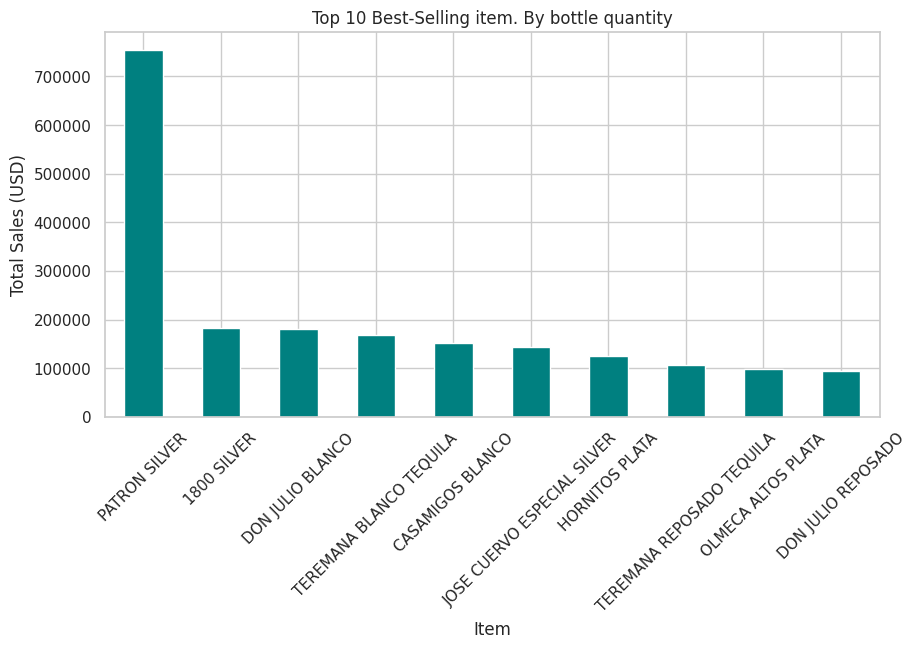

In [ ]:
# Find best-selling items BY ITEMS
top_items = agave_df.groupby('item')['bottles_sold'].sum().nlargest(10)

# Plot top vendors
plt.figure(figsize=(10, 5))
top_items.plot(kind='bar', color='teal', title='Top 10 Best-Selling item. By bottle quantity')
plt.xlabel('Item')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


####**Best selling vendors**

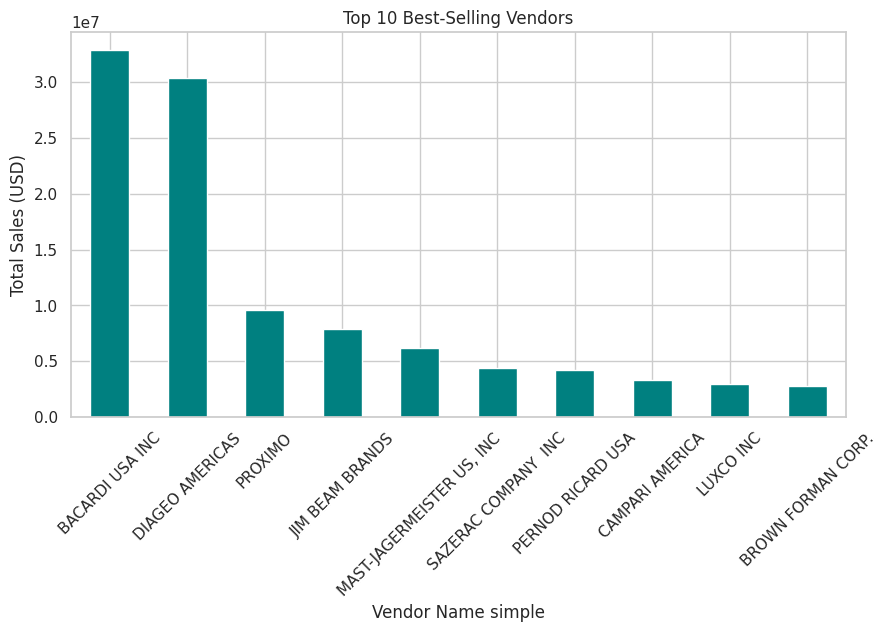

In [ ]:
# Find best-selling vendors
top_vendors = agave_df.groupby('Vendor Name simple')['sale_usd'].sum().nlargest(10)

# Plot top vendors
plt.figure(figsize=(10, 5))
top_vendors.plot(kind='bar', color='teal', title='Top 10 Best-Selling Vendors')
plt.xlabel('Vendor Name simple')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

####**Top Selling stores**



**ALL TEQUILA**

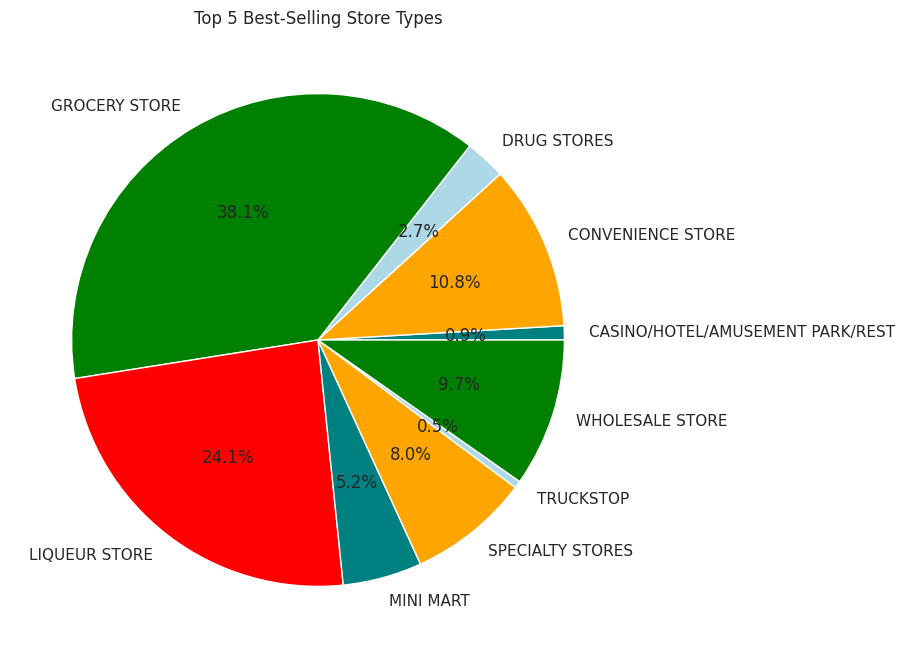

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores = tequila_df.groupby('store_type')['sale_usd'].sum()
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Types')
plt.show()

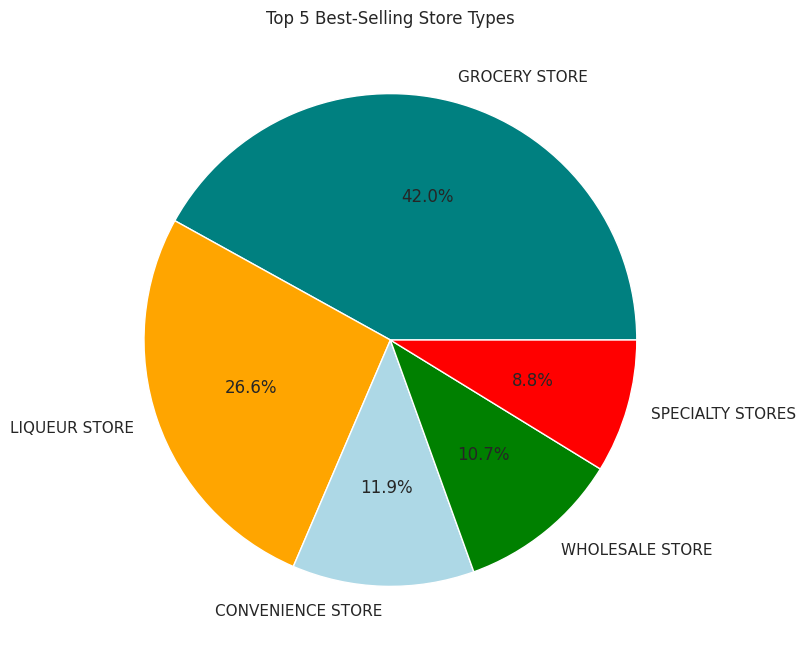

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores = tequila_df.groupby('store_type')['sale_usd'].sum().nlargest(5)
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Types')
plt.show()

**ONLY AGAVE**

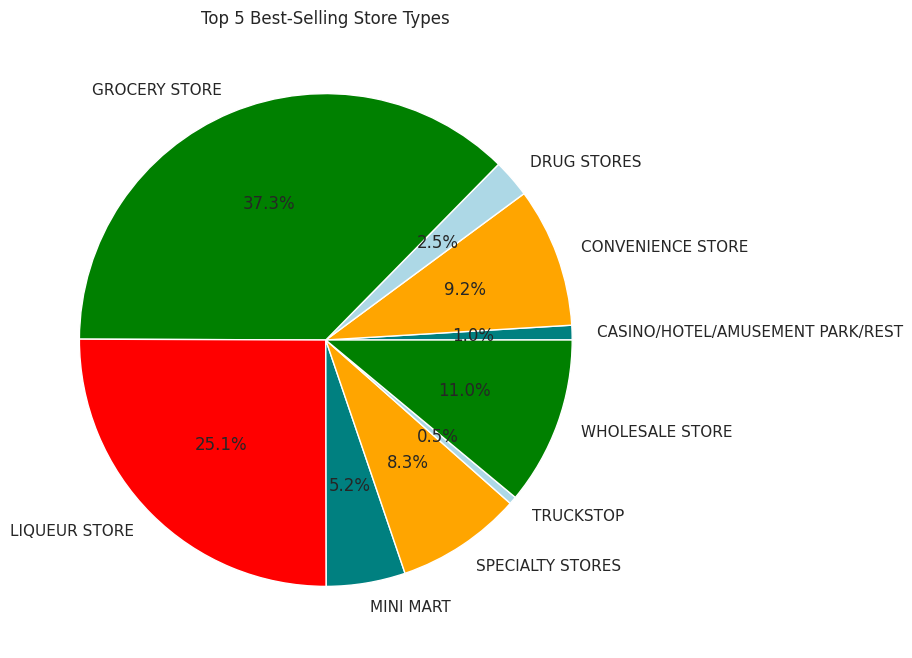

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores = agave_df.groupby('store_type')['sale_usd'].sum()
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Types')
plt.show()

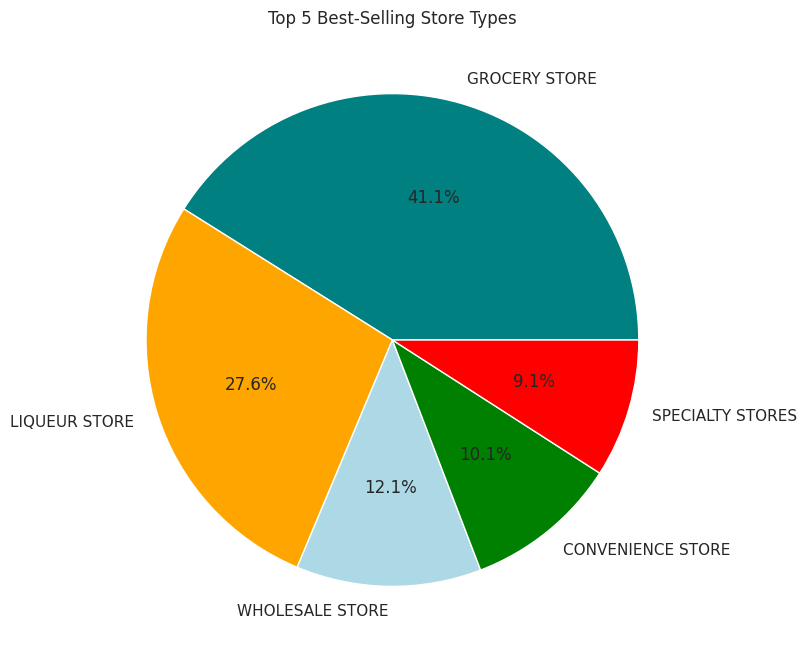

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores = agave_df.groupby('store_type')['sale_usd'].sum().nlargest(5)
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Types')
plt.show()

**ONLY BLANCO TEQUILA**

In [ ]:
blanco_df = agave_df[(agave_df["tequila_type"] == "BLANCO")].copy()

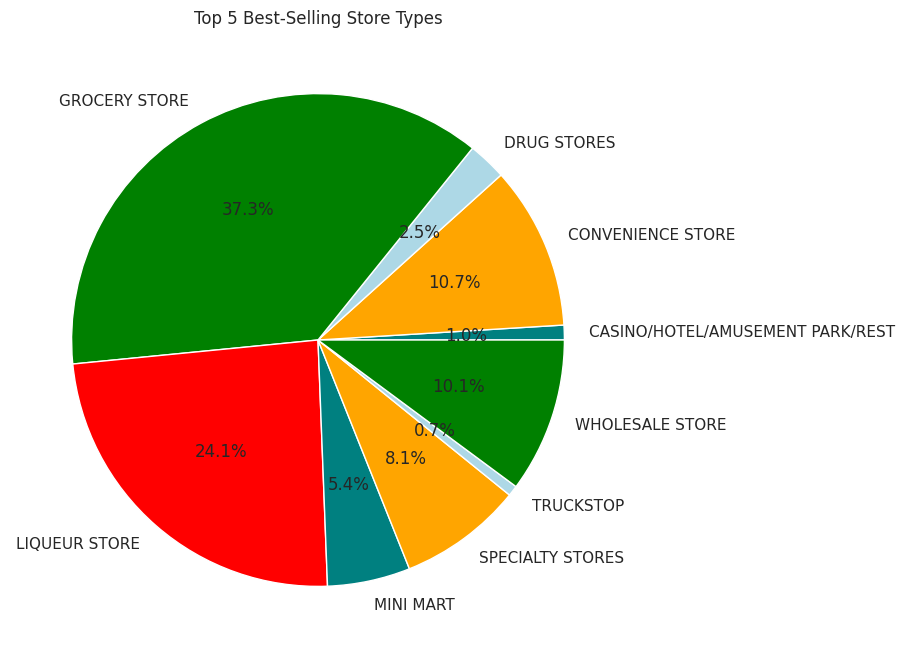

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores = blanco_df.groupby('store_type')['sale_usd'].sum()
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Types')
plt.show()

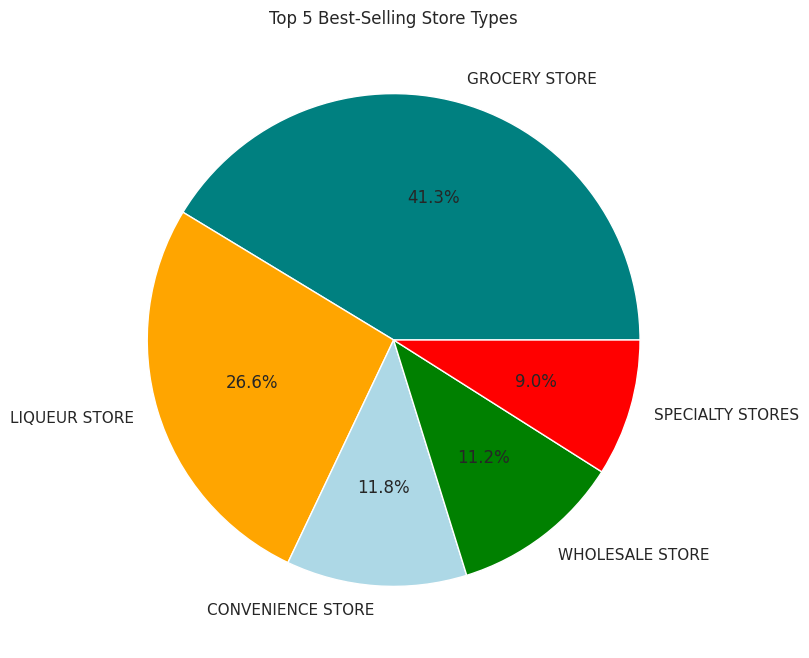

In [ ]:
# Group data and get top 5 store types by sales
top_type_stores = blanco_df.groupby('store_type')['sale_usd'].sum().nlargest(5)
# Plot as a pie chart
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 5 Best-Selling Store Types')
plt.show()

####**Top Selling Store Brands**

**ALL TEQUILA**

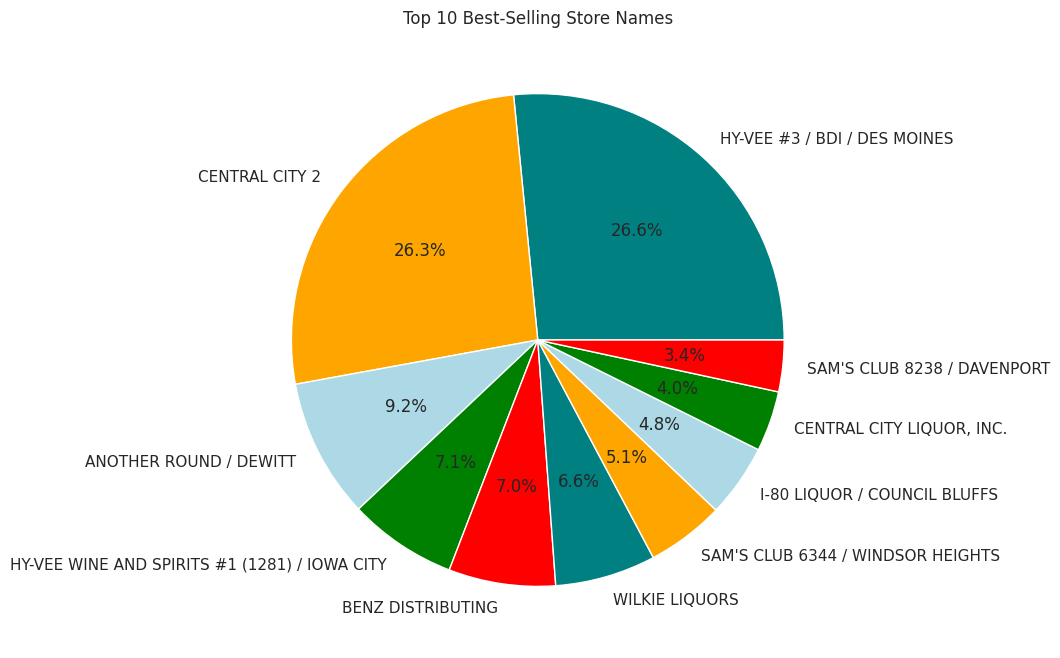

In [ ]:
# Group data and get top 10 store types by sales
top_type_stores = tequila_df.groupby('Standardized Store Name')['sale_usd'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 10 Best-Selling Store Names')
plt.show()

**AGAVE**

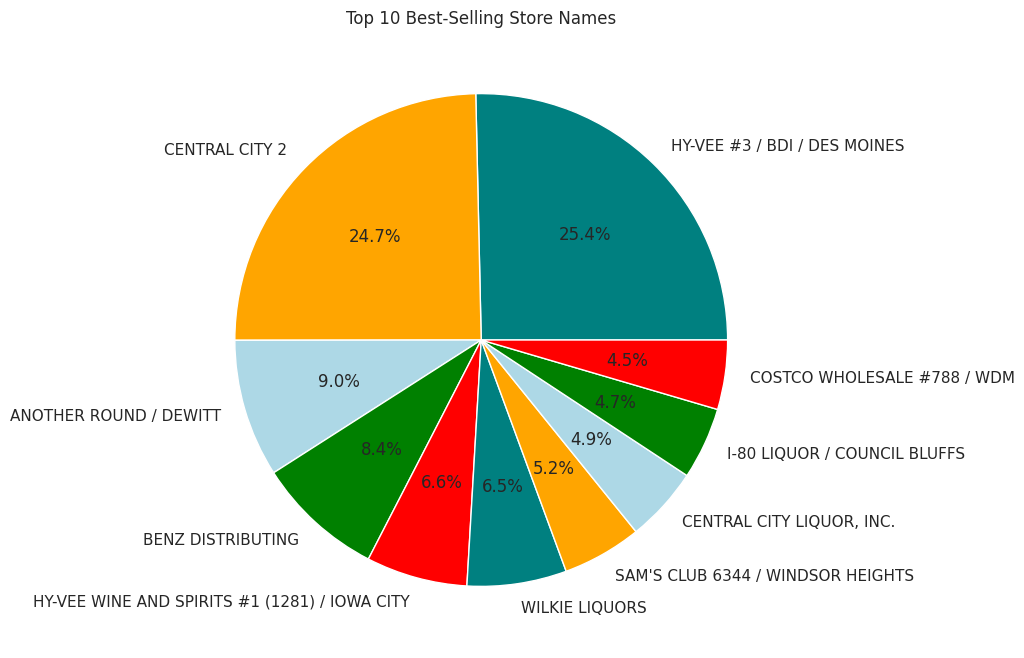

In [ ]:
# Group data and get top 10 store types by sales
top_type_stores = agave_df.groupby('Standardized Store Name')['sale_usd'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 10 Best-Selling Store Names')
plt.show()

**BLANCO**

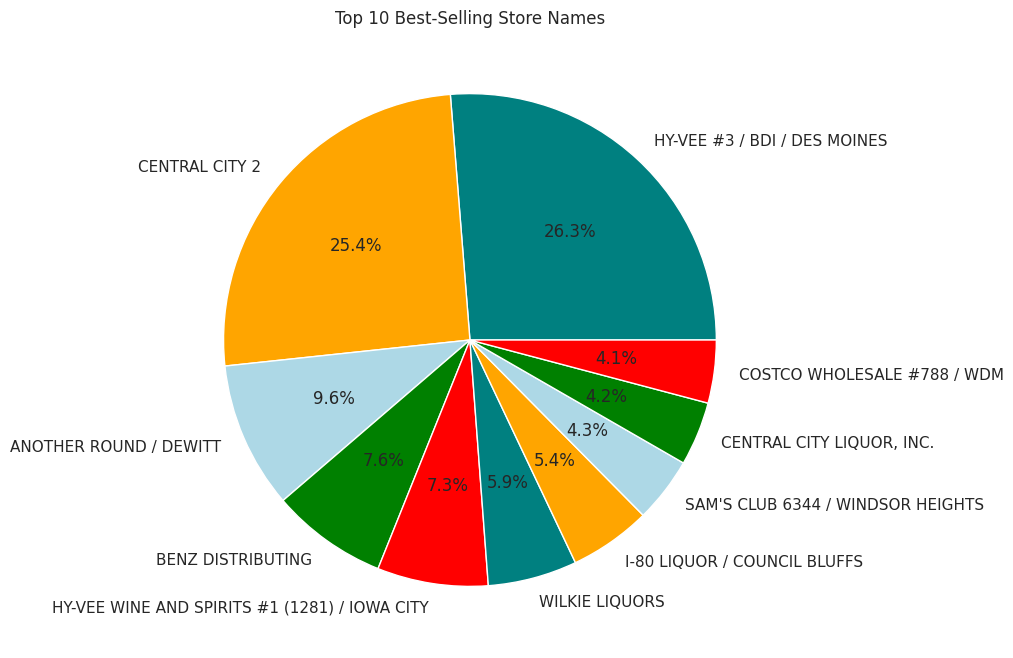

In [ ]:
# Group data and get top 10 store types by sales
top_type_stores = blanco_df.groupby('Standardized Store Name')['sale_usd'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
top_type_stores.plot(kind='pie', autopct='%1.1f%%', colors=['teal', 'orange', 'lightblue', 'green', 'red'])
plt.ylabel('')  # Remove y-label for better visualization
plt.title('Top 10 Best-Selling Store Names')
plt.show()

####**Top Selling Counties**

**ALL TEQUILA**

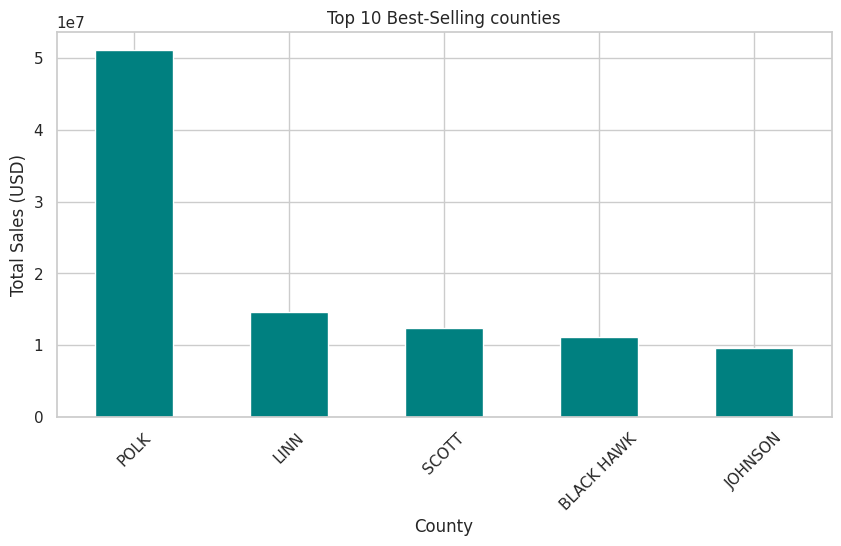

In [ ]:
# Group data and get top 5 counties by sales
top_counties = tequila_df.groupby('county')['sale_usd'].sum().nlargest(5)

# Plot top vendors
plt.figure(figsize=(10, 5))
top_counties.plot(kind='bar', color='teal', title='Top 10 Best-Selling counties')
plt.xlabel('County')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

**AGAVE**

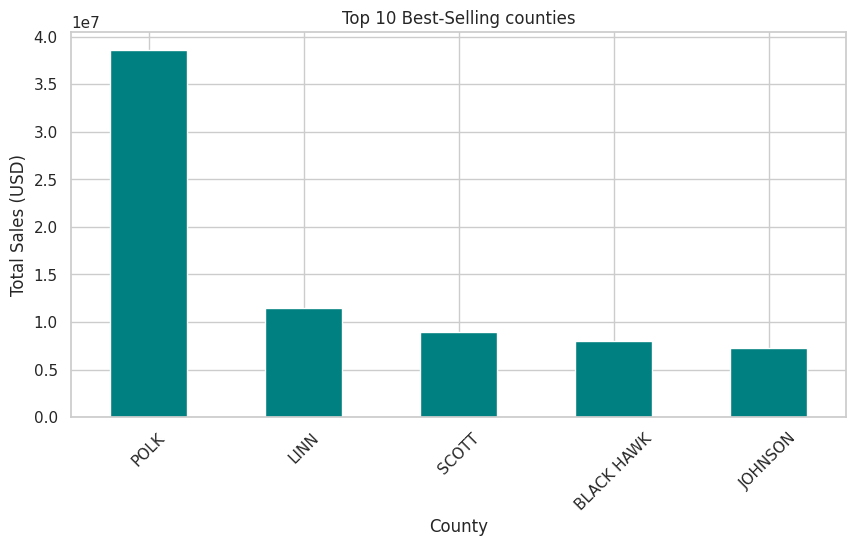

In [ ]:
# Group data and get top 5 counties by sales
top_counties = agave_df.groupby('county')['sale_usd'].sum().nlargest(5)

# Plot top vendors
plt.figure(figsize=(10, 5))
top_counties.plot(kind='bar', color='teal', title='Top 10 Best-Selling counties')
plt.xlabel('County')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

**BLANCO TEQUILA**

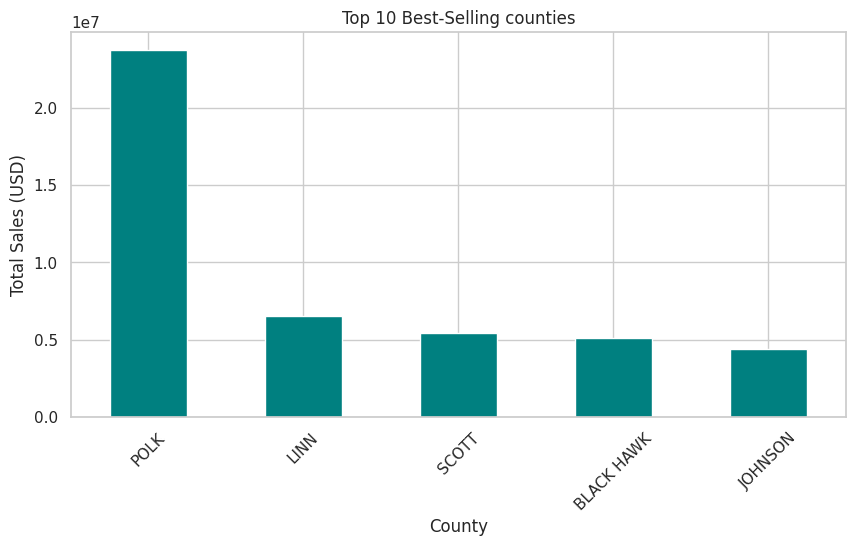

In [ ]:
# Group data and get top 5 counties by sales
top_counties = blanco_df.groupby('county')['sale_usd'].sum().nlargest(5)

# Plot top vendors
plt.figure(figsize=(10, 5))
top_counties.plot(kind='bar', color='teal', title='Top 10 Best-Selling counties')
plt.xlabel('County')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

###**PRICE ANALYSIS TEQUILA, 100% AGAVE & BLANCO**

---

Premium & Prestige > budget in liters showimg cunsomer behavior

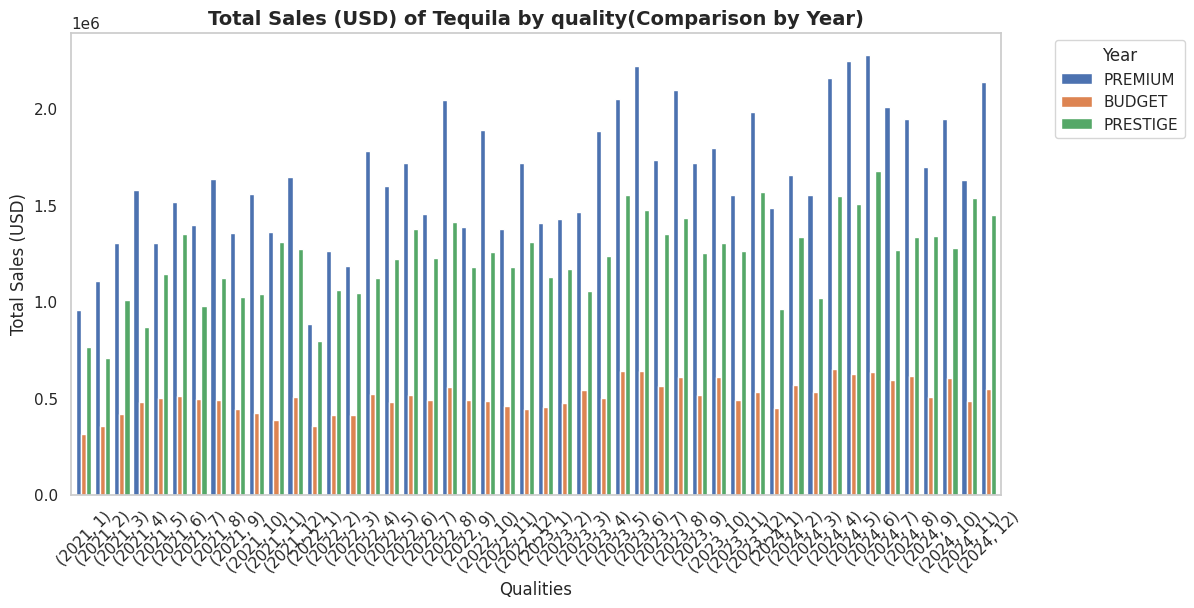

In [ ]:
# Group by year and day_of_week, then sum sales
tequila_sales_by_day = tequila_df.groupby(["year", "month","quality"])["sale_usd"].sum().unstack()

# Ensure day_of_week is in desired order
quality_order = ["PREMIUM","BUDGET","PRESTIGE"]
tequila_sales_by_day = tequila_sales_by_day[quality_order]  # Reorder columns

# Plot the grouped bar chart
tequila_sales_by_day.plot(kind="bar", figsize=(12, 6), width=0.8) # Remove 'order' argument

# Customize the plot
plt.title("Total Sales (USD) of Tequila by quality(Comparison by Year)", fontsize=14, fontweight="bold")
plt.xlabel("Qualities", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(False)

# Show the plot
plt.show()

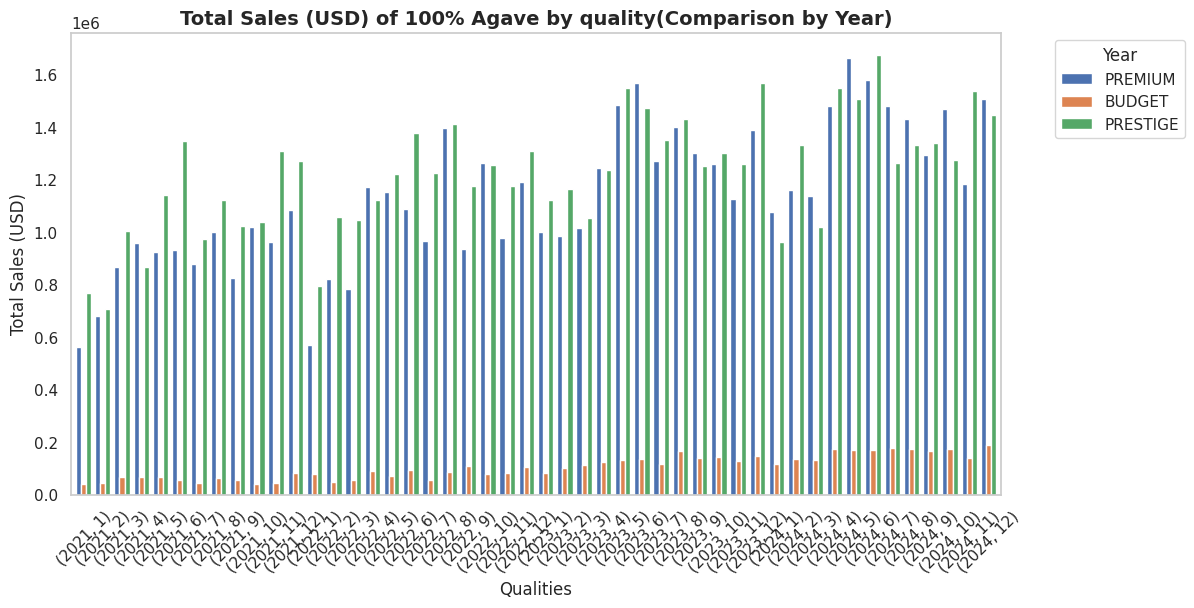

In [ ]:
# Group by year and day_of_week, then sum sales
agave_sales_by_day = agave_df.groupby(["year", "month","quality"])["sale_usd"].sum().unstack()

# Ensure day_of_week is in desired order
quality_order = ["PREMIUM","BUDGET","PRESTIGE"]
agave_sales_by_day = agave_sales_by_day[quality_order]  # Reorder columns

# Plot the grouped bar chart
agave_sales_by_day.plot(kind="bar", figsize=(12, 6), width=0.8) # Remove 'order' argument

# Customize the plot
plt.title("Total Sales (USD) of 100% Agave by quality(Comparison by Year)", fontsize=14, fontweight="bold")
plt.xlabel("Qualities", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(False)

# Show the plot
plt.show()

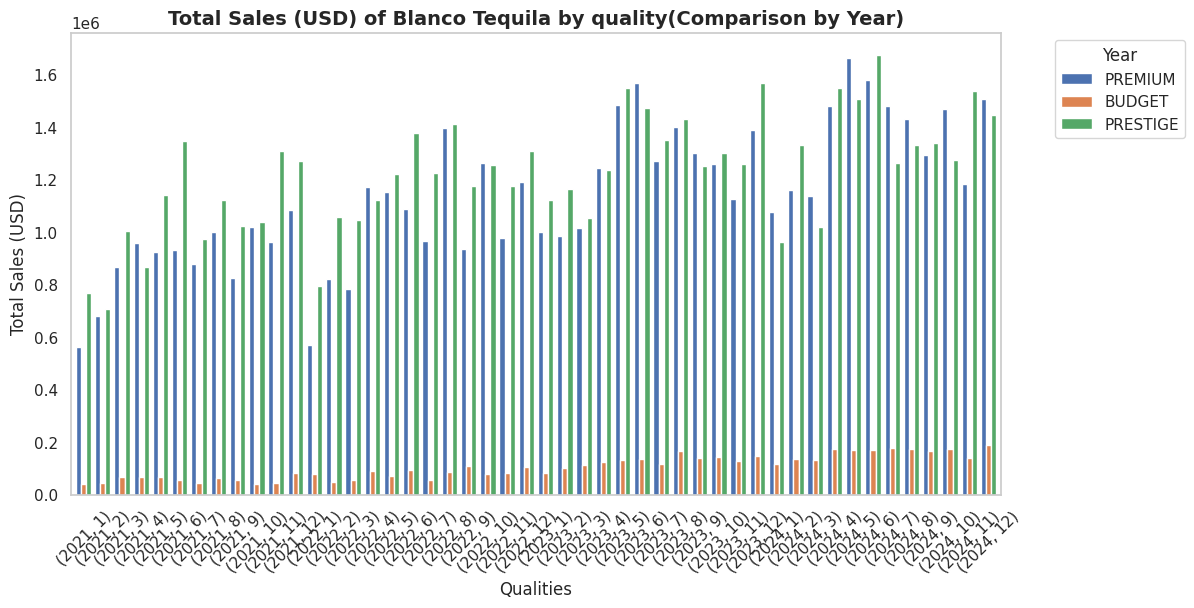

In [ ]:
# Group by year and day_of_week, then sum sales
blanco_sales_by_day = blanco_df.groupby(["year", "month","quality"])["sale_usd"].sum().unstack()

# Ensure day_of_week is in desired order
quality_order = ["PREMIUM","BUDGET","PRESTIGE"]
blanco_sales_by_day = blanco_sales_by_day[quality_order]  # Reorder columns

# Plot the grouped bar chart
agave_sales_by_day.plot(kind="bar", figsize=(12, 6), width=0.8) # Remove 'order' argument

# Customize the plot
plt.title("Total Sales (USD) of Blanco Tequila by quality(Comparison by Year)", fontsize=14, fontweight="bold")
plt.xlabel("Qualities", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(False)

# Show the plot
plt.show()

Comparing in **LITERS** to confirm same behaviour

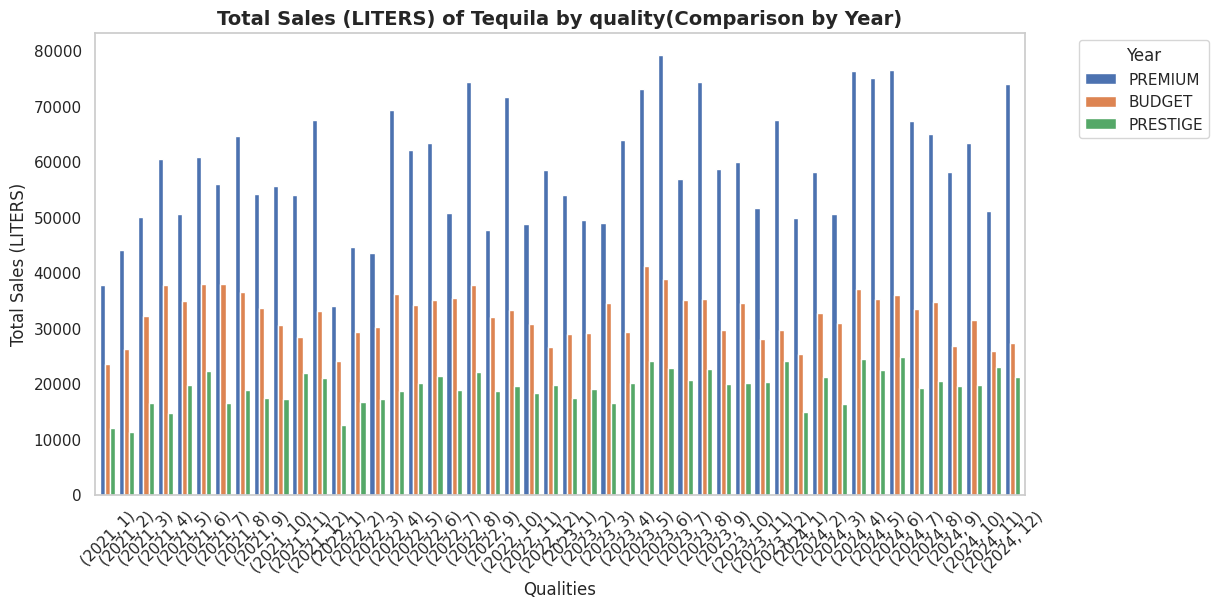

In [ ]:
# Group by year and day_of_week, then sum sales
tequila_sales_by_day = tequila_df.groupby(["year", "month","quality"])["sale_liters"].sum().unstack()

# Ensure day_of_week is in desired order
quality_order = ["PREMIUM","BUDGET","PRESTIGE"]
tequila_sales_by_day = tequila_sales_by_day[quality_order]  # Reorder columns

# Plot the grouped bar chart
tequila_sales_by_day.plot(kind="bar", figsize=(12, 6), width=0.8) # Remove 'order' argument

# Customize the plot
plt.title("Total Sales (LITERS) of Tequila by quality(Comparison by Year)", fontsize=14, fontweight="bold")
plt.xlabel("Qualities", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(False)

# Show the plot
plt.show()

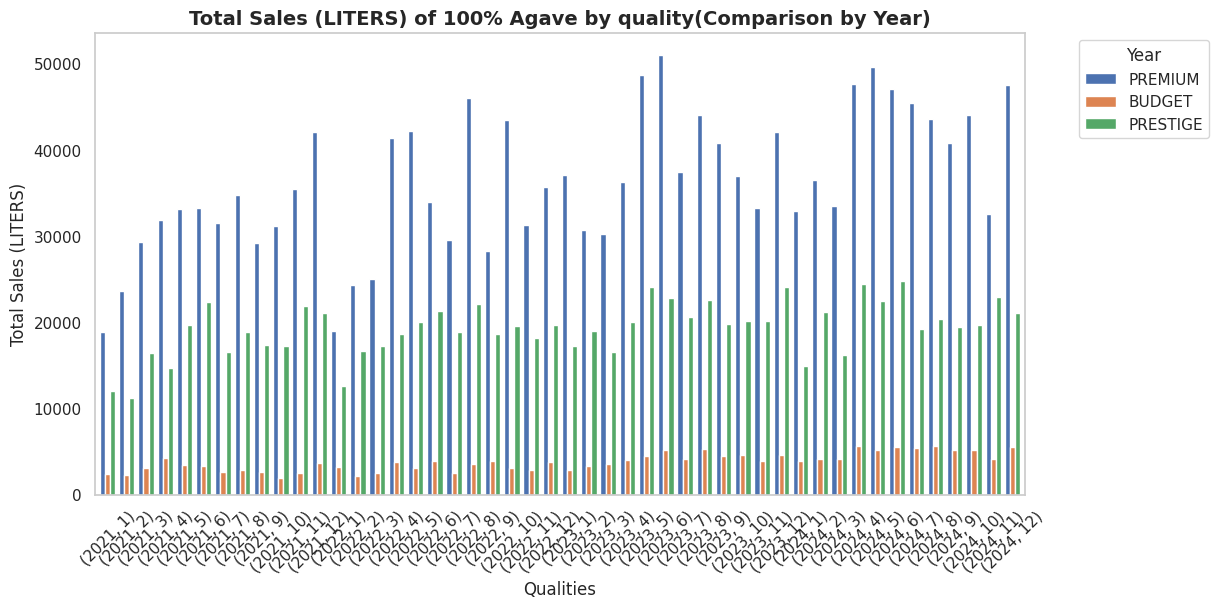

In [ ]:
# Group by year and day_of_week, then sum sales
agave_sales_by_day = agave_df.groupby(["year", "month","quality"])["sale_liters"].sum().unstack()

# Ensure day_of_week is in desired order
quality_order = ["PREMIUM","BUDGET","PRESTIGE"]
agave_sales_by_day = agave_sales_by_day[quality_order]  # Reorder columns

# Plot the grouped bar chart
agave_sales_by_day.plot(kind="bar", figsize=(12, 6), width=0.8) # Remove 'order' argument

# Customize the plot
plt.title("Total Sales (LITERS) of 100% Agave by quality(Comparison by Year)", fontsize=14, fontweight="bold")
plt.xlabel("Qualities", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(False)

# Show the plot
plt.show()

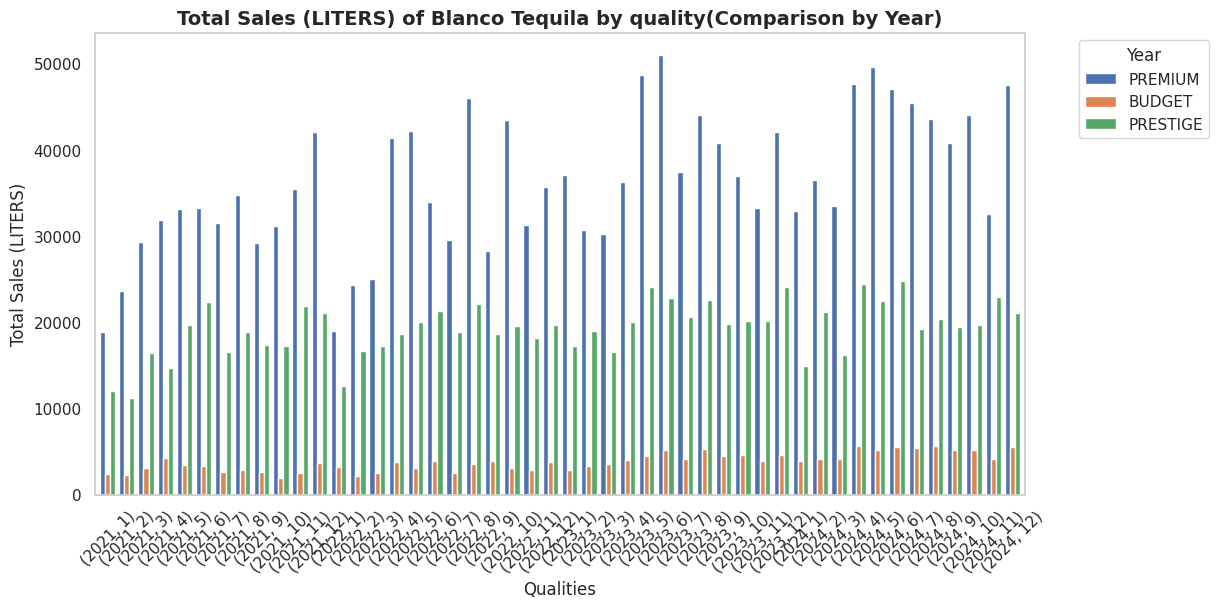

In [ ]:
# Group by year and day_of_week, then sum sales
blanco_sales_by_day = blanco_df.groupby(["year", "month","quality"])["sale_liters"].sum().unstack()

# Ensure day_of_week is in desired order
quality_order = ["PREMIUM","BUDGET","PRESTIGE"]
blanco_sales_by_day = blanco_sales_by_day[quality_order]  # Reorder columns

# Plot the grouped bar chart
agave_sales_by_day.plot(kind="bar", figsize=(12, 6), width=0.8) # Remove 'order' argument

# Customize the plot
plt.title("Total Sales (LITERS) of Blanco Tequila by quality(Comparison by Year)", fontsize=14, fontweight="bold")
plt.xlabel("Qualities", fontsize=12)
plt.ylabel("Total Sales (LITERS)", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.grid(False)

# Show the plot
plt.show()

###**QUANTITY PER BOTTLE ANALYSIS TEQUILA, 100% AGAVE & BLANCO**


Patron (most sold) has 3 diff presentations 350, 750, 1750; however, must sales come from 750 ml bottles.

In [ ]:
#Identifying Tequilas to Analyze
top_selling_tequilas = agave_df.groupby('item')['sale_usd'].sum().nlargest(10)
top_selling_tequilas

tequilas_towatch = top_selling_tequilas.index.tolist()
tequilas_towatch

['PATRON SILVER',
 'DON JULIO BLANCO',
 'CASAMIGOS BLANCO',
 '1800 SILVER',
 'DON JULIO REPOSADO',
 'TEREMANA BLANCO TEQUILA',
 'CASAMIGOS REPOSADO',
 'HORNITOS PLATA',
 'DON JULIO ANEJO',
 'DON JULIO 1942']

In [ ]:
top_selling_tequilas = agave_df[agave_df["item"].isin(tequilas_towatch)]
top_selling_tequilas

store_number                      store_name  \
Date                                                       
2021-01-04          2190       CENTRAL CITY LIQUOR, INC.   
2021-01-04          5600                 H & A MINI MART   
2021-01-04          4617                  LICKETY LIQUOR   
2021-01-04          4617                  LICKETY LIQUOR   
2021-01-04          2633    HY-VEE #3 / BDI / DES MOINES   
...                  ...                             ...   
2024-12-31          3932  MAIN STREET SPIRITS / MAPLETON   
2024-12-31          3932  MAIN STREET SPIRITS / MAPLETON   
2024-12-31          3756   MAIN STREET LIQUORS / MANNING   
2024-12-31          2593     HY-VEE FOOD STORE / CARROLL   
2024-12-31          5098           BEST FOOD MART 3  LLC   

                           address        city      zip   county  \
Date                                                               
2021-01-04            1460 2ND AVE  DES MOINES  50314.0     POLK   
2021-01-04      145 UNIVERSITY AVE  DES MOINES  50314.0     POLK   
2021-01-04        2501 HUBBELL AVE  DES MOINES  50317.0     POLK   
2021-01-04        2501 HUBBELL AVE  DES MOINES  50317.0     POLK   
2021-01-04         3221 SE 14TH ST  DES MOINES  50320.0     POLK   
...                            ...         ...      ...      ...   
2024-12-31             311 MAIN ST    MAPLETON  51034.0   MONONA   
2024-12-31             311 MAIN ST    MAPLETON  51034.0   MONONA   
2024-12-31             316 MAIN ST     MANNING  51455.0  CARROLL   
2024-12-31  905 US HIGHWAY 30 WEST     CARROLL  51401.0  CARROLL   
2024-12-31     1621 UNIVERSITY AVE  DES MOINES  50311.0     POLK   

                      category                vendor_name  \
Date                                                        
2021-01-04  100% AGAVE TEQUILA            JIM BEAM BRANDS   
2021-01-04  100% AGAVE TEQUILA            JIM BEAM BRANDS   
2021-01-04  100% AGAVE TEQUILA                    PROXIMO   
2021-01-04  100% AGAVE TEQUILA                    PROXIMO   
2021-01-04  100% AGAVE TEQUILA  MAST-JAGERMEISTER US, INC   
...                        ...                        ...   
2024-12-31  100% AGAVE TEQUILA            BACARDI USA INC   
2024-12-31  100% AGAVE TEQUILA            BACARDI USA INC   
2024-12-31  100% AGAVE TEQUILA                    PROXIMO   
2024-12-31  100% AGAVE TEQUILA            DIAGEO AMERICAS   
2024-12-31  100% AGAVE TEQUILA            DIAGEO AMERICAS   

                               item  pack  ...   quality         store_type  \
Date                                       ...                                
2021-01-04           HORNITOS PLATA    12  ...   PREMIUM      LIQUEUR STORE   
2021-01-04           HORNITOS PLATA    12  ...   PREMIUM          MINI MART   
2021-01-04              1800 SILVER    12  ...   PREMIUM      LIQUEUR STORE   
2021-01-04              1800 SILVER    12  ...    BUDGET      LIQUEUR STORE   
2021-01-04  TEREMANA BLANCO TEQUILA     6  ...   PREMIUM      GROCERY STORE   
...                             ...   ...  ...       ...                ...   
2024-12-31            PATRON SILVER    12  ...   PREMIUM   SPECIALTY STORES   
2024-12-31            PATRON SILVER     3  ...  PRESTIGE   SPECIALTY STORES   
2024-12-31              1800 SILVER    12  ...   PREMIUM      LIQUEUR STORE   
2024-12-31         DON JULIO BLANCO     6  ...  PRESTIGE      GROCERY STORE   
2024-12-31       DON JULIO REPOSADO     6  ...  PRESTIGE  CONVENIENCE STORE   

            store_status        Lat        Lon         Vendor Name simple  \
Date                                                                        
2021-01-04             A -93.619787  41.605660            JIM BEAM BRANDS   
2021-01-04             A -93.619470  41.600419            JIM BEAM BRANDS   
2021-01-04             A -93.570489  41.607817                    PROXIMO   
2021-01-04             A -93.570489  41.607817                    PROXIMO   
2021-01-04             A -93.596754  41.554101  MAST-JAGERMEIS

####Quantity & price distribution

In [ ]:
top_selling_tequilas.pack.value_counts()

pack
12    101980
6      79067
3       3791
4        251
Name: count, dtype: int64

In [ ]:
top_selling_tequilas.bottle_ml.value_counts()

bottle_ml
750     125239
375      45131
1000      6095
1750      5460
200       3164
Name: count, dtype: int64

In [ ]:
top_selling_tequilas.quality.value_counts()

quality
PRESTIGE    88157
PREMIUM     84210
BUDGET      12722
Name: count, dtype: int64

In [ ]:
#Checking number of bottles sold by quality type
top_selling_tequilas.groupby("quality")["bottles_sold"].sum().sort_values()

quality
BUDGET      132797
PREMIUM     715816
PRESTIGE    958974
Name: bottles_sold, dtype: int64

In [ ]:
top_selling_tequilas.columns

Index(['store_number', 'store_name', 'address', 'city', 'zip', 'county',
       'category', 'vendor_name', 'item', 'pack', 'bottle_ml', 'cost',
       'retail', 'bottles_sold', 'sale_usd', 'sale_liters', 'month', 'year',
       'week', 'day_of_week', 'season', 'Standardized Store Name',
       'invoice_number', 'inv_item_number', 'alcohol_type', 'quality',
       'store_type', 'store_status', 'Lat', 'Lon', 'Vendor Name simple',
       'Store Name simple', 'nationality', 'price_per_ml', 'tequila_type'],
      dtype='object')

In [ ]:
#Checking number of bottles sold by mililiters
top_selling_tequilas.groupby("bottle_ml")["bottles_sold"].sum().sort_values()

bottle_ml
1750      30312
200       36714
1000      62661
375      433515
750     1244385
Name: bottles_sold, dtype: int64

In [ ]:
#Checking number of bottles sold by package type
top_selling_tequilas.groupby("pack")["bottles_sold"].sum().sort_values()

pack
4         472
3       10958
6      627523
12    1168634
Name: bottles_sold, dtype: int64

In [ ]:
tequila_df.head()

store_number                 store_name       address        city  \
Date                                                                            
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   
2021-01-04          2190  CENTRAL CITY LIQUOR, INC.  1460 2ND AVE  DES MOINES   

                zip county            category               vendor_name  \
Date                                                                       
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA  MCCORMICK DISTILLING CO.   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA         PERNOD RICARD USA   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA            GEMINI SPIRITS   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA           JIM BEAM BRANDS   
2021-01-04  50314.0   POLK  100% AGAVE TEQUILA           JIM BEAM BRANDS   

                                   item  pack  ...  quality     store_type  \
Date                                           ...                           
2021-01-04      HUSSONGS PLATINUM ANEJO     6  ...  PREMIUM  LIQUEUR STORE   
2021-01-04           OLMECA ALTOS PLATA     6  ...  PREMIUM  LIQUEUR STORE   
2021-01-04  MARGARITAVILLE GOLD TEQUILA    12  ...   BUDGET  LIQUEUR STORE   
2021-01-04           HORNITOS LIME SHOT    12  ...  PREMIUM  LIQUEUR STORE   
2021-01-04               HORNITOS PLATA    12  ...  PREMIUM  LIQUEUR STORE   

            store_status        Lat       Lon        Vendor Name simple  \
Date                                                                      
2021-01-04             A -93.619787  41.60566  MCCORMICK DISTILLING CO.   
2021-01-04             A -93.619787  41.60566         PERNOD RICARD USA   
2021-01-04             A -93.619787  41.60566            GEMINI SPIRITS   
2021-01-04             A -93.619787  41.60566           JIM BEAM BRANDS   
2021-01-04             A -93.619787  41.60566           JIM BEAM BRANDS   

                    Store Name simple  nationality  price_per_ml  tequila_type  
Date                                                                            
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.052000         ANEJO  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.021411        BLANCO  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.011160  DORADO/JOVEN  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.027000      FLAVORED  
2021-01-04  CENTRAL CITY LIQUOR, INC.     Imported      0.027000        BLANCO  

[5 rows x 35 columns]

In [ ]:
sales_2024 = tequila_df[tequila_df["year"] == 2024]
sales_2024

store_number                          store_name  \
Date                                                           
2024-01-01          2683           HY-VEE FAST & FRESH / WDM   
2024-01-01          2191                      KEOKUK SPIRITS   
2024-01-02          6245  NEIGHBORHOOD LIQUOR HOUSE / ANKENY   
2024-01-02          6245  NEIGHBORHOOD LIQUOR HOUSE / ANKENY   
2024-01-02          6245  NEIGHBORHOOD LIQUOR HOUSE / ANKENY   
...                  ...                                 ...   
2024-12-31          5343               FROHLICH'S SUPER VALU   
2024-12-31          2633        HY-VEE #3 / BDI / DES MOINES   
2024-12-31          6256          821 SQ LIQUOR / DES MOINES   
2024-12-31          6256          821 SQ LIQUOR / DES MOINES   
2024-12-31          5098               BEST FOOD MART 3  LLC   

                                   address             city      zip   county  \
Date                                                                            
2024-01-01         425 S JORDAN CREEK PKWY  WEST DES MOINES  50266.0     POLK   
2024-01-01                       1013 MAIN           KEOKUK  52632.0      LEE   
2024-01-02  833 EAST 1ST STREET, SUITE 102           ANKENY  50021.0     POLK   
2024-01-02  833 EAST 1ST STREET, SUITE 102           ANKENY  50021.0     POLK   
2024-01-02  833 EAST 1ST STREET, SUITE 102           ANKENY  50021.0     POLK   
...                                    ...              ...      ...      ...   
2024-12-31                    403 MAIN ST.      COON RAPIDS  50058.0  CARROLL   
2024-12-31                 3221 SE 14TH ST       DES MOINES  50320.0     POLK   
2024-12-31          821 EAST EUCLID AVENUE       DES MOINES  50316.0     POLK   
2024-12-31          821 EAST EUCLID AVENUE       DES MOINES  50316.0     POLK   
2024-12-31             1621 UNIVERSITY AVE       DES MOINES  50311.0     POLK   

                      category           vendor_name  \
Date                                                   
2024-01-01       MIXTO TEQUILA               PROXIMO   
2024-01-01  100% AGAVE TEQUILA    HEAVEN HILL BRANDS   
2024-01-02  100% AGAVE TEQUILA               MHW LTD   
2024-01-02  100% AGAVE TEQUILA               MHW LTD   
2024-01-02  100% AGAVE TEQUILA       DIAGEO AMERICAS   
...                        ...                   ...   
2024-12-31       MIXTO TEQUILA       JIM BEAM BRANDS   
2024-12-31       MIXTO TEQUILA  SAZERAC COMPANY  INC   
2024-12-31  100% AGAVE TEQUILA    BROWN FORMAN CORP.   
2024-12-31  100% AGAVE TEQUILA    BROWN FORMAN CORP.   
2024-12-31  100% AGAVE TEQUILA       DIAGEO AMERICAS   

                                          item  pack  ...   quality  \
Date                                                  ...             
2024-01-01  JOSE CUERVO ESPECIAL REPOSADO MINI    12  ...   PREMIUM   
2024-01-01                    LUNAZUL REPOSADO     6  ...   PREMIUM   
2024-01-02                818 REPOSADO TEQUILA     6  ...   PREMIUM   
2024-01-02                  818 BLANCO TEQUILA     6  ...   PREMIUM   
2024-01-02                    CASAMIGOS BLANCO     6  ...  PRESTIGE   
...                                        ...   ...  ...       ...   
2024-12-31                          SAUZA GOLD    12  ...   PREMIUM   
2024-12-31                      TORTILLA WHITE    12  ...    BUDGET   
2024-12-31               HERRADURA ULTRA ANEJO     6  ...  PRESTIGE   
2024-12-31               HERRADURA ULTRA ANEJO     6  ...  PRESTIGE   
2024-12-31                  DON JULIO REPOSADO     6  ...  PRESTIGE   

                   store_type  store_status        Lat        Lon  \
Date                                                                
2024-01-01  CONVENIENCE STORE             A -93.810555  41.563475   
2024-01-01   SPECIALTY STORES             A -91.387520  40.400196   
2024-01-02      LIQUEUR STORE             A -93.585429  41.731341   
2024-01-02      LIQUEUR STORE             A -93.585429  41.731341   
2024-01-02      LIQUEUR STORE             A -93.585429  41

In [ ]:
sales_2024[sales_2024["category"] == "100% AGAVE TEQUILA"]["sale_usd"].sum()

34602984.669999994

In [ ]:
sales_2024[sales_2024["tequila_type"] == "BLANCO"]["sale_usd"].sum()

24089485.25

In [ ]:
df_2021[(df_2021["category"] == "AMERICAN VODKAS") & (df_2021["year"] == 2024)]["sale_usd"].sum()

67059167.109999985

##**VODKA - - time series**


In [ ]:
vodka_df = df_2021[df_2021["alcohol_type"] == "VODKA"].copy()

<ipython-input-213-befe7a1febaa>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vodkadf_monthly_sales = vodka_df.resample('M')['sale_usd'].sum()


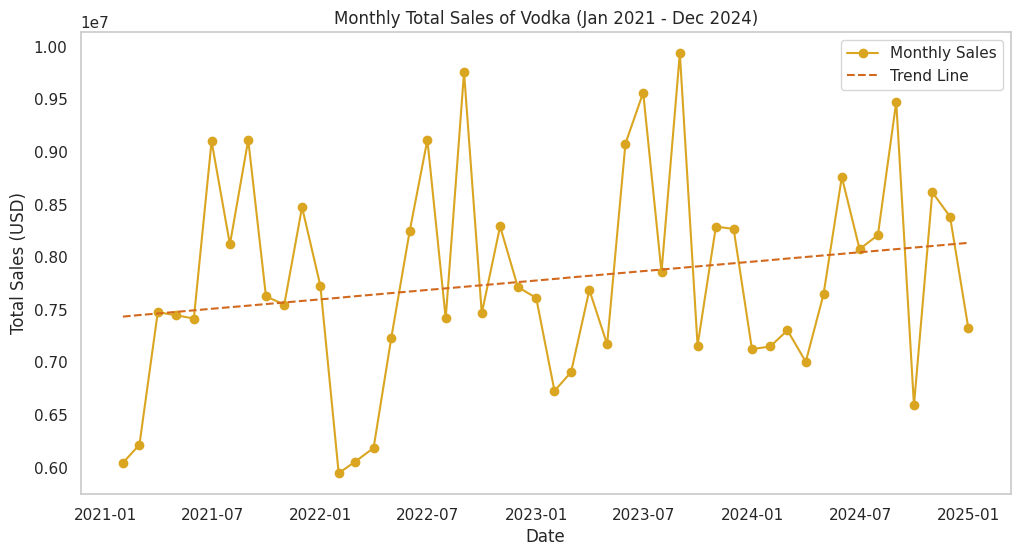

In [ ]:
# Resample by month and sum total sales
vodkadf_monthly_sales = vodka_df.resample('M')['sale_usd'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(vodkadf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, vodkadf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(vodkadf_monthly_sales.index, vodkadf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color="goldenrod")
plt.plot(vodkadf_monthly_sales.index, trend_line, linestyle='--', color='chocolate', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Total Sales of Vodka (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

<ipython-input-131-bea70f1b4276>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vodkadf_monthly_sales = vodka_df.resample('M')['sale_liters'].sum()


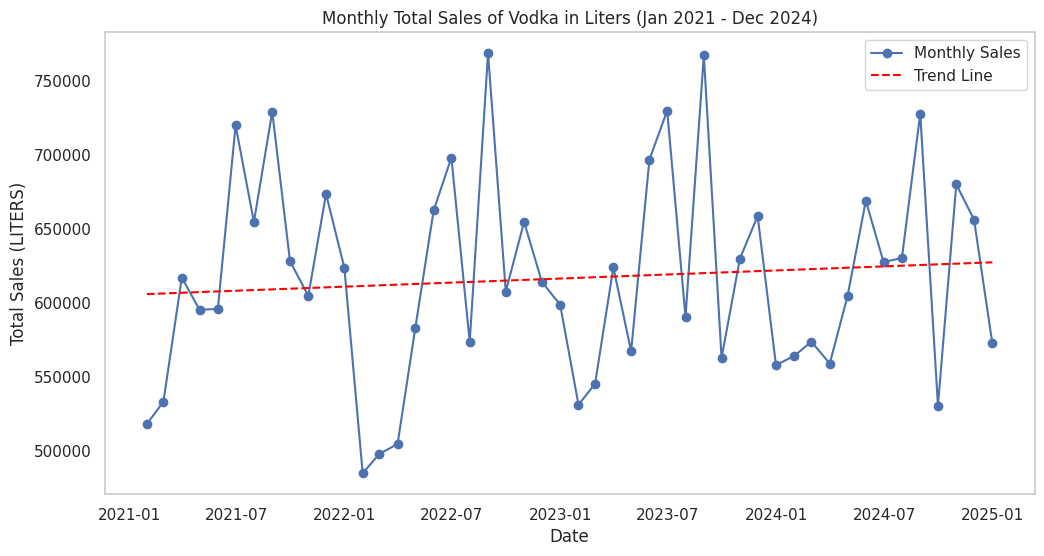

In [ ]:
# Resample by month and sum total sales
vodkadf_monthly_sales = vodka_df.resample('M')['sale_liters'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(vodkadf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, vodkadf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(vodkadf_monthly_sales.index, vodkadf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales')
plt.plot(vodkadf_monthly_sales.index, trend_line, linestyle='--', color='red', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (LITERS)')
plt.title('Monthly Total Sales of Vodka in Liters (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

AMERICAN VODKAS

In [ ]:
american_vodkas_df = vodka_df[vodka_df["category"] == "AMERICAN VODKAS"].copy()

<ipython-input-216-4c27481a8aff>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  american_vodkadf_monthly_sales = american_vodkas_df.resample('M')['sale_usd'].sum()


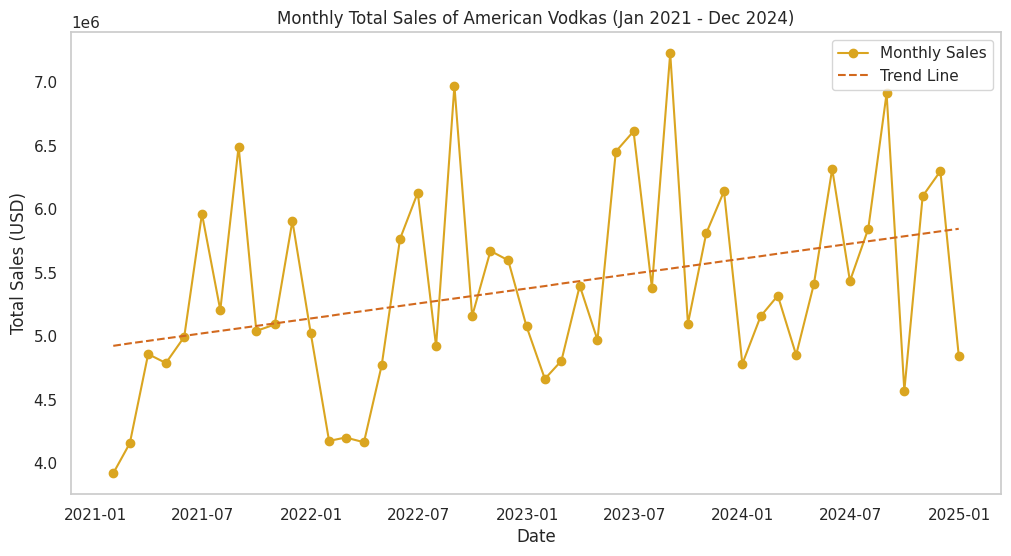

In [ ]:
# Resample by month and sum total sales
american_vodkadf_monthly_sales = american_vodkas_df.resample('M')['sale_usd'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(american_vodkadf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, american_vodkadf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(american_vodkadf_monthly_sales.index, american_vodkadf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color="goldenrod")
plt.plot(american_vodkadf_monthly_sales.index, trend_line, linestyle='--', color='chocolate', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Total Sales of American Vodkas (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

<ipython-input-134-0e9aa76e4c0a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  american_vodkadf_monthly_sales = american_vodkas_df.resample('M')['sale_liters'].sum()


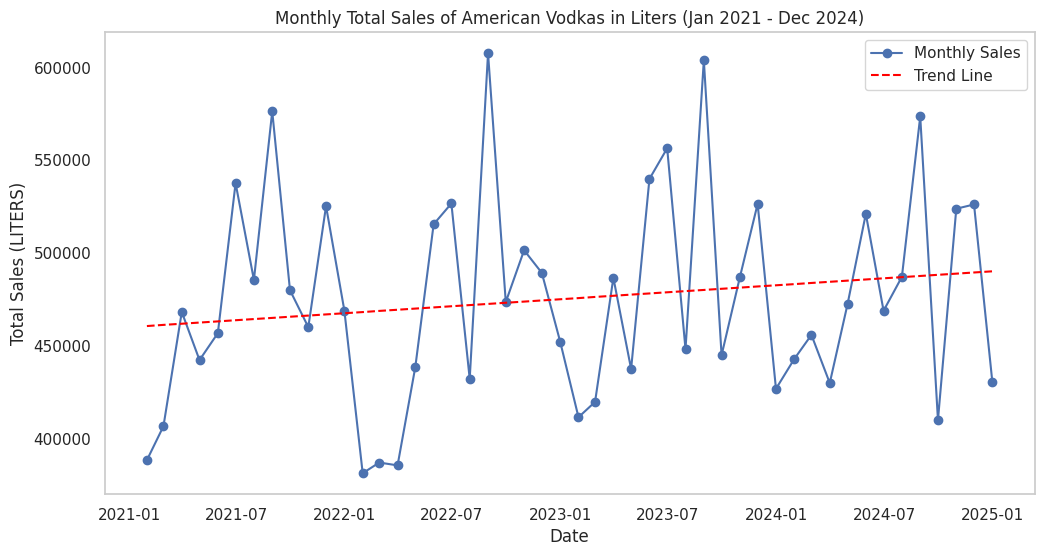

In [ ]:
# Resample by month and sum total sales
american_vodkadf_monthly_sales = american_vodkas_df.resample('M')['sale_liters'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(american_vodkadf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, american_vodkadf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(american_vodkadf_monthly_sales.index, american_vodkadf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales')
plt.plot(american_vodkadf_monthly_sales.index, trend_line, linestyle='--', color='red', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (LITERS)')
plt.title('Monthly Total Sales of American Vodkas in Liters (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

##**WHISKEY - - time series**


In [ ]:
whiskey_df = df_2021[df_2021["alcohol_type"] == "WHISKEY"].copy()

<ipython-input-214-9c4d08a9582a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  whiskeydf_monthly_sales = whiskey_df.resample('M')['sale_usd'].sum()


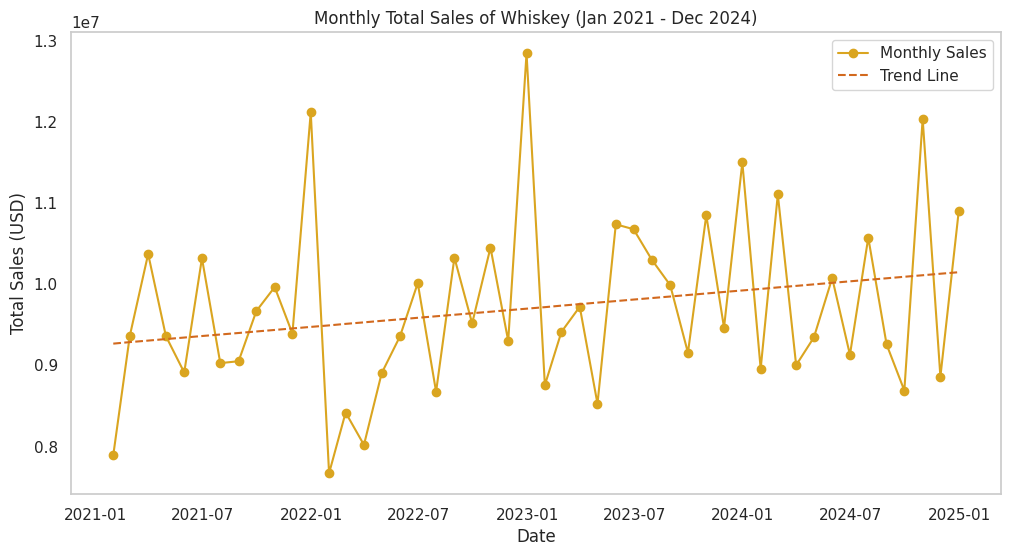

In [ ]:
# Resample by month and sum total sales
whiskeydf_monthly_sales = whiskey_df.resample('M')['sale_usd'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(whiskeydf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, whiskeydf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(whiskeydf_monthly_sales.index, whiskeydf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color="goldenrod")
plt.plot(whiskeydf_monthly_sales.index, trend_line, linestyle='--', color='chocolate', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Total Sales of Whiskey (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

<ipython-input-215-9884034e408b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  whiskeydf_monthly_sales = whiskey_df.resample('M')['sale_liters'].sum()


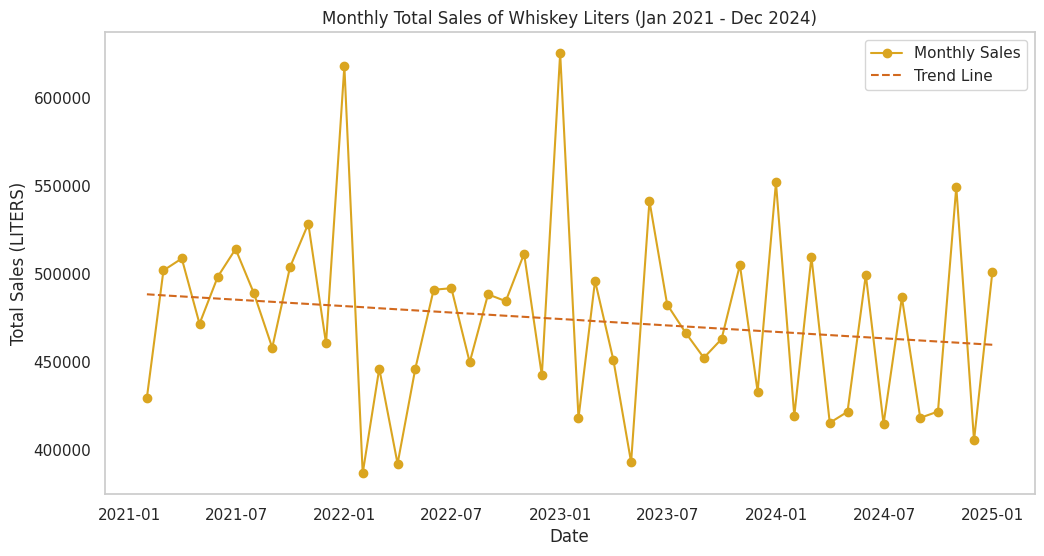

In [ ]:
# Resample by month and sum total sales
whiskeydf_monthly_sales = whiskey_df.resample('M')['sale_liters'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(whiskeydf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, whiskeydf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(whiskeydf_monthly_sales.index, whiskeydf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color="goldenrod")
plt.plot(whiskeydf_monthly_sales.index, trend_line, linestyle='--', color='chocolate', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (LITERS)')
plt.title('Monthly Total Sales of Whiskey Liters (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

CANADIAN WHISKIES

In [ ]:
canadian_whiskeys_df = whiskey_df[whiskey_df["category"] == "CANADIAN WHISKIES"].copy()

<ipython-input-139-063d59487cee>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  canadian_whiskeydf_monthly_sales = canadian_whiskeys_df.resample('M')['sale_usd'].sum()


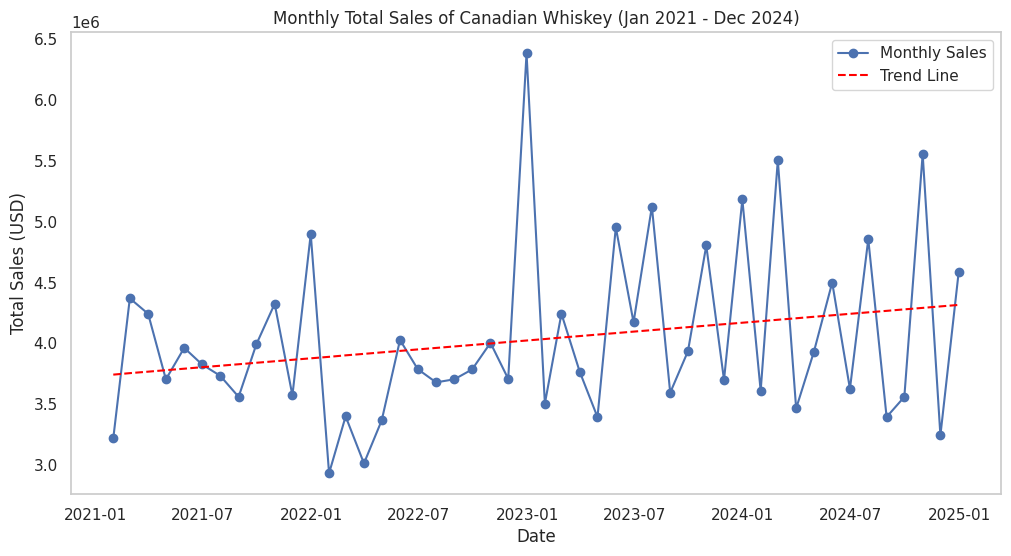

In [ ]:
# Resample by month and sum total sales
canadian_whiskeydf_monthly_sales = canadian_whiskeys_df.resample('M')['sale_usd'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(canadian_whiskeydf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, canadian_whiskeydf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(canadian_whiskeydf_monthly_sales.index, canadian_whiskeydf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales')
plt.plot(canadian_whiskeydf_monthly_sales.index, trend_line, linestyle='--', color='red', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.title('Monthly Total Sales of Canadian Whiskey (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

<ipython-input-140-5b4ea6c69b8e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  canadian_whiskeydf_monthly_sales = canadian_whiskeys_df.resample('M')['sale_liters'].sum()


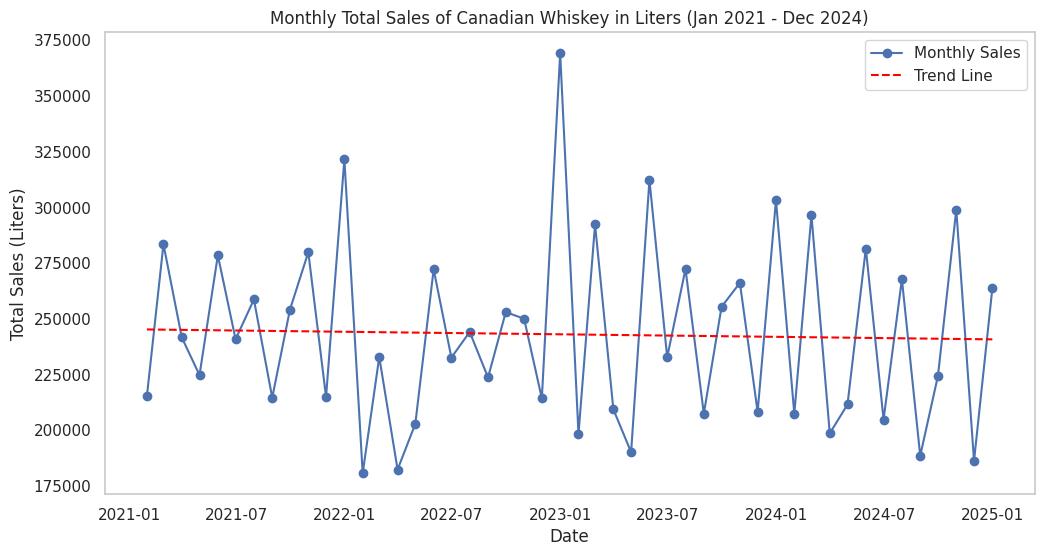

In [ ]:
# Resample by month and sum total sales
canadian_whiskeydf_monthly_sales = canadian_whiskeys_df.resample('M')['sale_liters'].sum()

# Create time variable for trend line
time_numeric = np.arange(len(canadian_whiskeydf_monthly_sales))

# Fit a linear trend line
trend_coeffs = np.polyfit(time_numeric, canadian_whiskeydf_monthly_sales.values, 1)
trend_line = np.polyval(trend_coeffs, time_numeric)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(canadian_whiskeydf_monthly_sales.index, canadian_whiskeydf_monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales')
plt.plot(canadian_whiskeydf_monthly_sales.index, trend_line, linestyle='--', color='red', label='Trend Line')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Total Sales (Liters)')
plt.title('Monthly Total Sales of Canadian Whiskey in Liters (Jan 2021 - Dec 2024)')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

##**PER CAPITA**

In [ ]:
counties_pop = pd.read_csv("/content/drive/MyDrive/IOWA/County_Population_in_Iowa20250213.csv")

In [ ]:
counties_pop.head()

FIPS            County          Year  Population  \
0  19169      Story County  July 01 2011       91136   
1  19065    Fayette County  July 01 1995       22129   
2  19089     Howard County  July 01 2002        9794   
3  19007  Appanoose County  July 01 1999       13761   
4  19043    Clayton County  July 01 2012       17946   

                    Primary Point  
0  POINT (-93.4650448 42.0362415)  
1  POINT (-91.8443207 42.8625919)  
2  POINT (-92.3171989 43.3567673)  
3  POINT (-92.8686104 40.7431635)  
4  POINT (-91.3414328 42.8447493)

In [ ]:
counties_pop = counties_pop.groupby("County")["Population"].sum().reset_index()

In [ ]:
counties_pop.head()

County  Population
0      Adair County      264452
1      Adams County      141207
2  Allamakee County      482535
3  Appanoose County      444879
4    Audubon County      214229

In [ ]:
counties_pop["County"] = counties_pop["County"].str.split().str[0]

In [ ]:
counties_pop["County"] = counties_pop["County"].str.upper()

In [ ]:
counties_pop.head()

County  Population
0      ADAIR      264452
1      ADAMS      141207
2  ALLAMAKEE      482535
3  APPANOOSE      444879
4    AUDUBON      214229

In [ ]:
sale_usd_by_county = df_2021.groupby("county")["sale_liters"].sum().reset_index()

In [ ]:
# Merge the two DataFrames on the "County" column
merged_df = counties_pop.merge(sale_usd_by_county, left_on="County", right_on="county")

# Drop the duplicate "county" column after merging
merged_df.drop(columns=["county"], inplace=True)
merged_df

County  Population  sale_liters
0        ADAIR      264452    117538.32
1        ADAMS      141207     56513.71
2    ALLAMAKEE      482535    296287.53
3    APPANOOSE      444879    269349.92
4      AUDUBON      214229     67635.29
..         ...         ...          ...
88   WINNEBAGO      378465    257997.49
89  WINNESHIEK      705595    439262.33
90    WOODBURY     3487163   3216308.30
91       WORTH      260957    123045.34
92      WRIGHT      458914    236065.02

[93 rows x 3 columns]

In [ ]:
merged_df["sale_by_pop"] = merged_df["sale_liters"] / merged_df["Population"]

In [ ]:
merged_df.head()

County  Population  sale_liters  sale_by_pop
0      ADAIR      264452    117538.32     0.444460
1      ADAMS      141207     56513.71     0.400219
2  ALLAMAKEE      482535    296287.53     0.614023
3  APPANOOSE      444879    269349.92     0.605445
4    AUDUBON      214229     67635.29     0.315715

In [ ]:
merged_df.sort_values(by="sale_by_pop", ascending=False)

County  Population  sale_liters  sale_by_pop
25  DICKINSON      561379   1411634.46     2.514584
71       POLK    14089118  20456654.18     1.451947
19    CLINTON     1667775   2185000.82     1.310129
21     DALLAS     2059768   2656412.82     1.289666
47    JOHNSON     4274613   5282097.21     1.235690
..        ...         ...          ...          ...
23    DECATUR      279732     53341.90     0.190689
81     TAYLOR      222477     40288.43     0.181090
53     LOUISA      392560     68417.91     0.174287
31    FREMONT      254896     34506.85     0.135376
22      DAVIS      294457     33690.50     0.114416

[93 rows x 4 columns]

<ipython-input-203-92e14ea87e2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sale_by_pop", y="County", data=top_10, palette="YlOrBr")


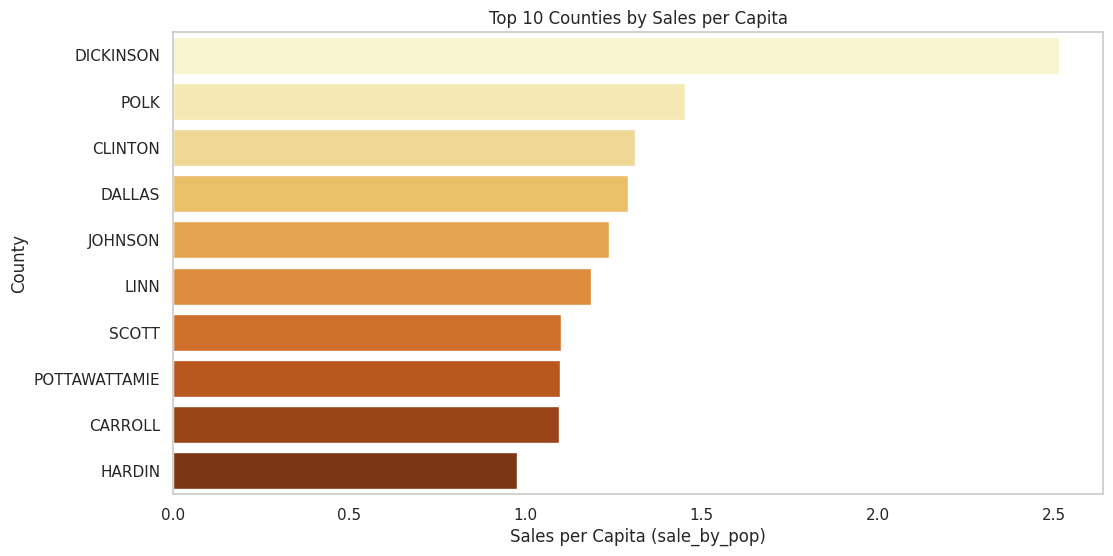

In [ ]:
top_10 = merged_df.sort_values(by="sale_by_pop", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="sale_by_pop", y="County", data=top_10, palette="YlOrBr")

# Labels and title
plt.xlabel("Sales per Capita (sale_by_pop)")
plt.ylabel("County")
plt.title("Top 10 Counties by Sales per Capita")
plt.grid(False)
plt.show()